# Data Exploration

# 1) Importing Libraries

In [4]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats


Attribute Information:
  
   1. Whether of not the TA is a native English speaker (binary)
      1=English speaker, 2=non-English speaker
   2. Course instructor (categorical, 25 categories)
   3. Course (categorical, 26 categories)
   4. Summer or regular semester (binary) 1=Summer, 2=Regular
   5. Class size (numerical)
   6. Class attribute (categorical) 1=Low, 2=Medium, 3=High

# 2) Import Dataset

import dataset and assign it to a variable

In [5]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/tae/tae.data', header = None)

# 3) Data Exlopration

### i. Basic information using np functions like :
* head()
* shape
* info()
* describe()
* describe(include ="all")

head() functions is used to give first n rows (here 5)

In [6]:
data.columns = ['speaker','instructor','course','semester','size','attribute']
data.head()

speaker  instructor  course  semester  size  attribute
0        1          23       3         1    19          3
1        2          15       3         1    17          3
2        1          23       3         2    49          3
3        1           5       2         2    33          3
4        2           7      11         2    55          3

In [7]:
#shape : gives rows and columns
data.shape

(151, 6)

Shape  gives the details of total number of rows and columns present in the dataset ie <b> Size of dataset</b>
Here we have:
* 151 rows records
* 6 columns

In [8]:
# info allows to check null and non null values along with data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   speaker     151 non-null    int64
 1   instructor  151 non-null    int64
 2   course      151 non-null    int64
 3   semester    151 non-null    int64
 4   size        151 non-null    int64
 5   attribute   151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


From the function we can deduce that:
* the data type of all the rows in <b> Integer data type </b>
* since we can see the non null count matches the number of rows , we don't have any null values: <b>No null values</b>

In [9]:
# helps to display summary of all the data together
data.describe(include='all')

speaker  instructor      course    semester        size   attribute
count  151.000000  151.000000  151.000000  151.000000  151.000000  151.000000
mean     1.807947   13.642384    8.105960    1.847682   27.867550    2.019868
std      0.395225    6.825779    7.023914    0.360525   12.893758    0.820327
min      1.000000    1.000000    1.000000    1.000000    3.000000    1.000000
25%      2.000000    8.000000    3.000000    2.000000   19.000000    1.000000
50%      2.000000   13.000000    4.000000    2.000000   27.000000    2.000000
75%      2.000000   20.000000   15.000000    2.000000   37.000000    3.000000
max      2.000000   25.000000   26.000000    2.000000   66.000000    3.000000

we can see some very basic info from the .describe() function like:
* mean
* std : standard deviation 
* min, max values
* 25%, 50%, 75% :  how many of the values are less than the given percentile.


From above data we can see that:
* count values of every row is 151, which is equal to no of rows so we have <b>No missing values</b>
* since most of the data is categorical, mean may not give much information as it assumes equal spaces betweent the categories.
* similarly standard deviation may not be appropriate for categorical data.
* for binary type data or 2 categories, we can get an idea of which value is more than the other from mean: <b>here: since mean is 1.8 we can say that non english speakers(2) are more than english speakers(1)</b>
* since size is numerical data, we can see that its mean is 27.87 and the average spread from the mean is 12.89

### ii. Median and Mode for categorical values:

In [10]:
from pandas.api.types import is_numeric_dtype

for col in data.columns:
    if is_numeric_dtype(data[col]):
        print('%s:' % (col))
        print('\t Mode = ' , stats.mode(data[col])[0][0])
        print('\t Median = ', data[col].median())
        print('\t Minimum = %.2f' % data[col].min())
        print('\t Maximum = %.2f' % data[col].max())

speaker:
	 Mode =  2
	 Median =  2.0
	 Minimum = 1.00
	 Maximum = 2.00
instructor:
	 Mode =  23
	 Median =  13.0
	 Minimum = 1.00
	 Maximum = 25.00
course:
	 Mode =  3
	 Median =  4.0
	 Minimum = 1.00
	 Maximum = 26.00
semester:
	 Mode =  2
	 Median =  2.0
	 Minimum = 1.00
	 Maximum = 2.00
size:
	 Mode =  19
	 Median =  27.0
	 Minimum = 3.00
	 Maximum = 66.00
attribute:
	 Mode =  3
	 Median =  2.0
	 Minimum = 1.00
	 Maximum = 3.00


from the mode values we can see which category of the feature has the maximum occurence
* 2(non english speakers are more in number)
* out of 25 instructor categories, category number 23 occurs the most
* out of 26 course categories, category no 3 occurs the most, and so on
* in attribute, we can see that class 3 has occured most of the time.


### iii. Identify the dependent and independent features of the data set

In [11]:
# dependent vars 
indep = data.columns[0:5] 
dep = data.columns[5] # class attribute
indep

Index(['speaker', 'instructor', 'course', 'semester', 'size'], dtype='object')

### iv. Corelation and covarience: 

#### coreleation
it is the measure of degree to which 2 attributes vary together and depends on the magnitude 
* close to 1: linear relationship 
* close to 0 : no trend in between the values.
* close to -1 : inverse relationship between the values 
* range: -1 to 1

In [12]:
print('Correlation:')
data.corr()

Correlation:


speaker  instructor    course  semester      size  attribute
speaker     1.000000   -0.250510  0.134660  0.214417 -0.151547  -0.255466
instructor -0.250510    1.000000 -0.236010 -0.168573 -0.035765   0.075095
course      0.134660   -0.236010  1.000000  0.224927 -0.033485   0.143103
semester    0.214417   -0.168573  0.224927  1.000000  0.269554  -0.282742
size       -0.151547   -0.035765 -0.033485  0.269554  1.000000  -0.035676
attribute  -0.255466    0.075095  0.143103 -0.282742 -0.035676   1.000000

Inference
* English speakers and courses,semester categories may be share a linear relationship

In [13]:
print('Covariance:')
data.cov()

Covariance:


speaker  instructor     course  semester        size  attribute
speaker     0.156203   -0.675806   0.373819  0.030552   -0.772274  -0.082826
instructor -0.675806   46.591258 -11.315188 -0.414834   -3.147682   0.420486
course      0.373819  -11.315188  49.335364  0.569581   -3.032539   0.824547
semester    0.030552   -0.414834   0.569581  0.129978    1.253024  -0.083620
size       -0.772274   -3.147682  -3.032539  1.253024  166.249007  -0.377351
attribute  -0.082826    0.420486   0.824547 -0.083620   -0.377351   0.672936

# 4) Data Visualization


In [14]:
sns.set(rc = {'figure.figsize':(90,30)},font_scale = 4)

#  plots

## a) Box Plots

* Box plots enable us to study the distributional characteristics of a group of scores as well as the level of the scores.Scores are sorted. Then four equal sized groups are made from the ordered scores. That is, 25% of all scores are placed in each group. The lines dividing the groups are called quartiles, and the groups are referred to as quartile groups.


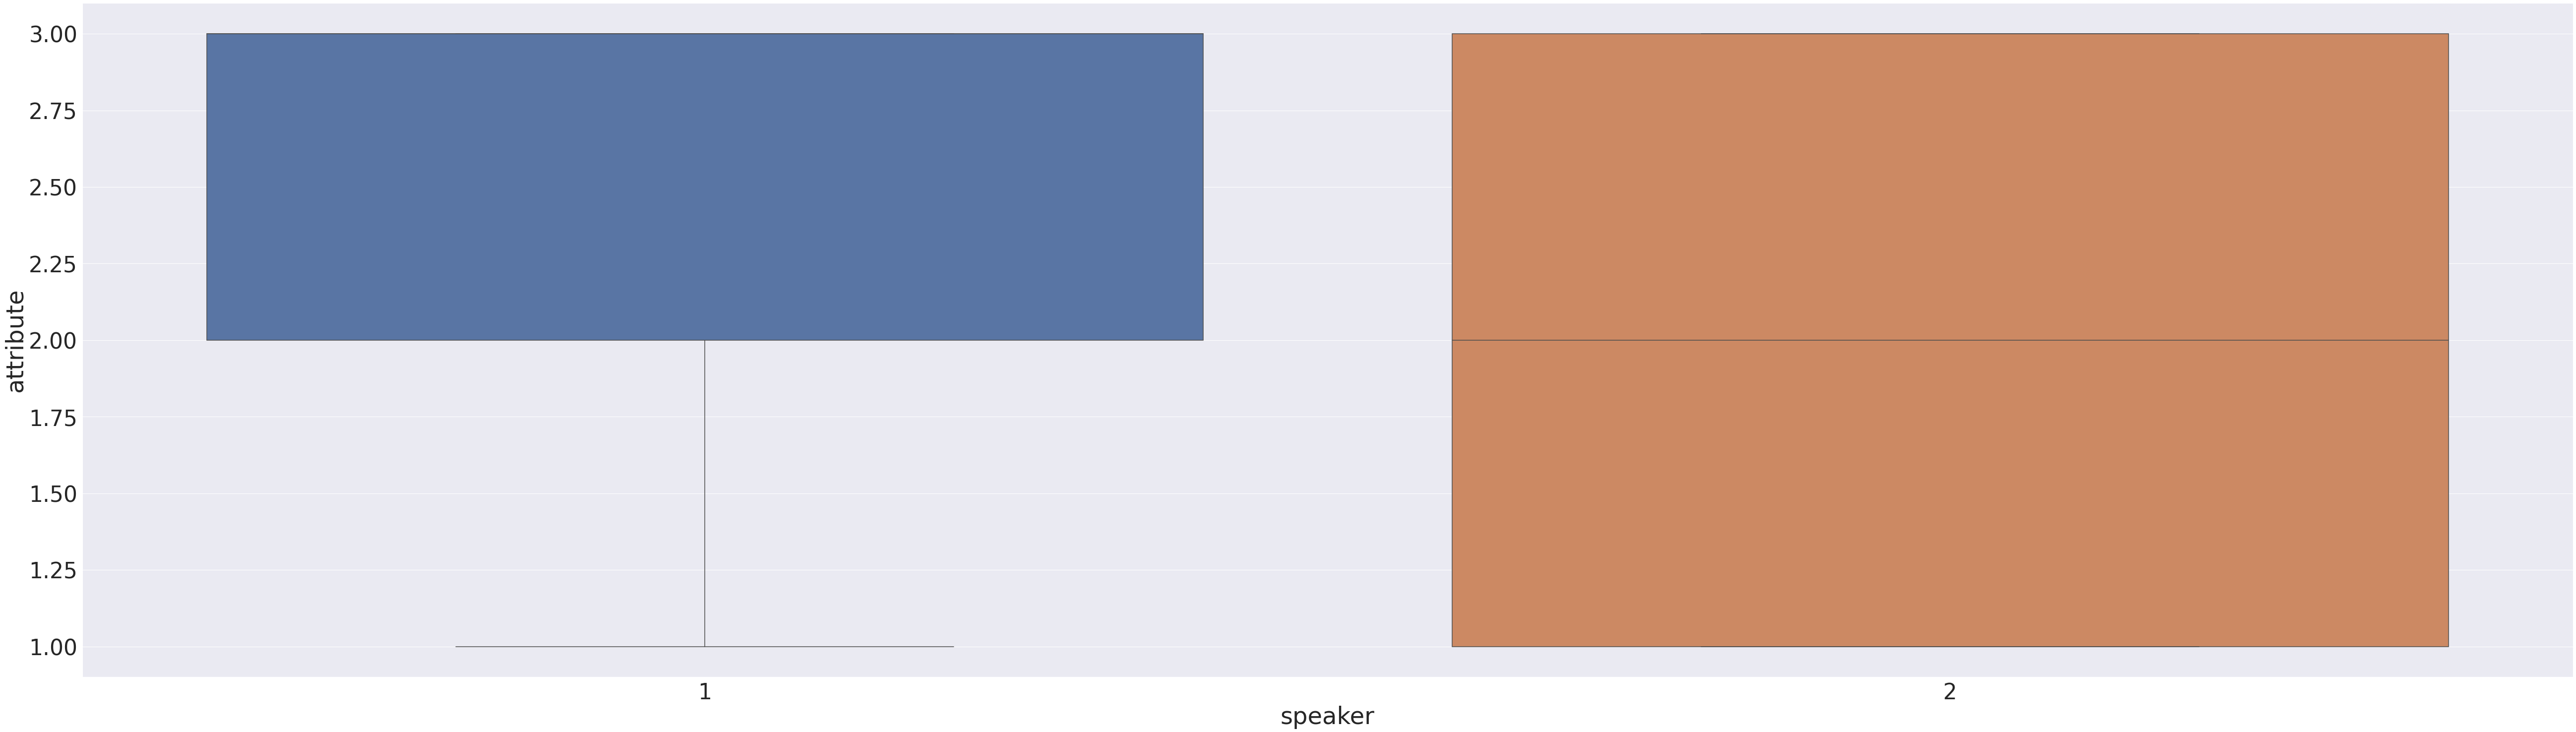

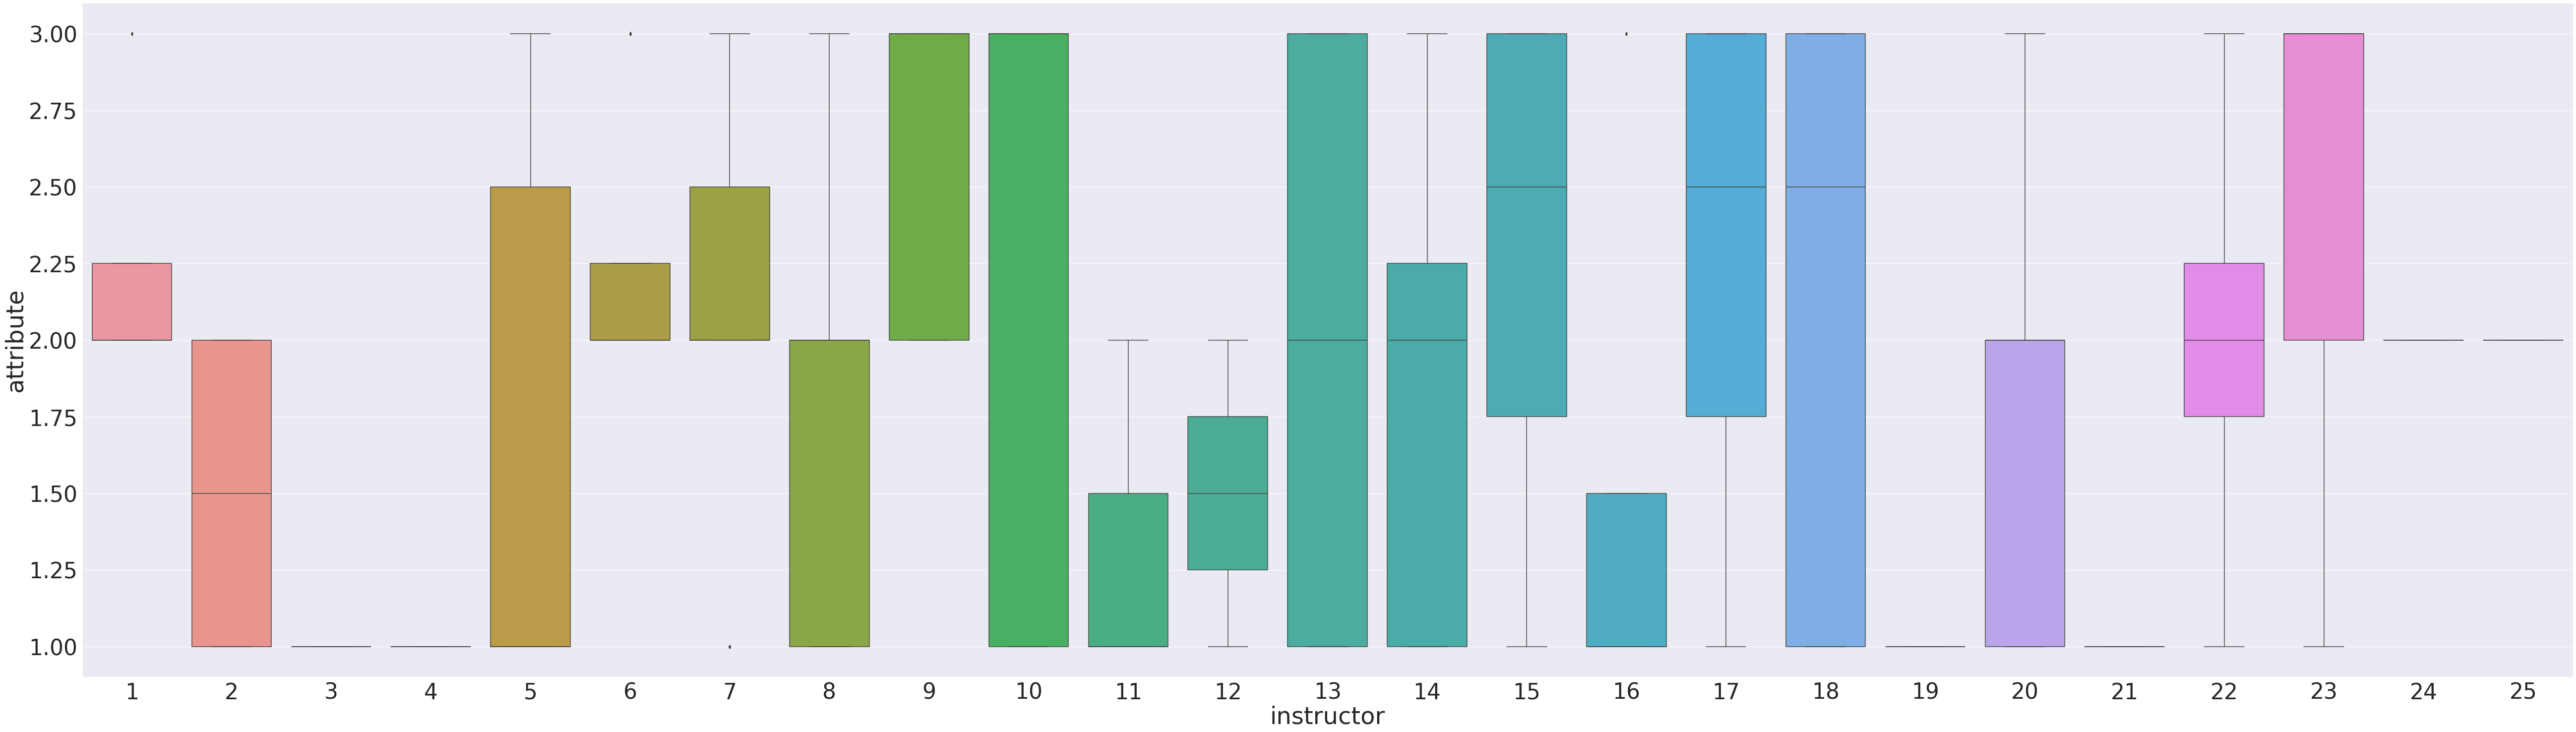

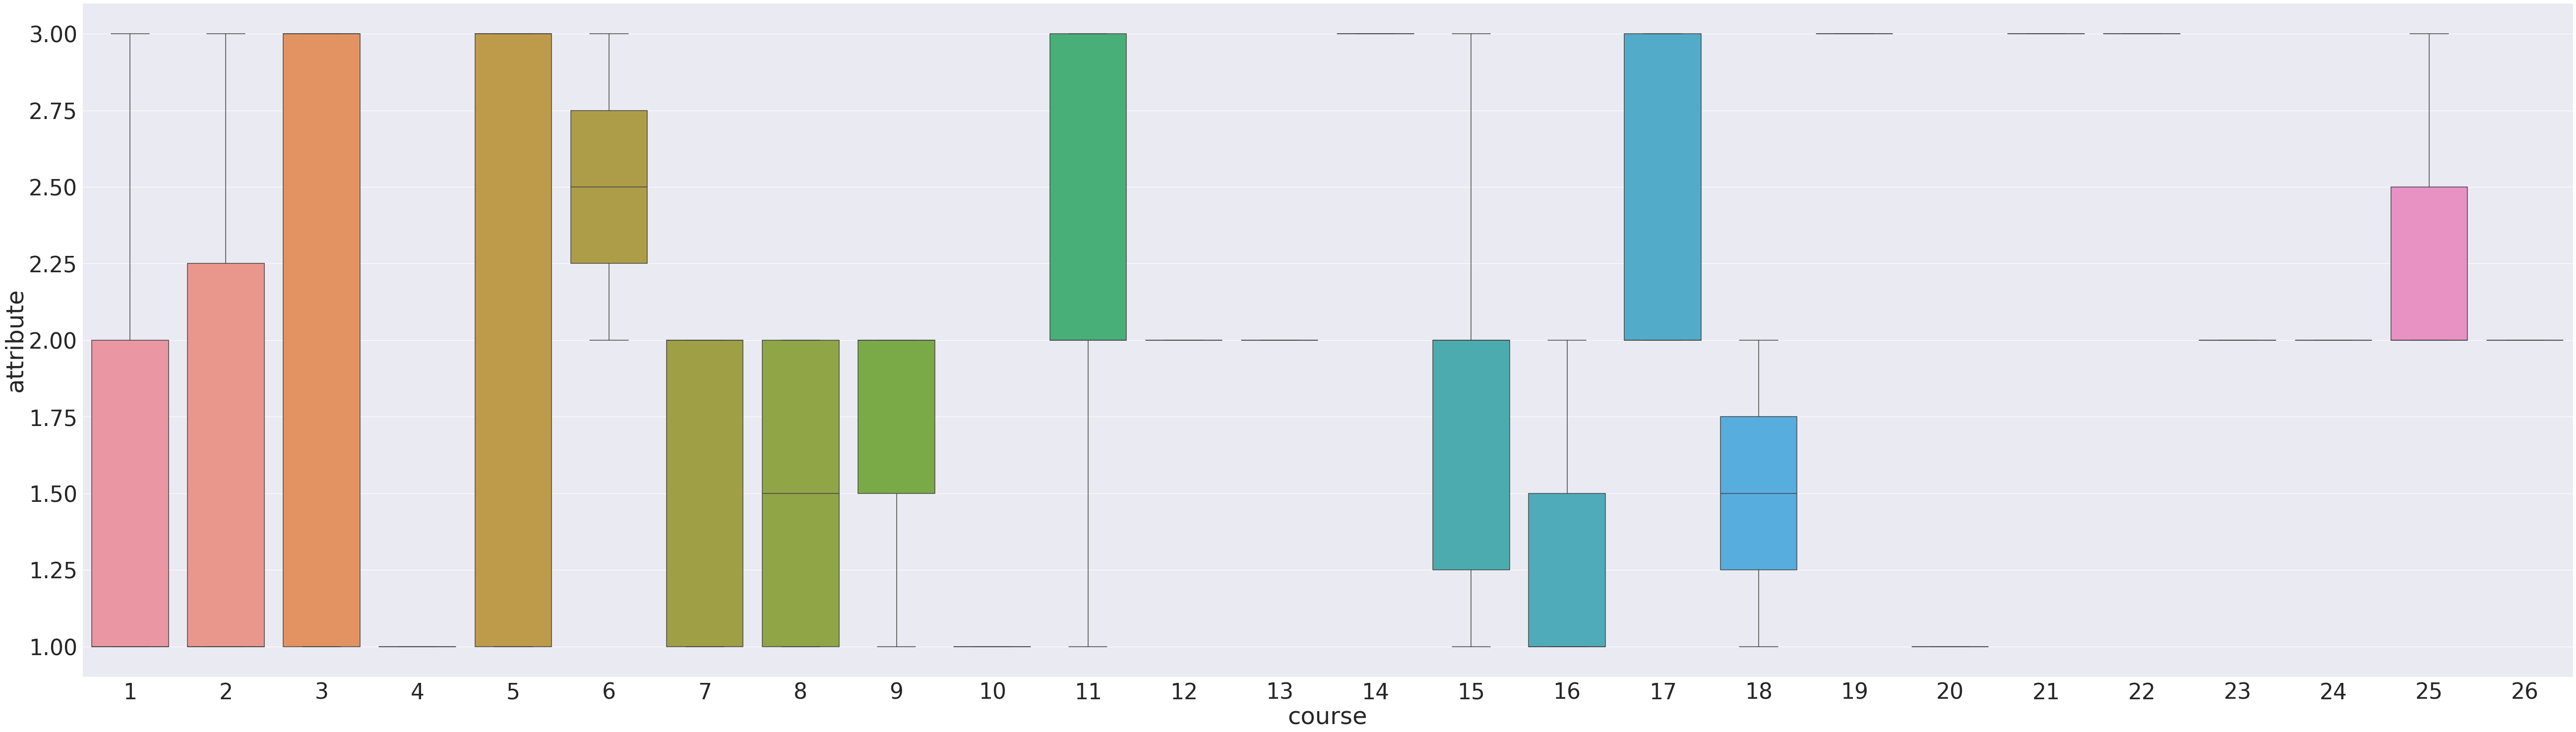

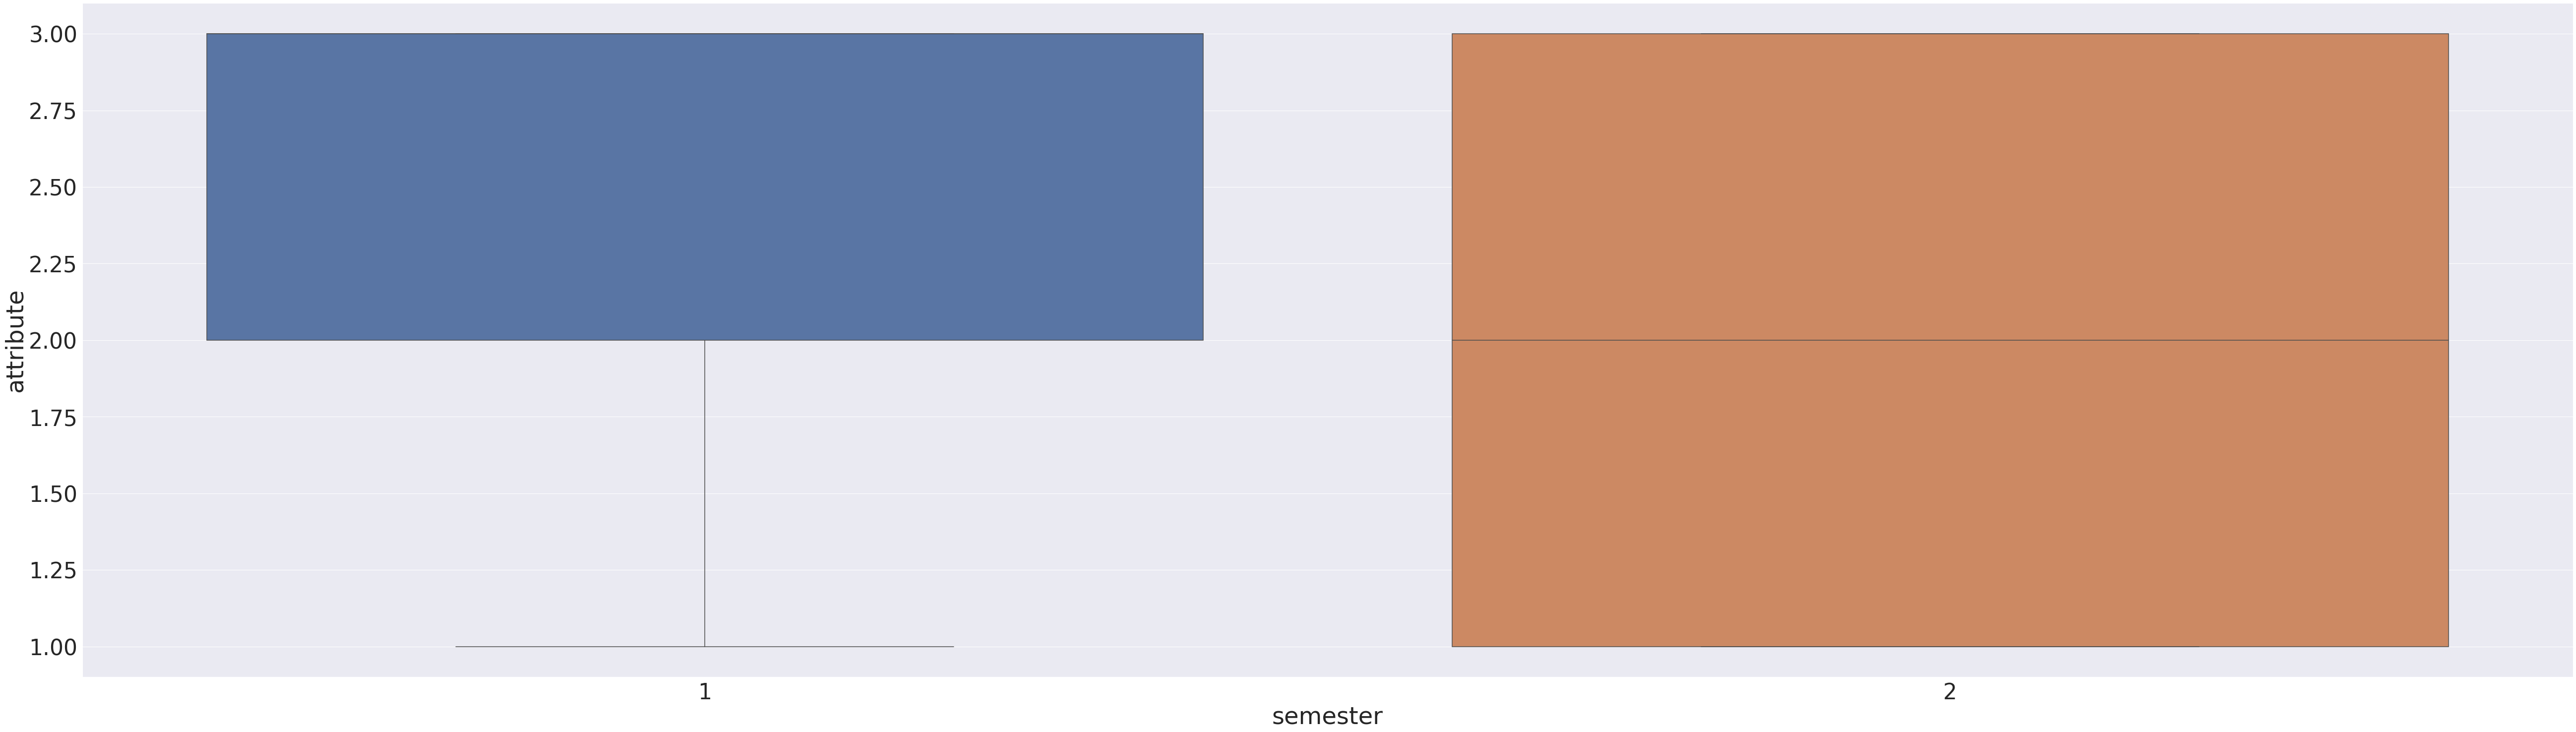

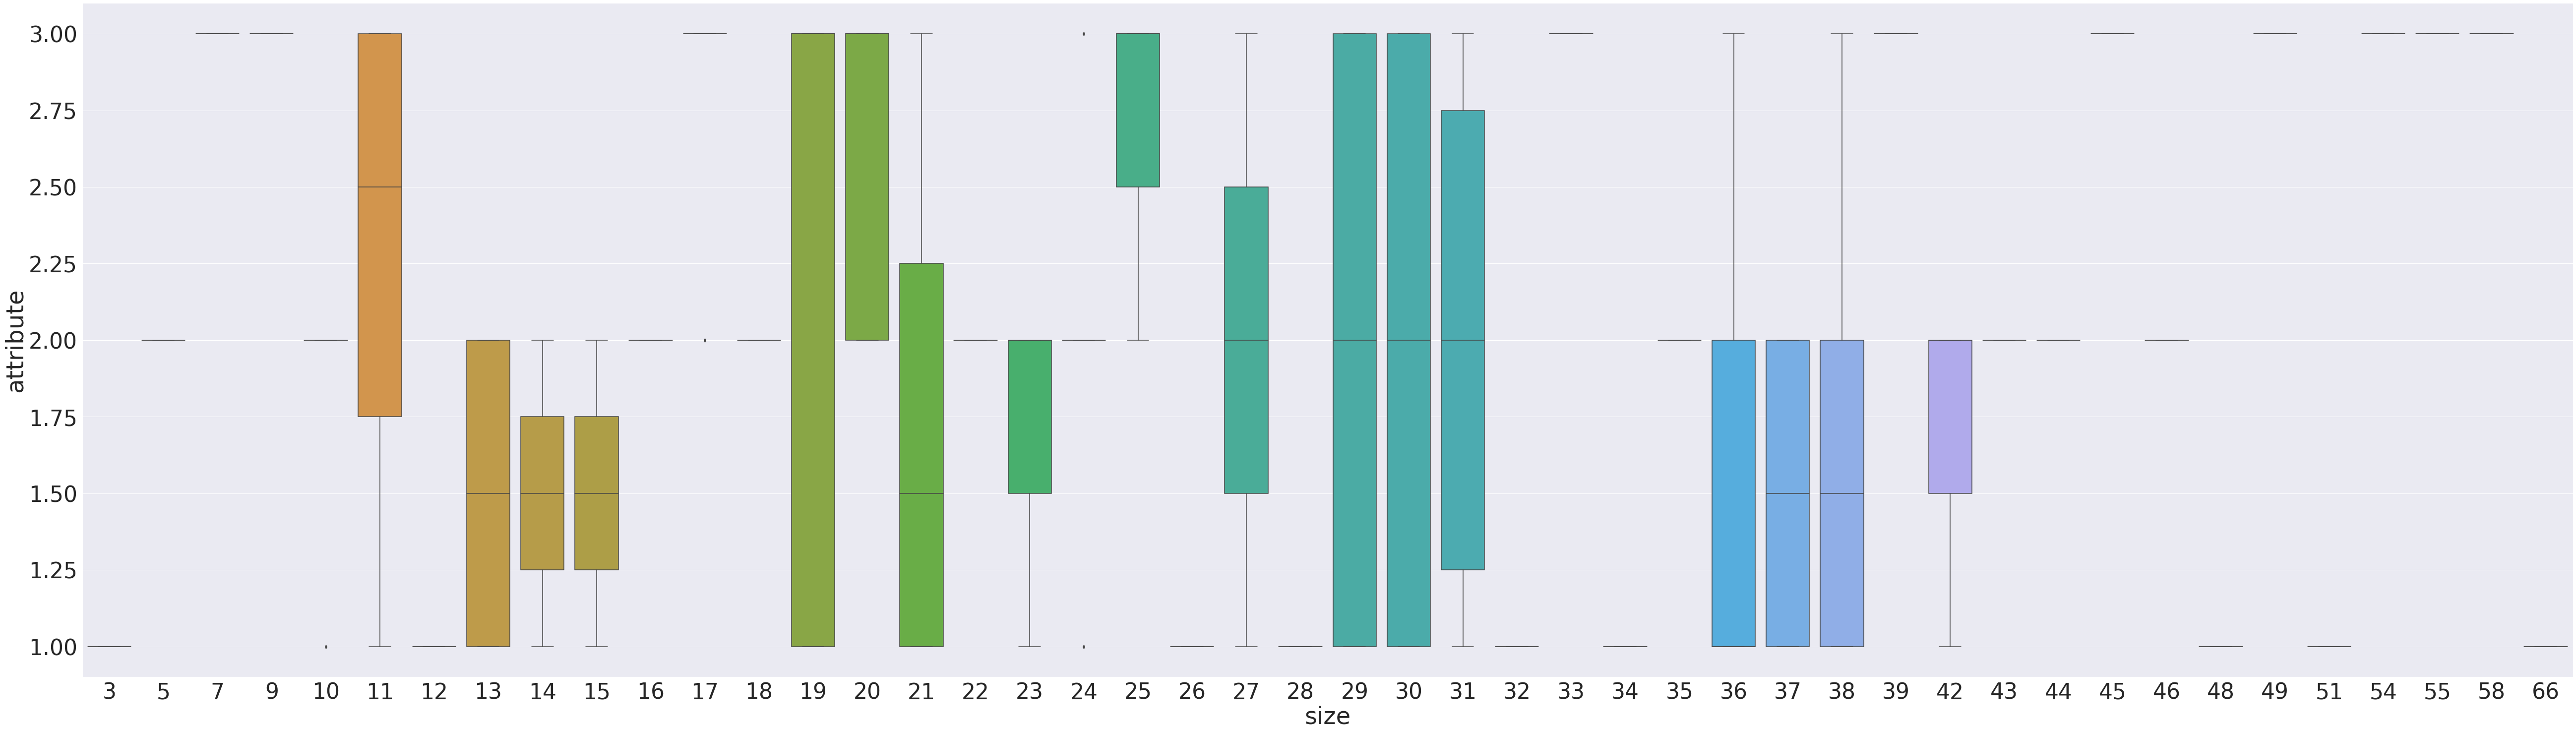

In [15]:
# this is categorical distribution plot
sns.set(rc = {'figure.figsize':(90,25)},font_scale = 4)
for cols in indep:  
  sns.boxplot(x= cols ,y='attribute',data = data)
  plt.show()

we can take following inferences from the data:
* speaker : most of the non english speakers have similar attributes and lie in the top 50 percentile, the lower whisker shows some of the non english speakers lie in lower 50 percentile also. <b>we can say that non english speakers have similar class attribute for most of the cases.</b>
The eglish speakers have long plot, so we can say that they have variation in class attribute.
* similarly for other plots we can check where most of the data of that plot lies, variation in data and the outliers


checking boxplots for hue conditions
* divide for speaker and non english speaker


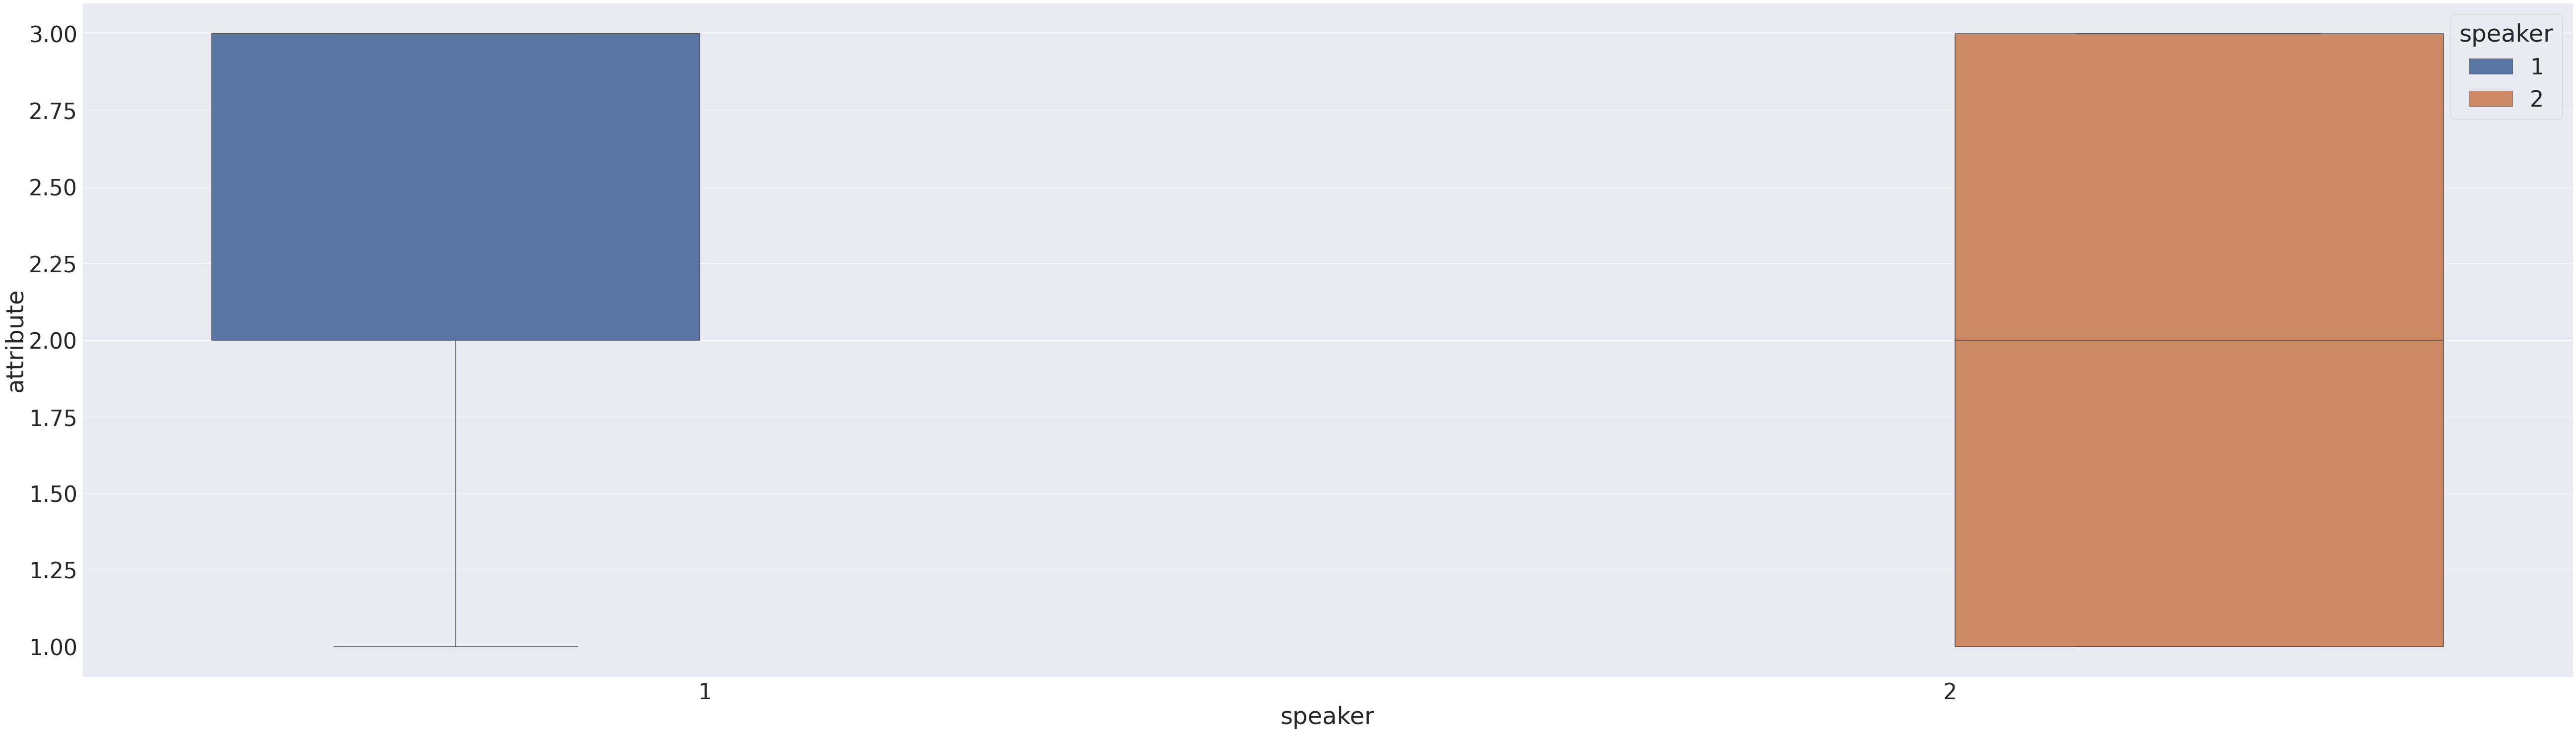

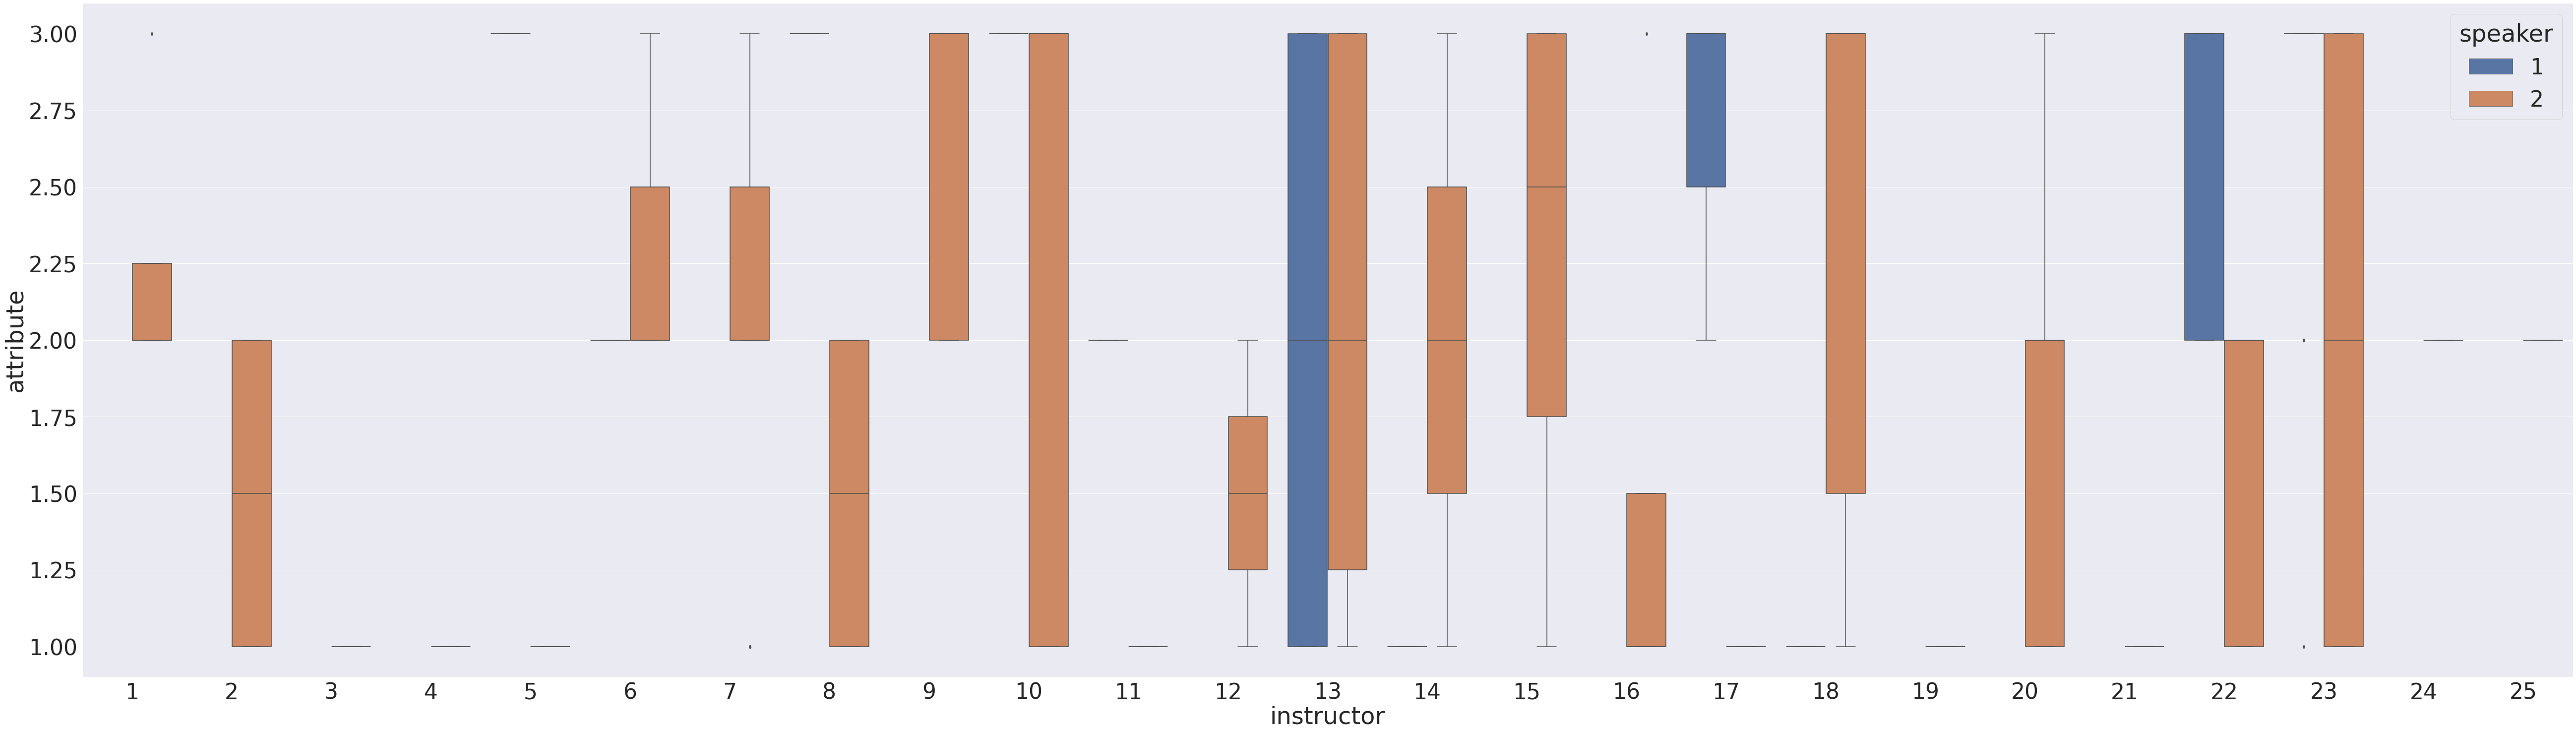

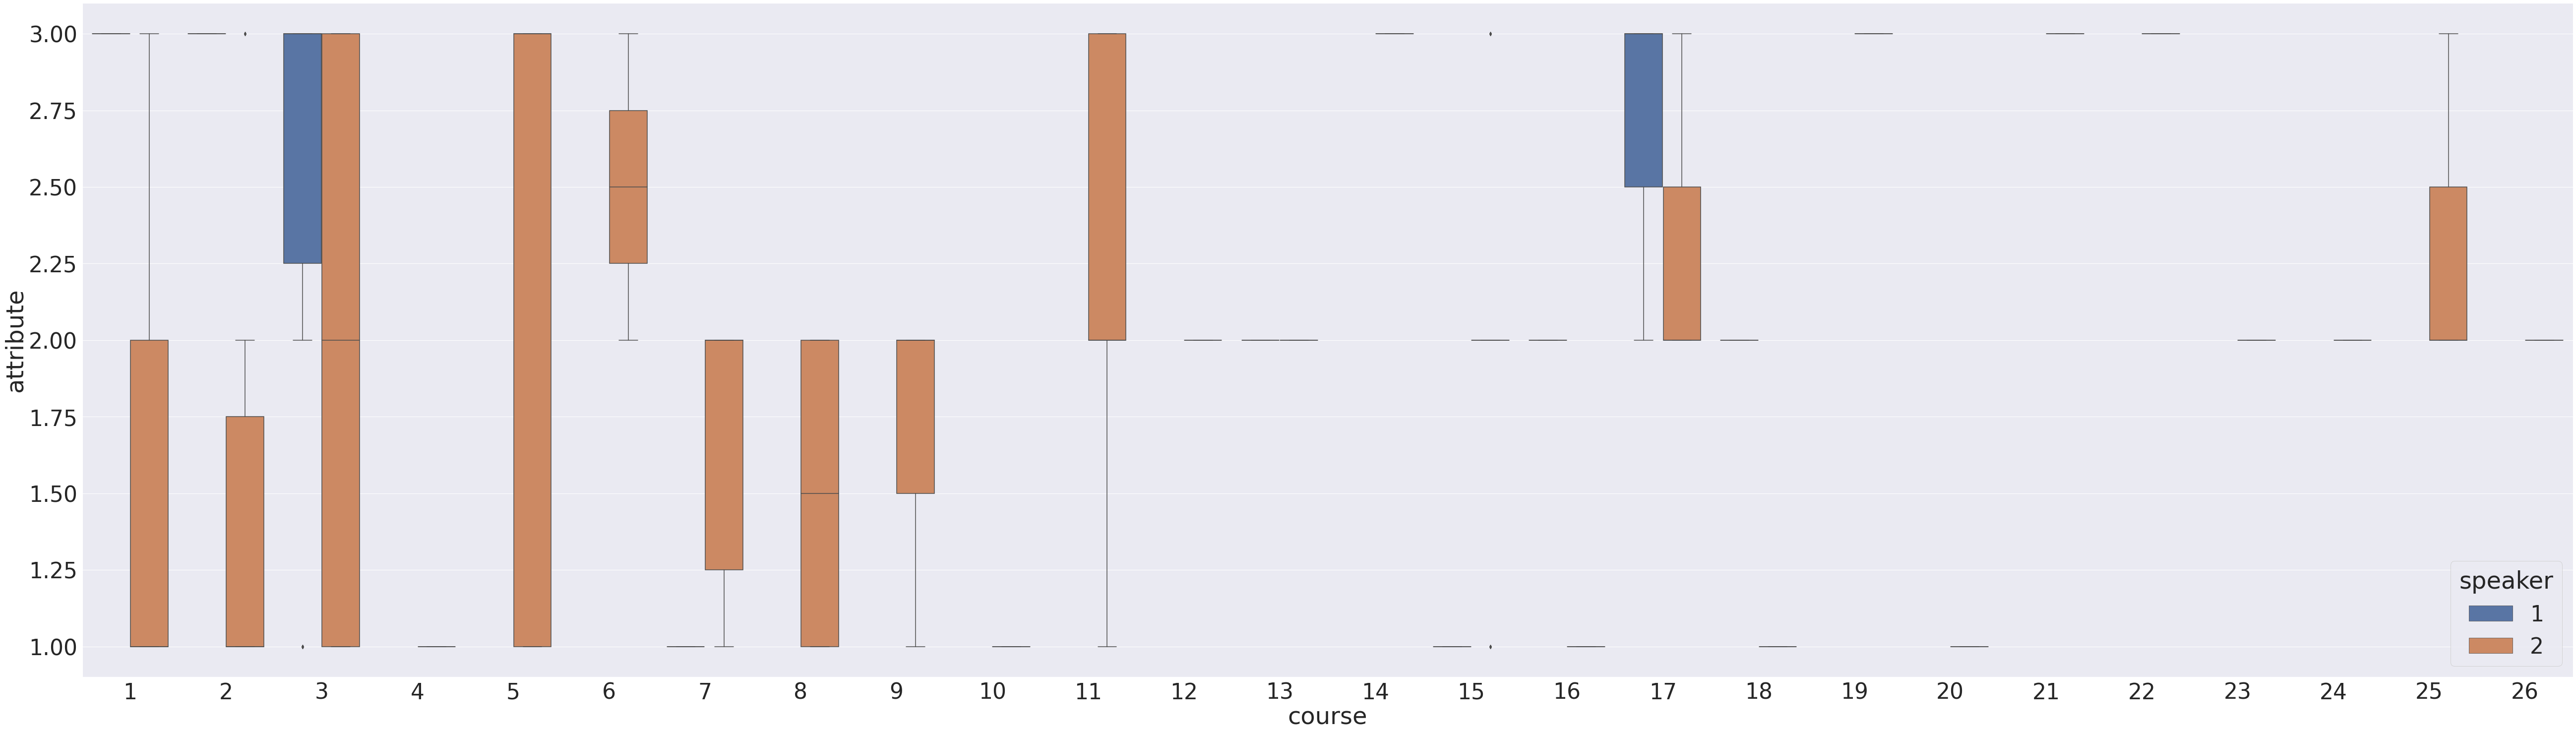

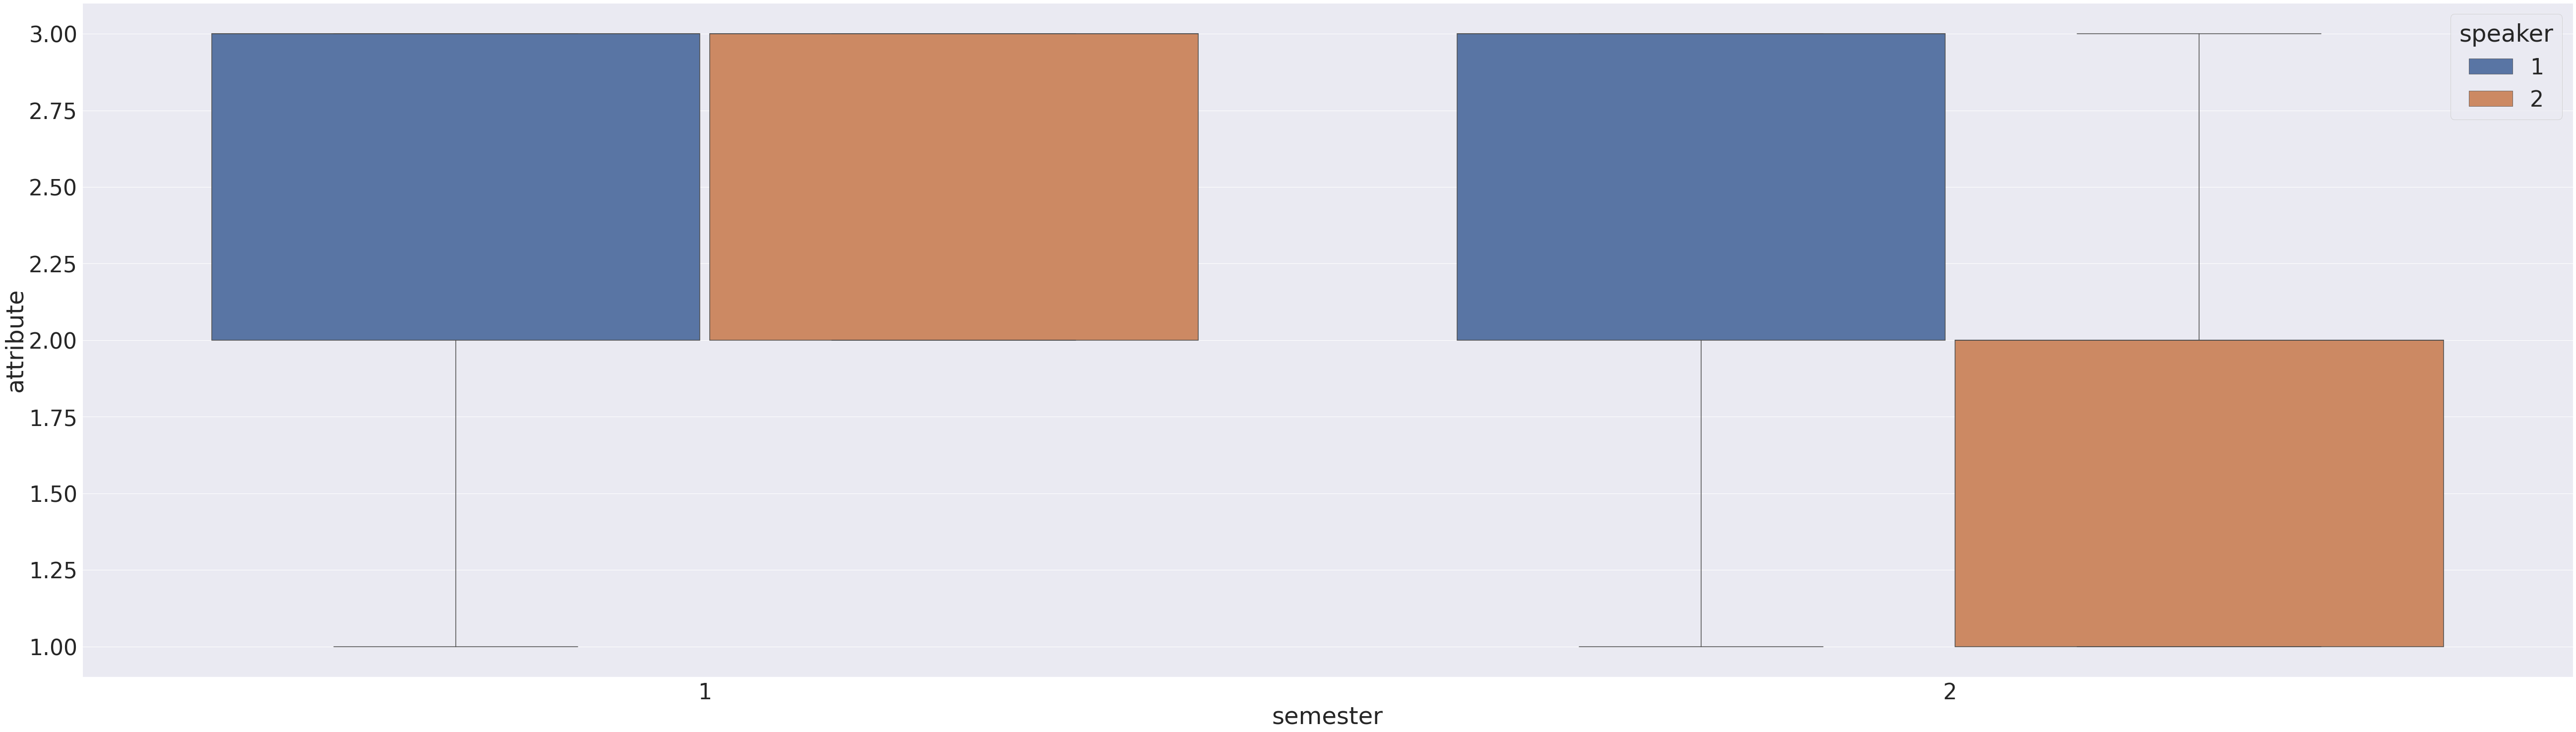

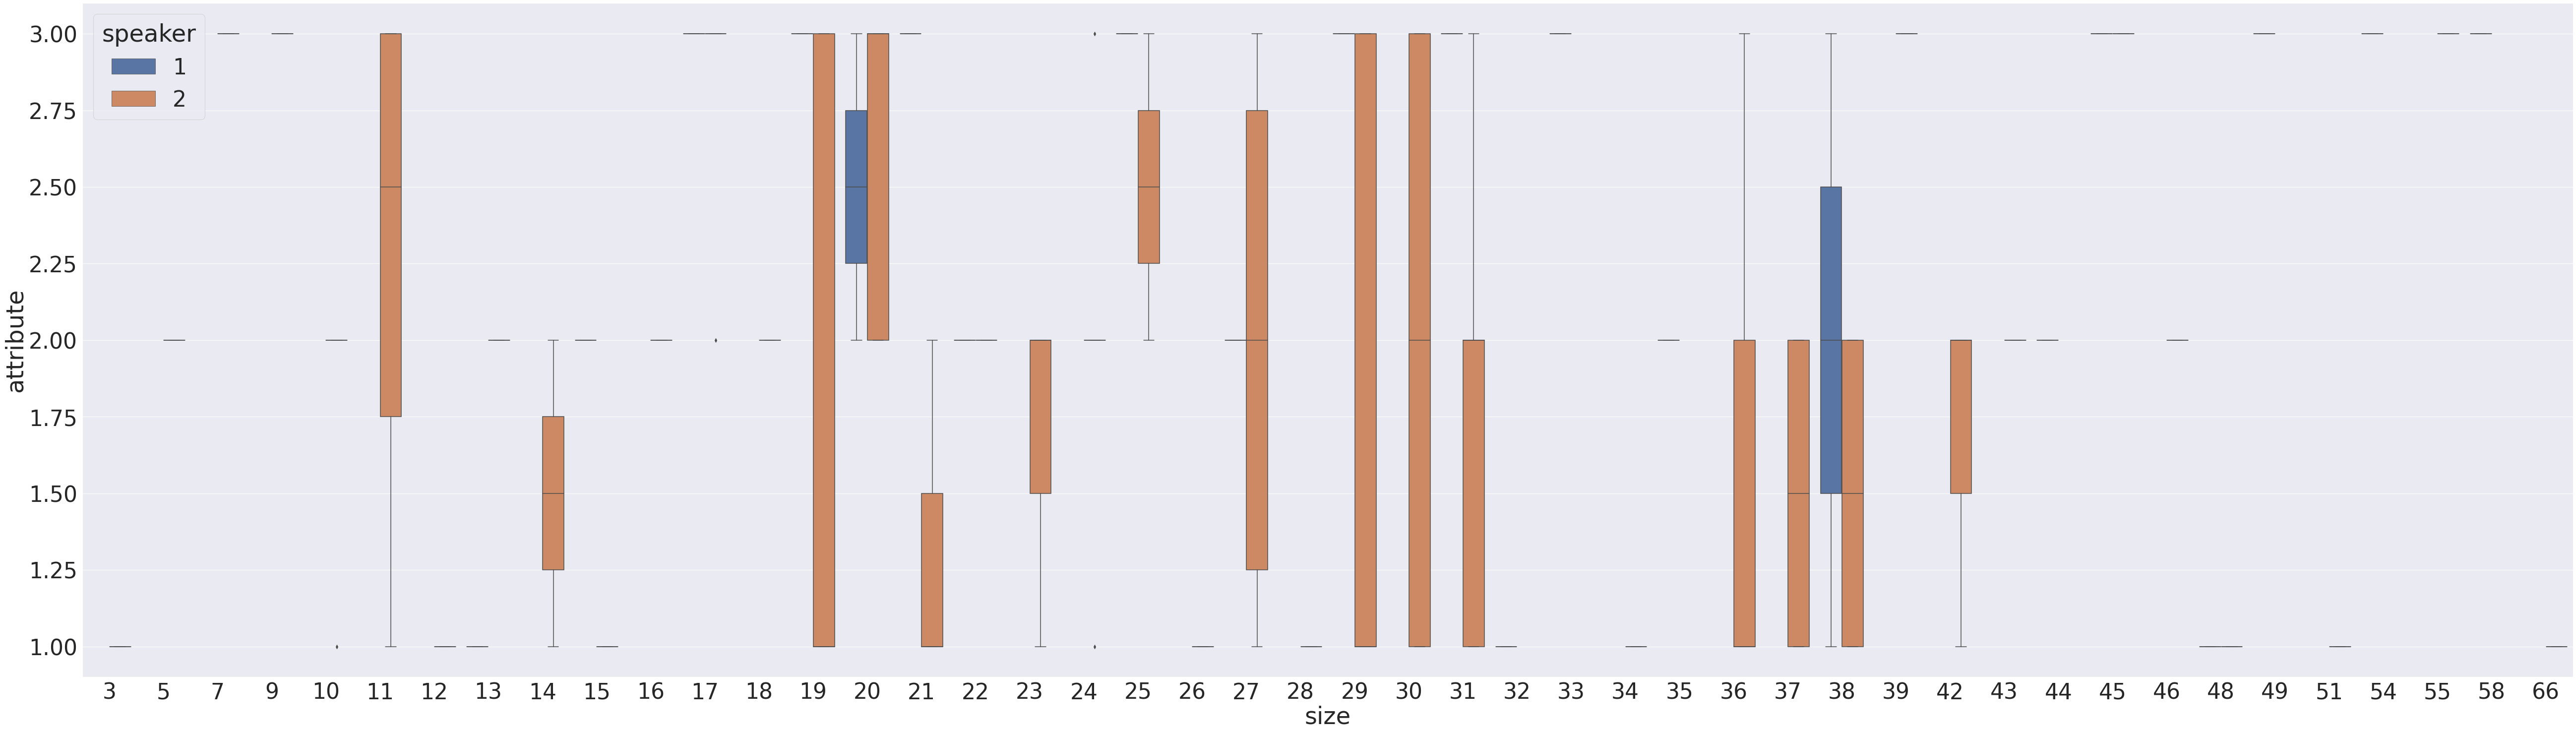

In [16]:
# plot 2 : Dividing data based on speaker
sns.set(rc = {'figure.figsize':(90,25)},font_scale = 4)
for cols in indep:  
  sns.boxplot(x= cols ,y='attribute',data = data,hue='speaker')
  plt.show()

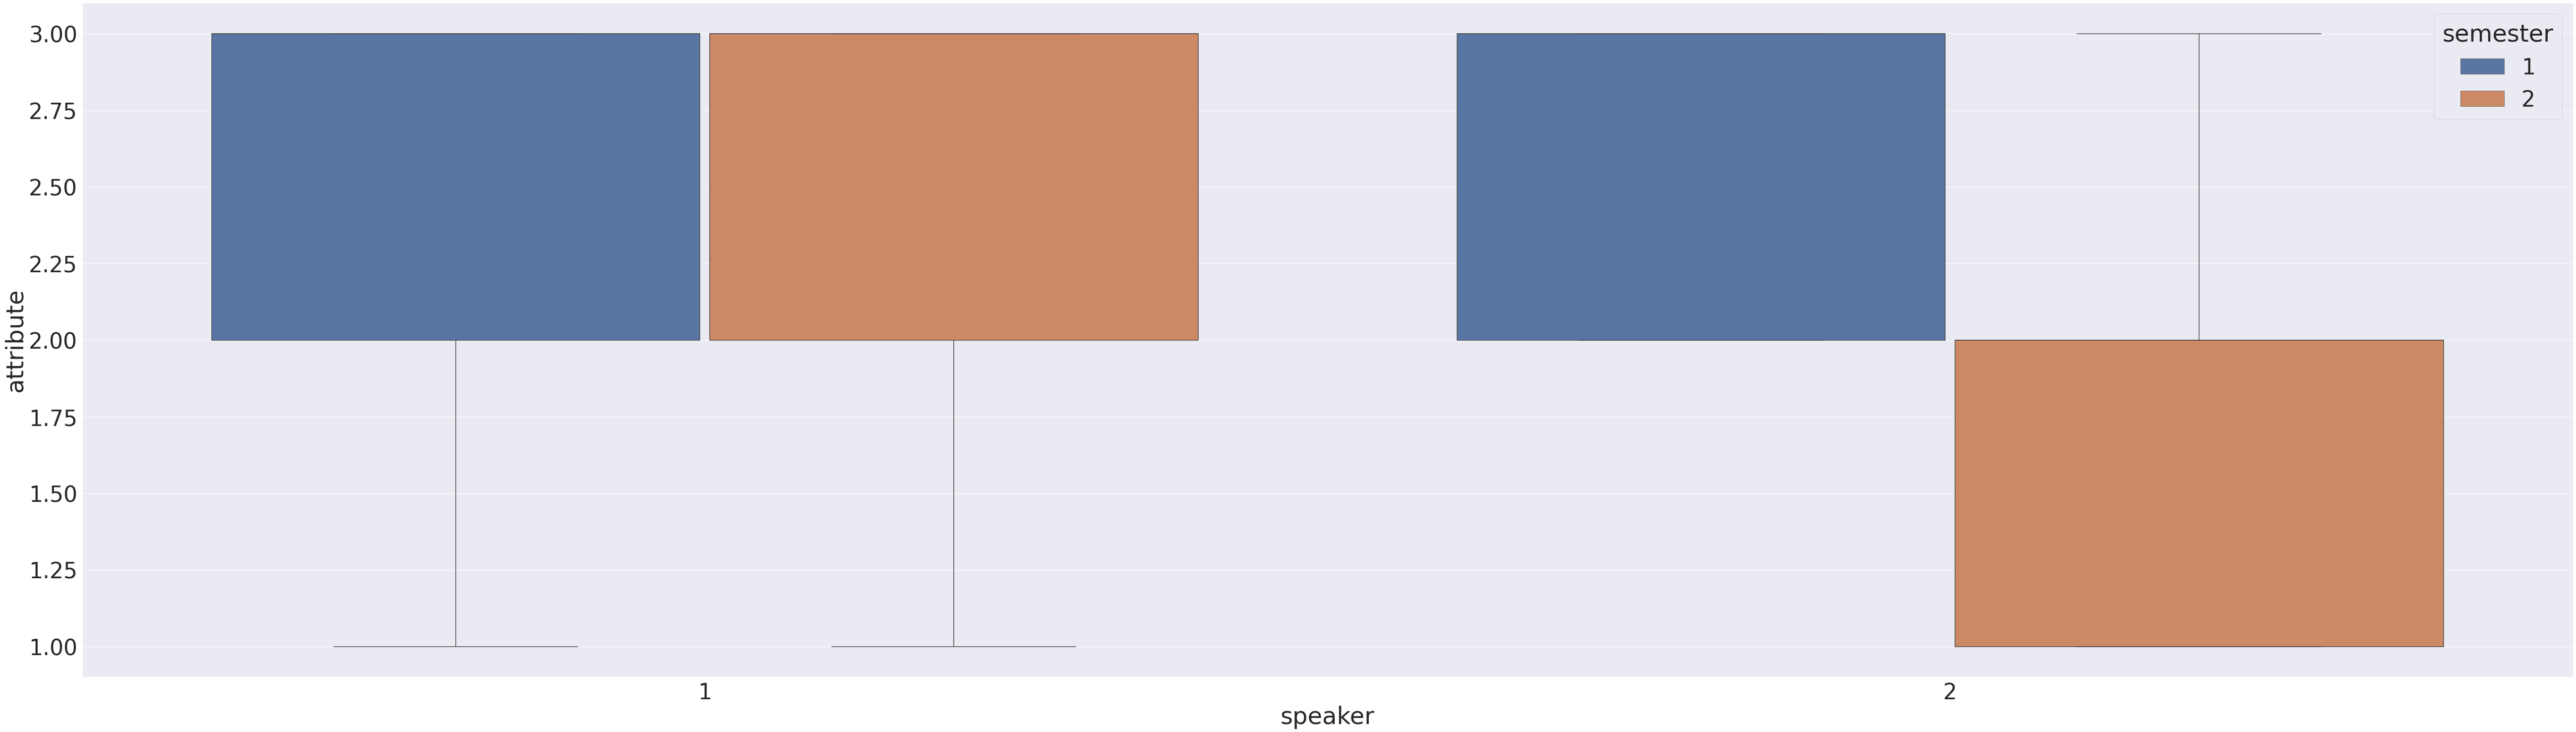

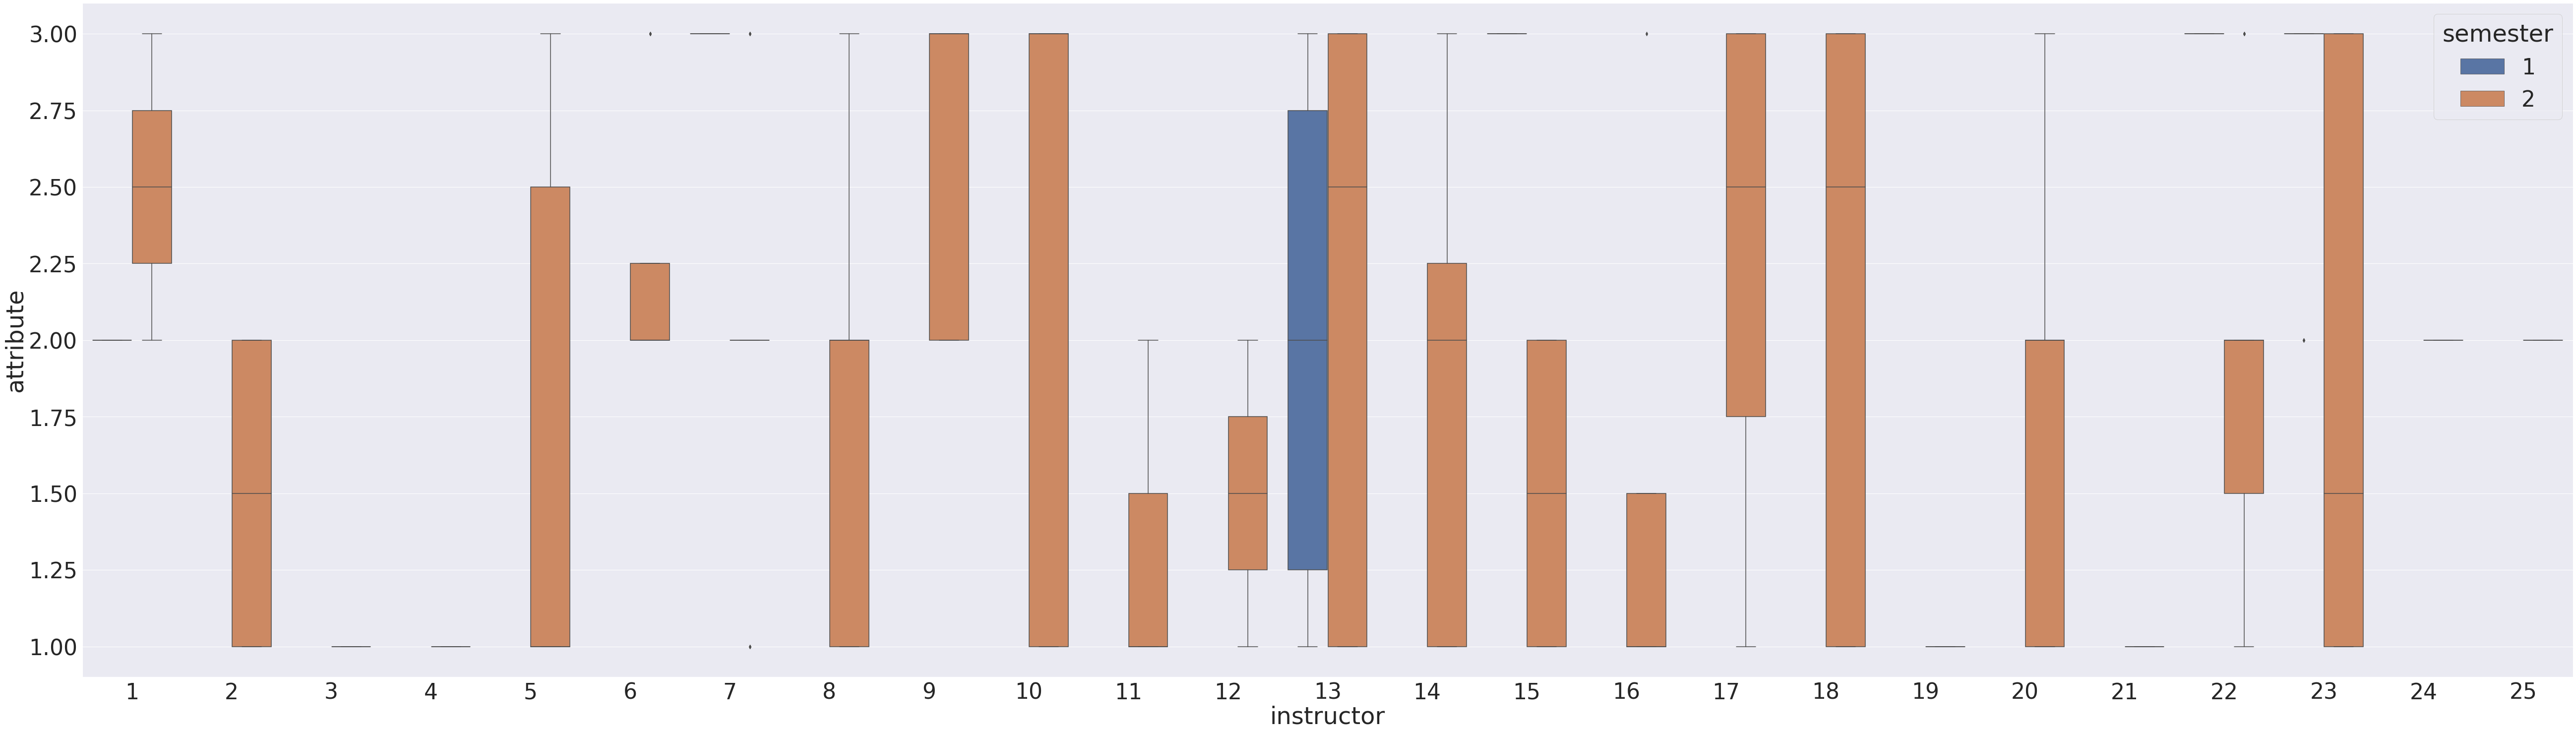

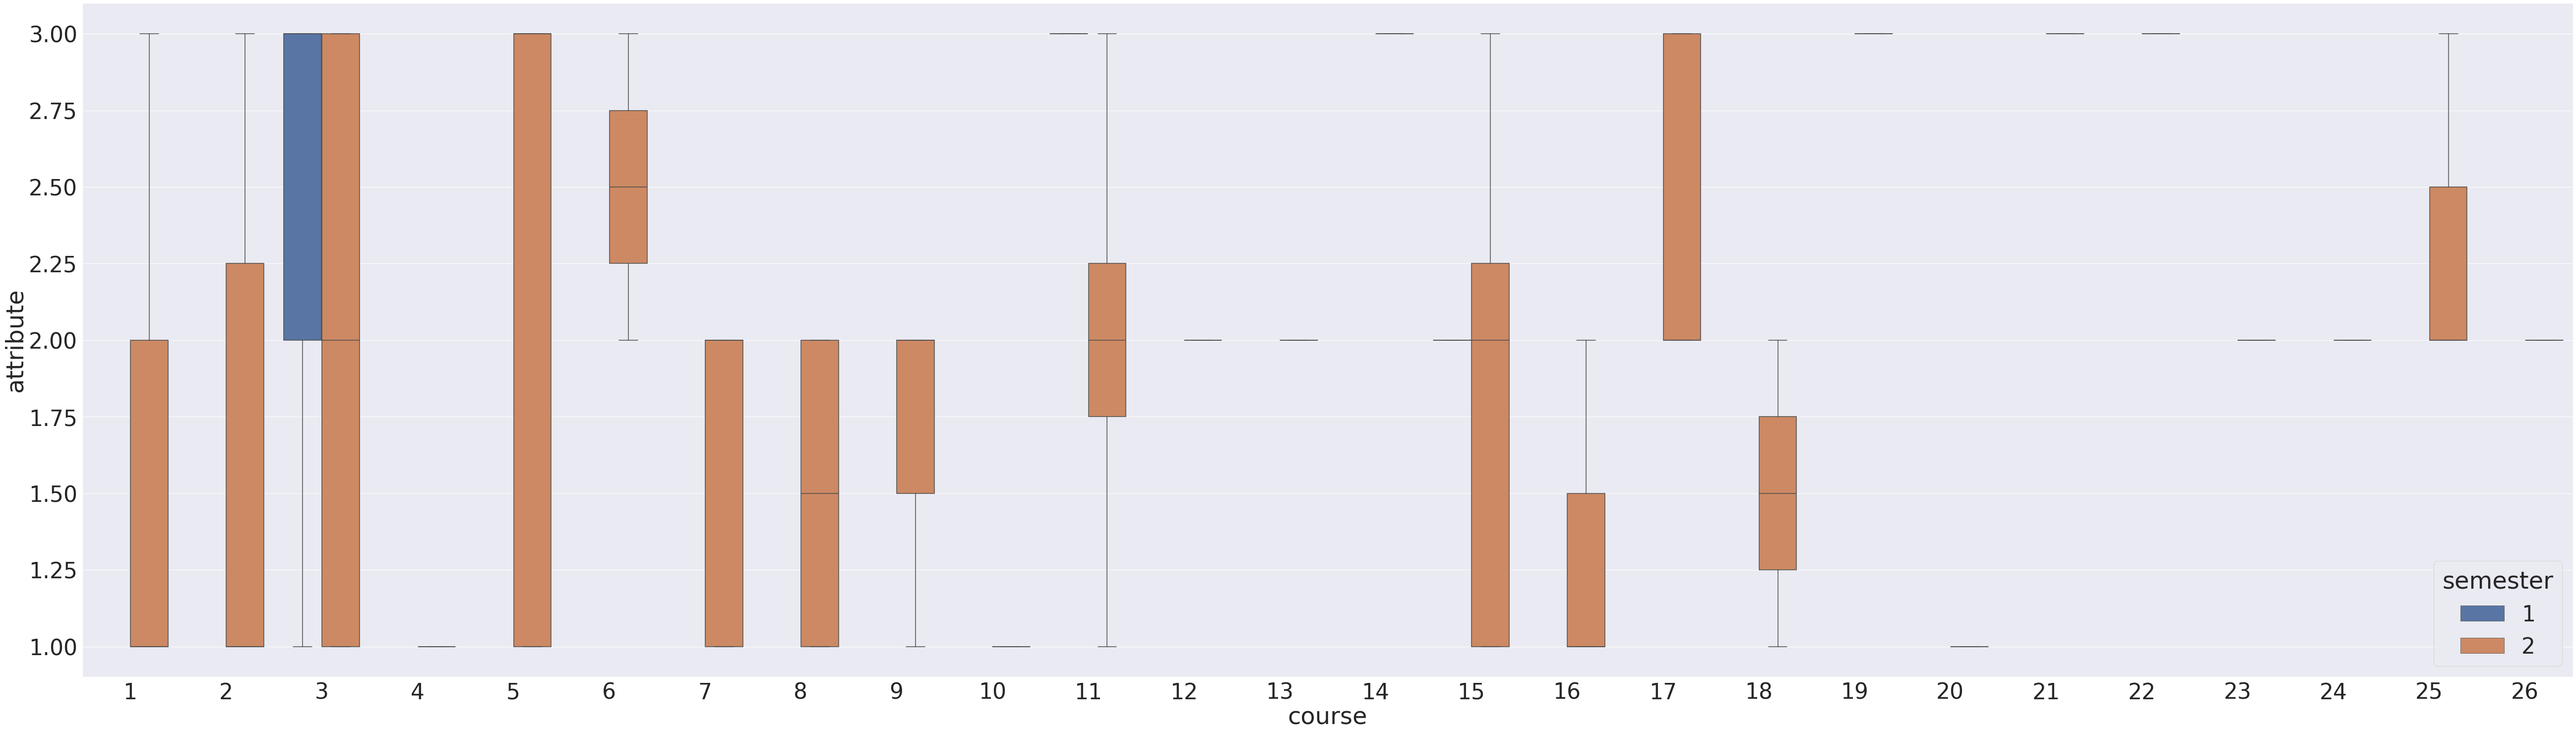

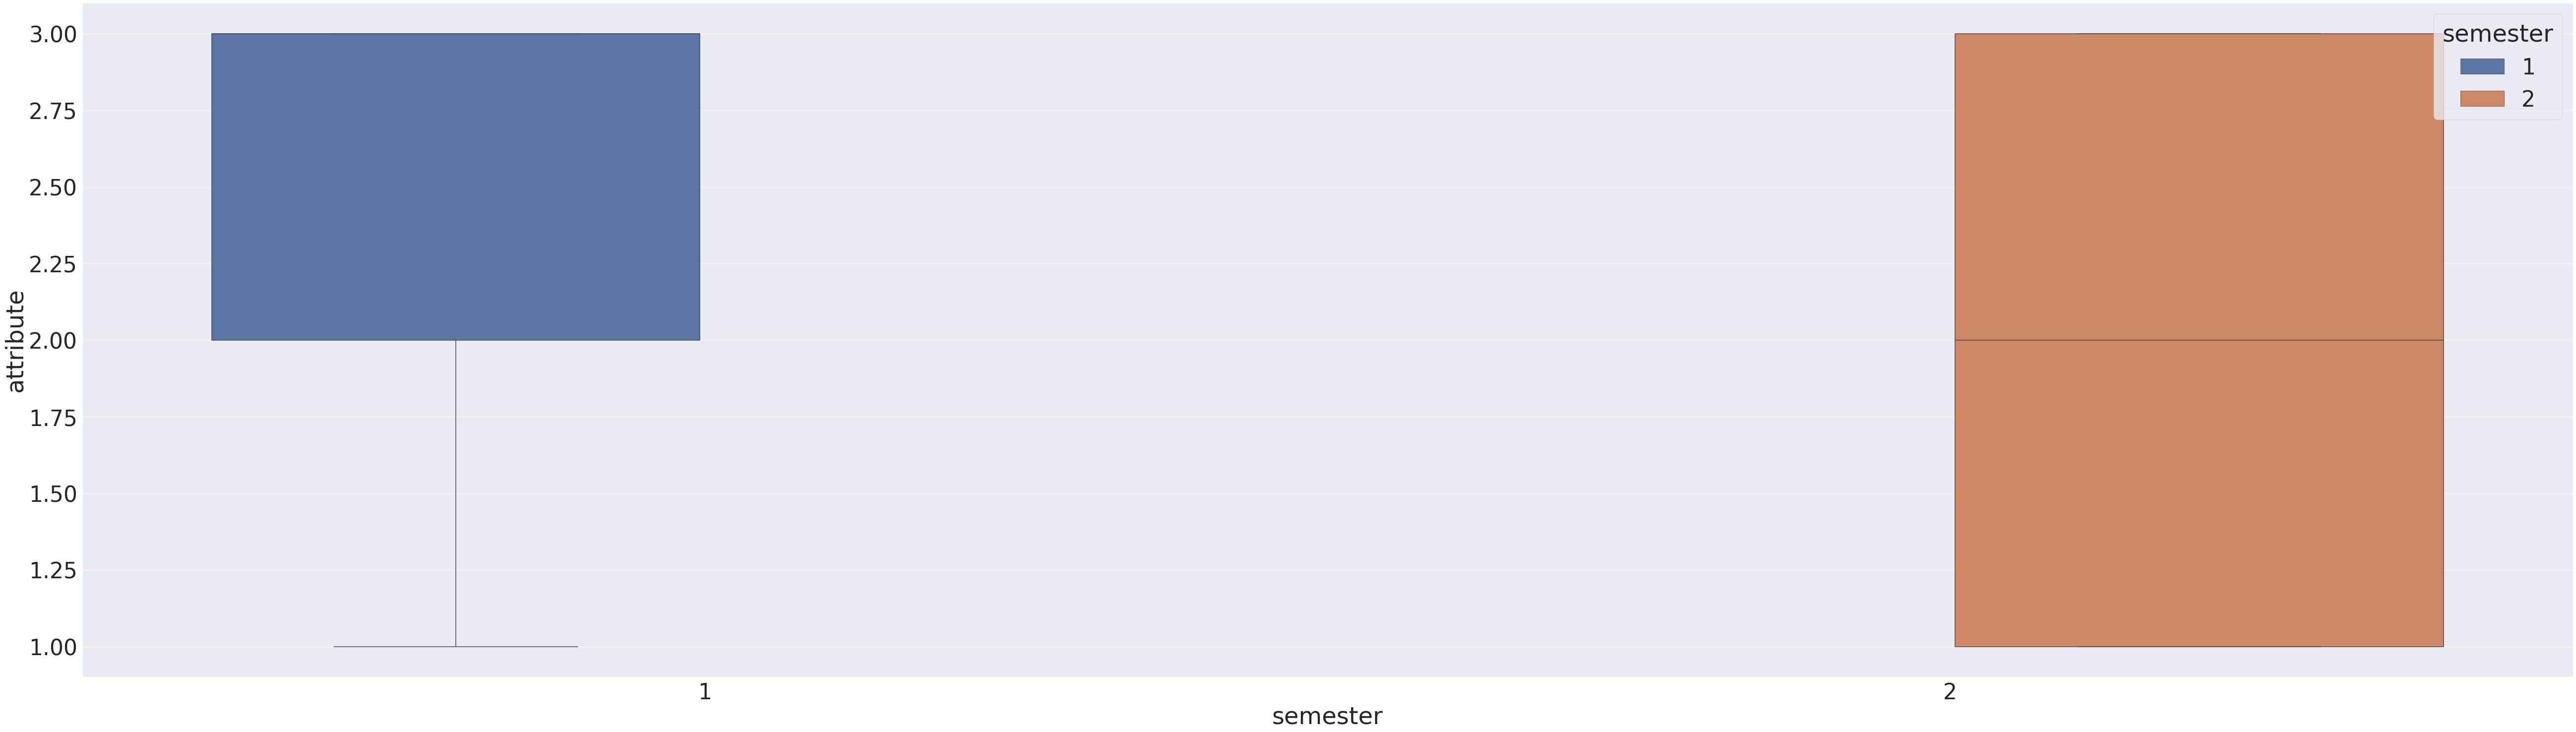

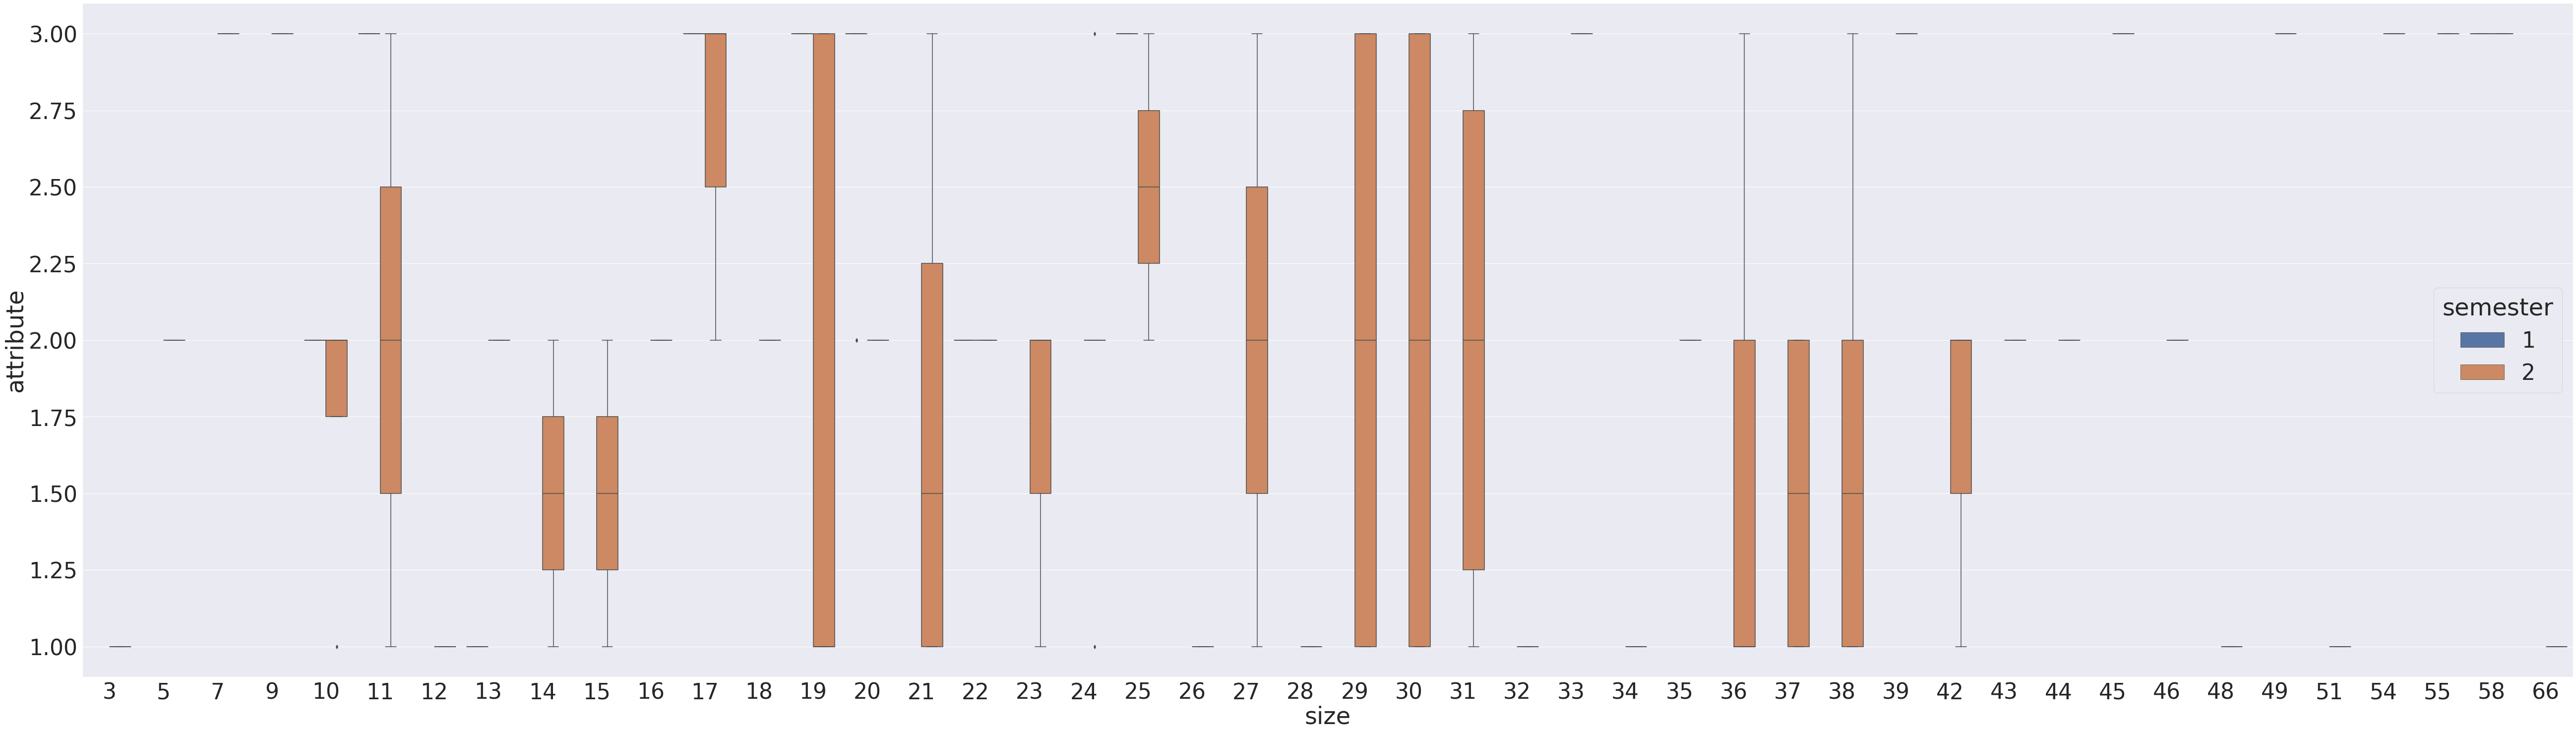

In [17]:
sns.set(rc = {'figure.figsize':(90,25)},font_scale = 4)
for cols in indep:  
  sns.boxplot(x= cols ,y='attribute',data = data,hue='semester')
  plt.show()

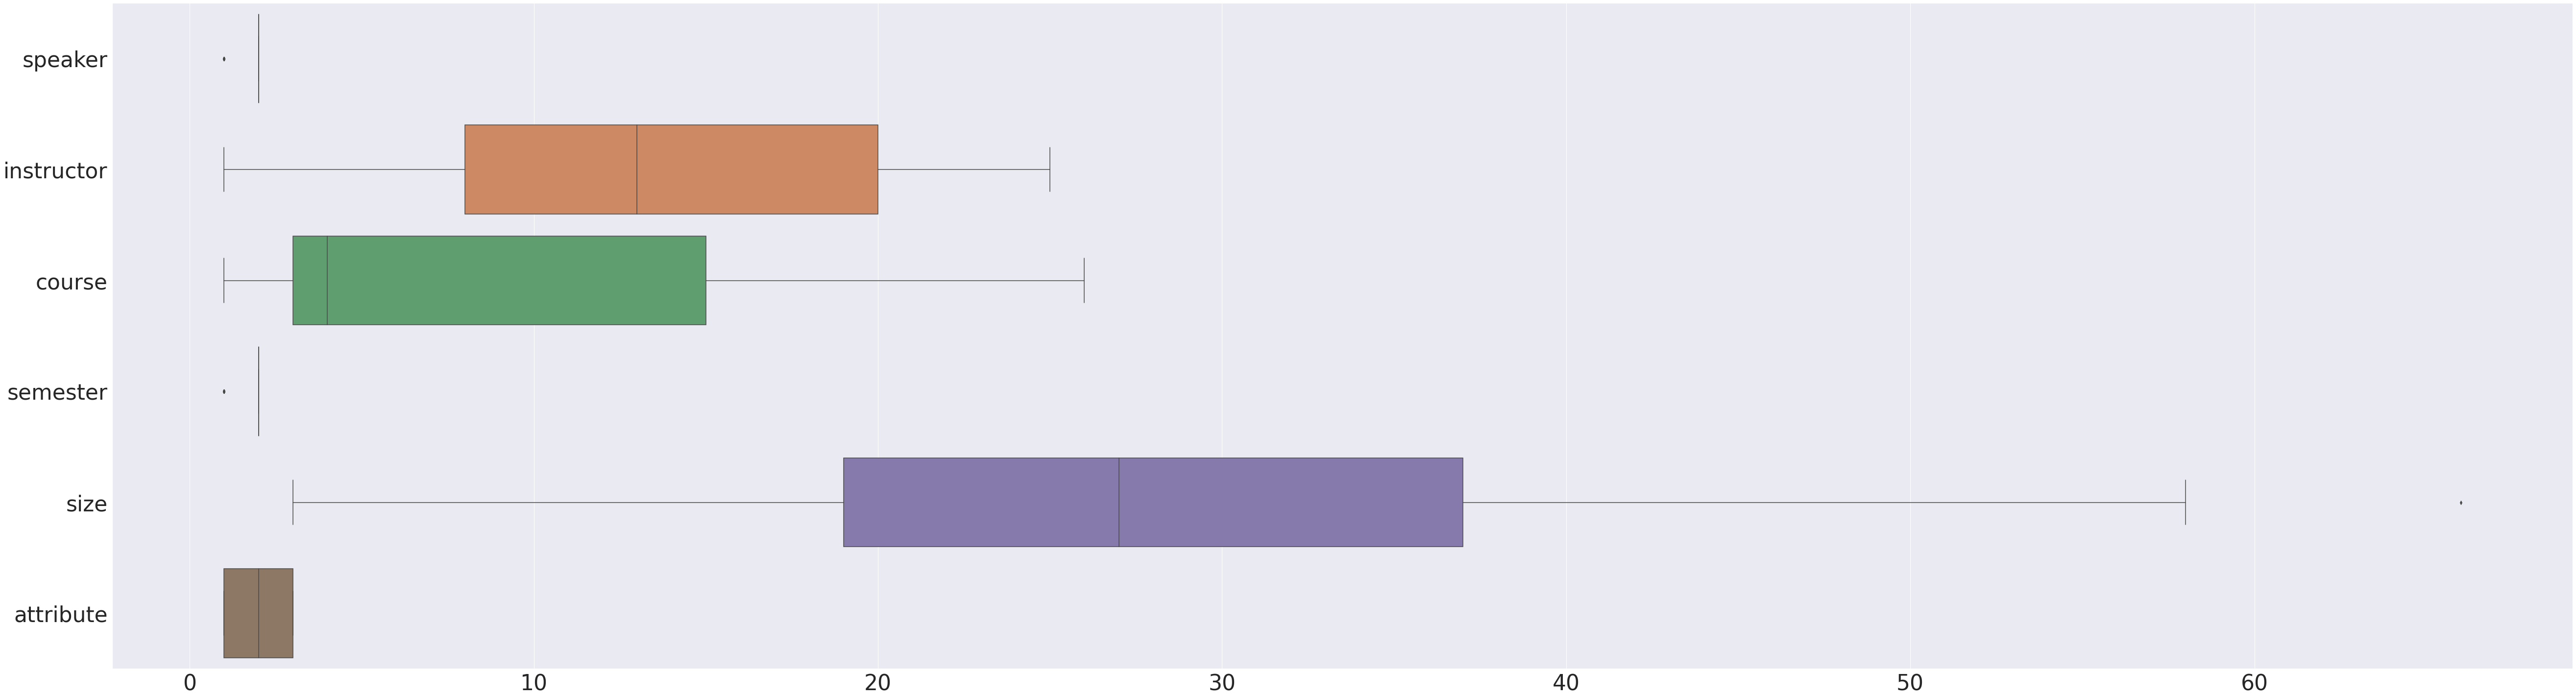

In [18]:
sns.boxplot(data=data[["speaker", "instructor","course","semester","size","attribute"]], orient="h")

the above plot shows the count variation of the data and we can see that attributes has a small plot ie most of data has low variations

## b) Histogram

### Mean, Median, Mode with histogram plots

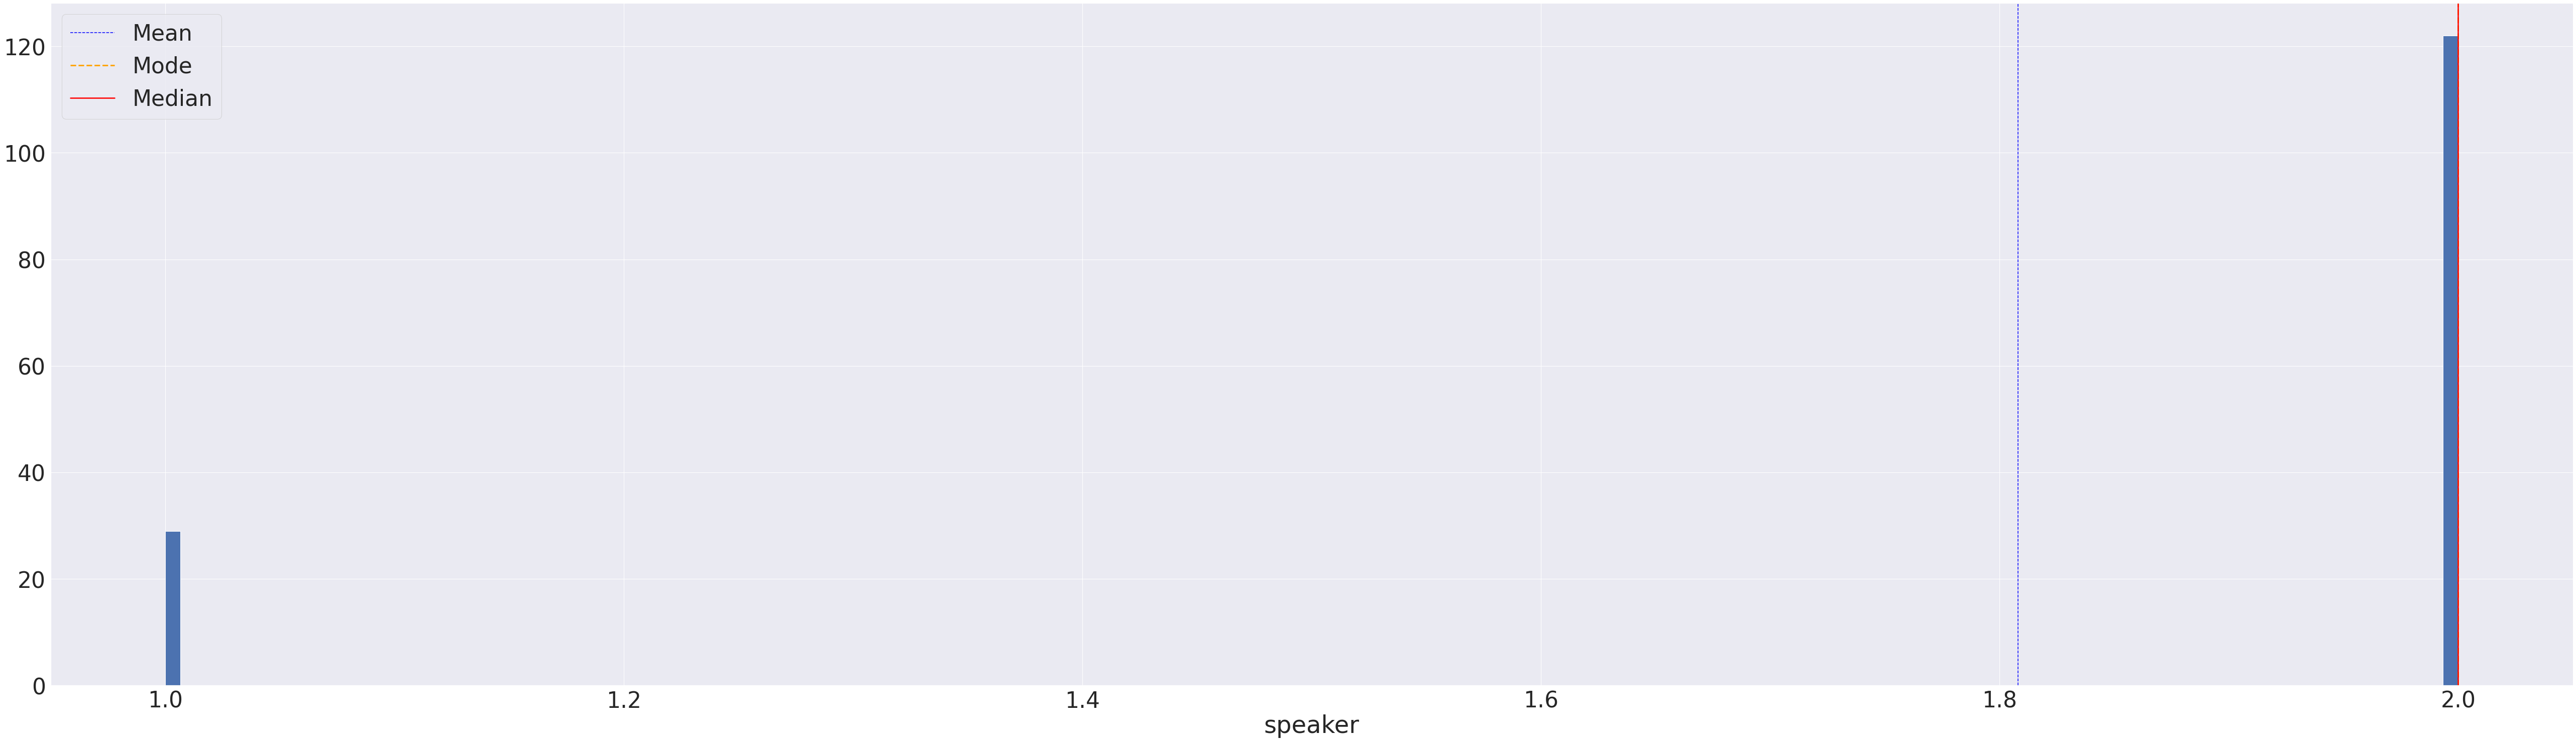

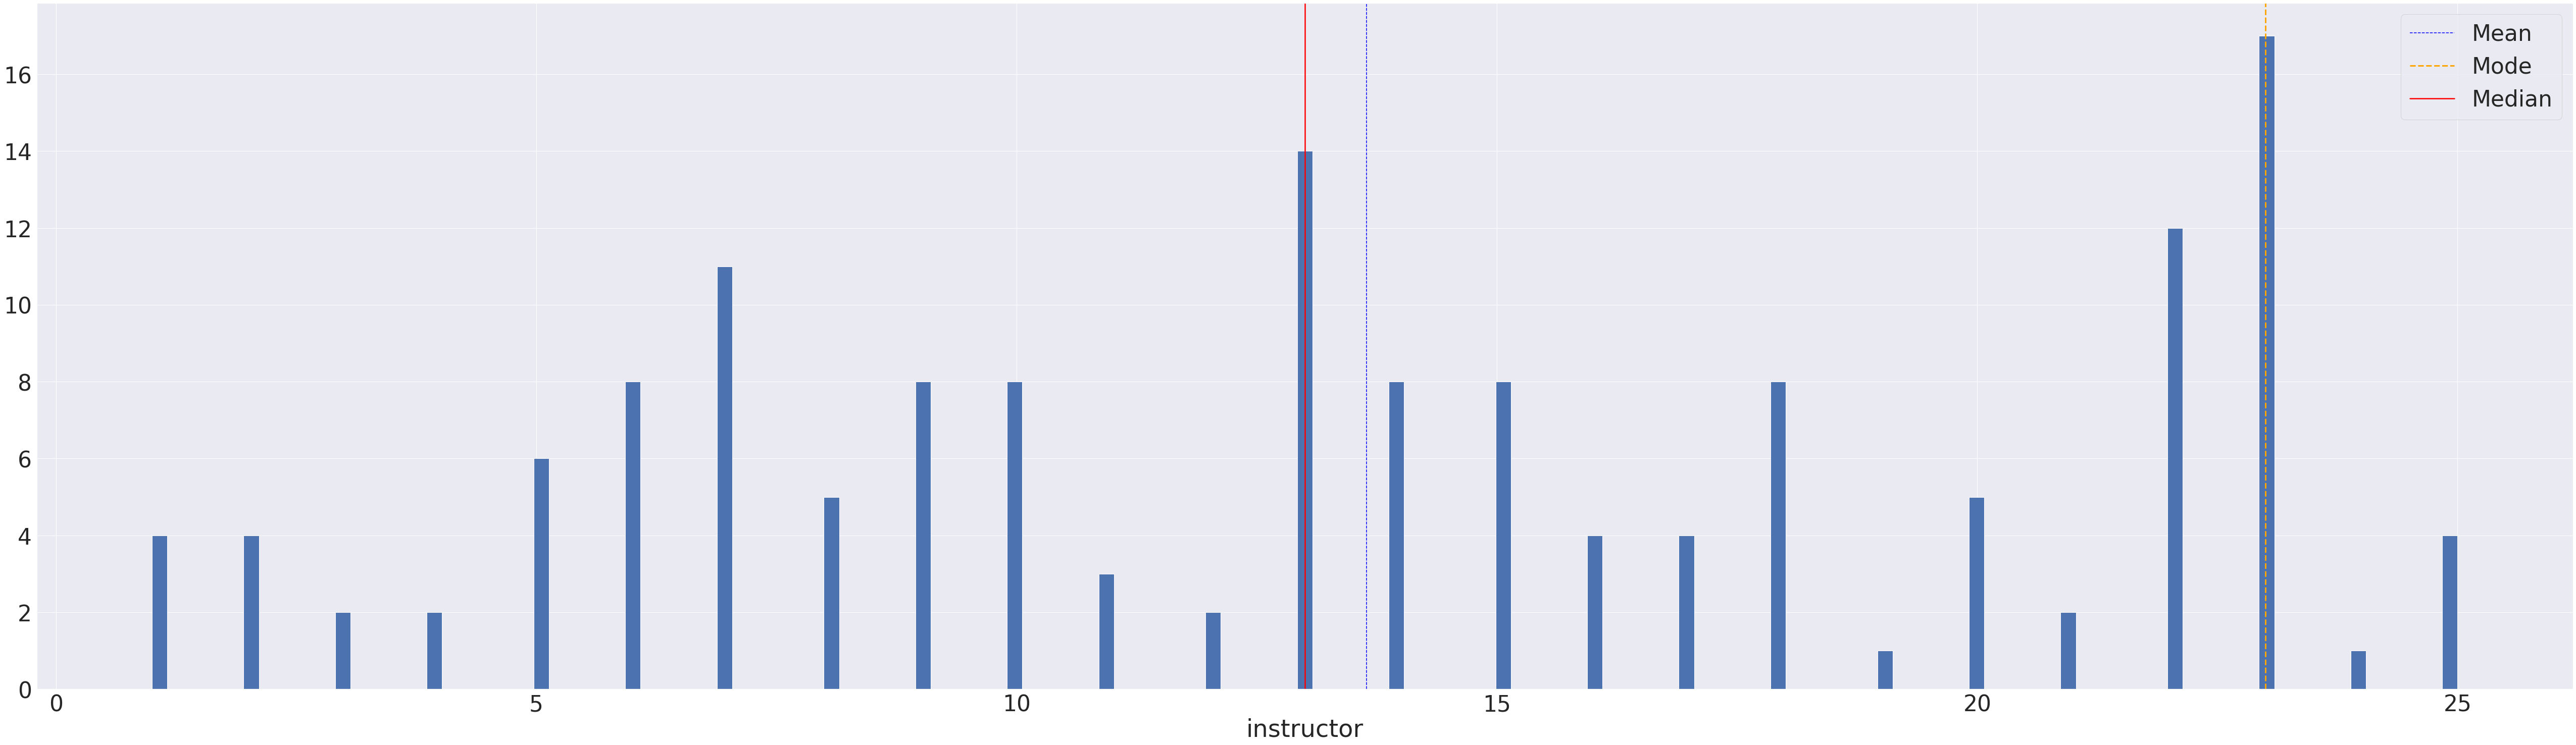

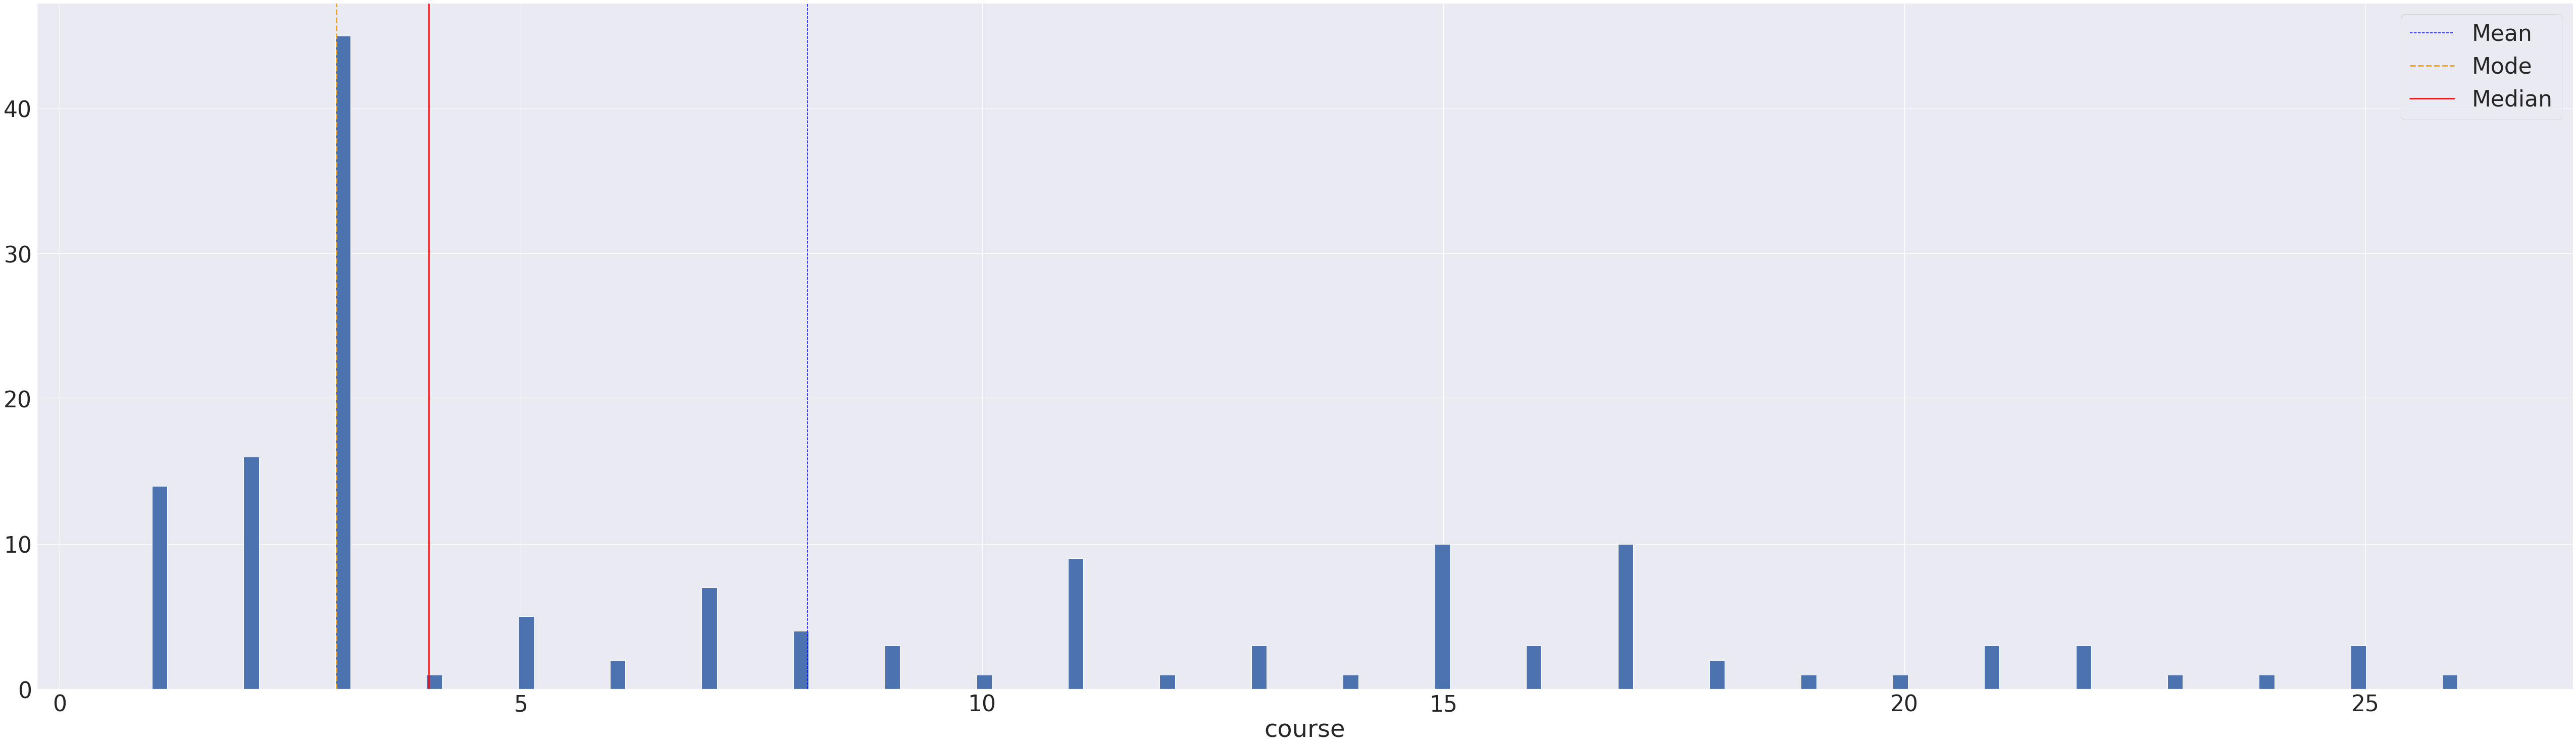

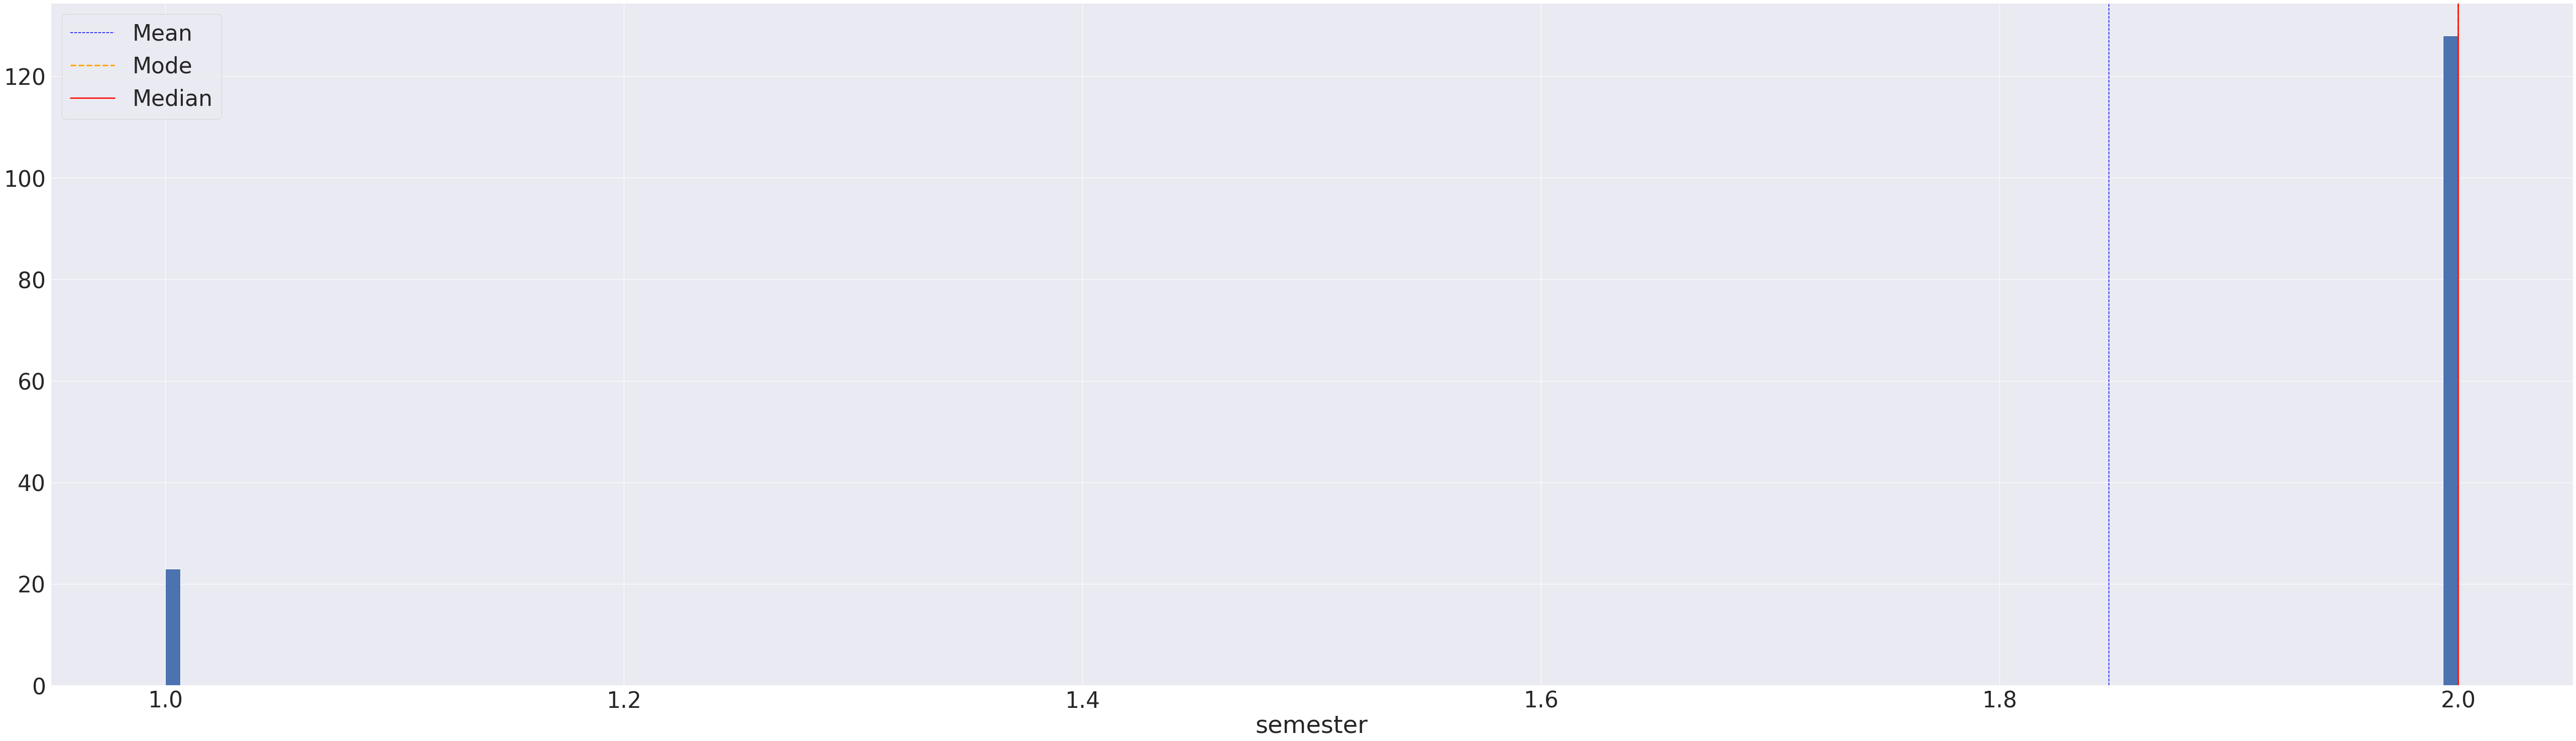

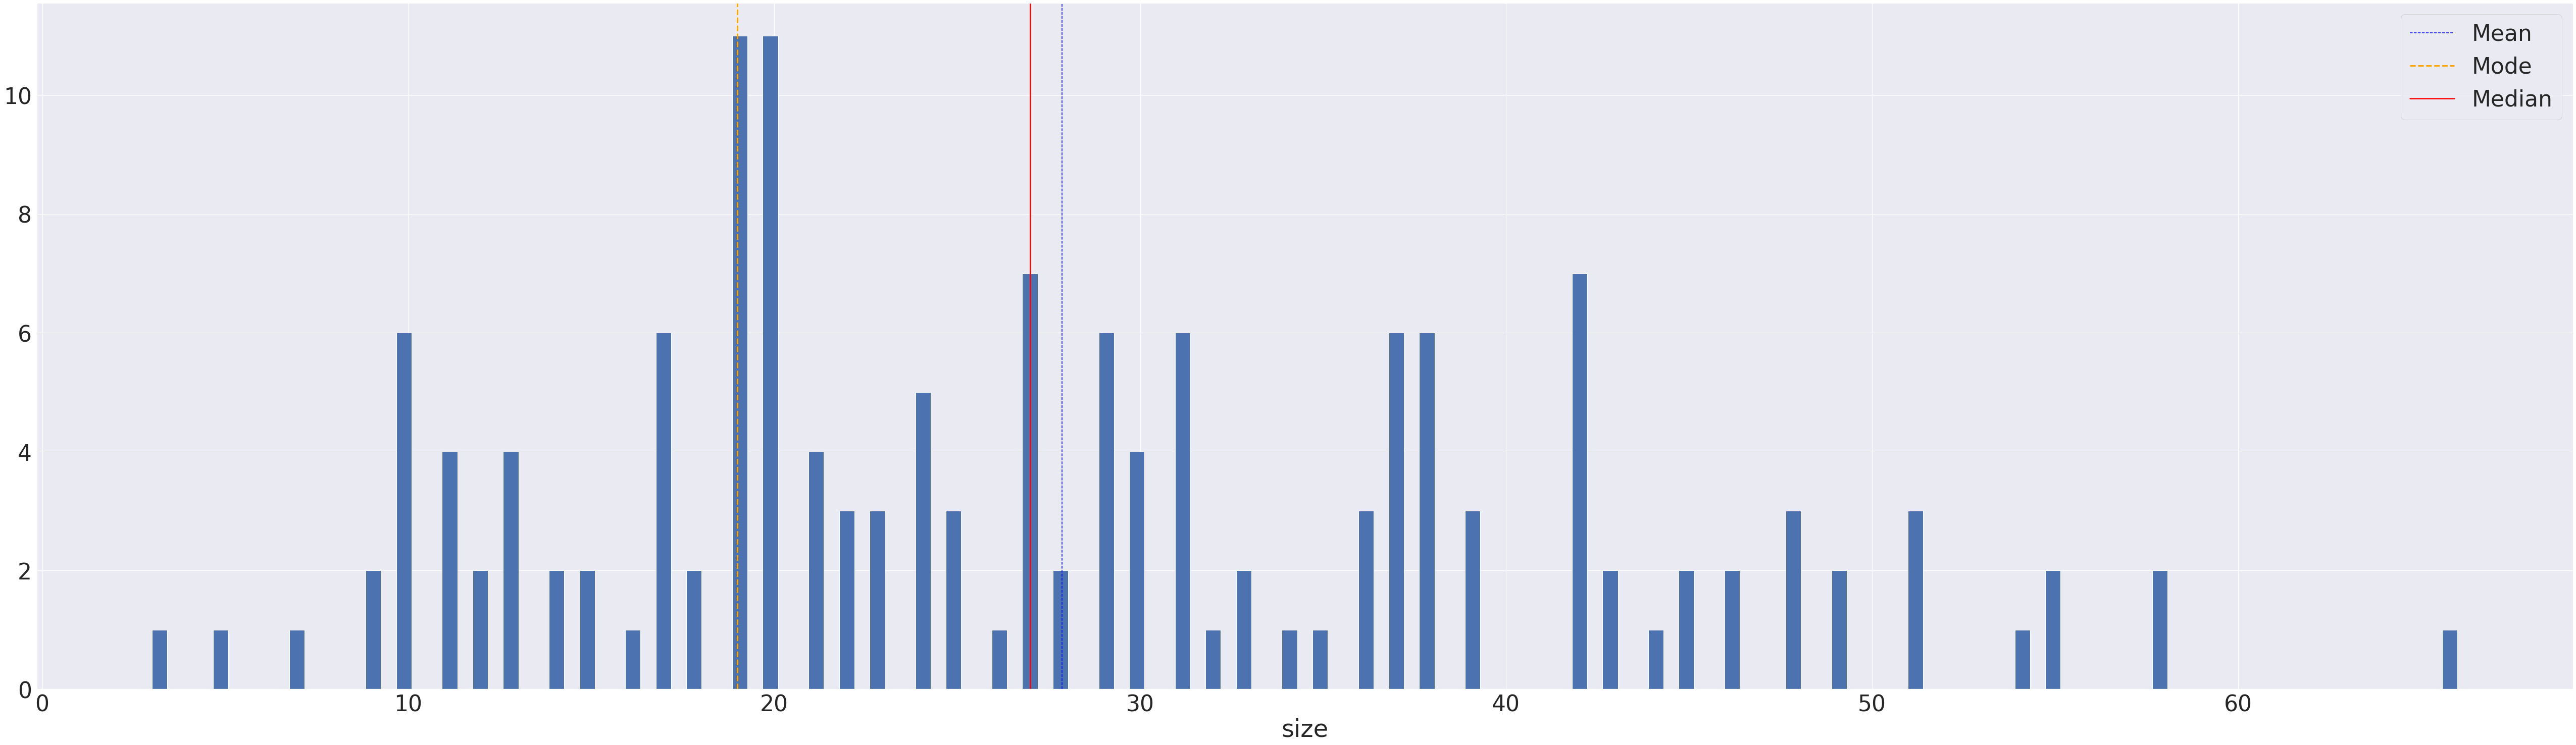

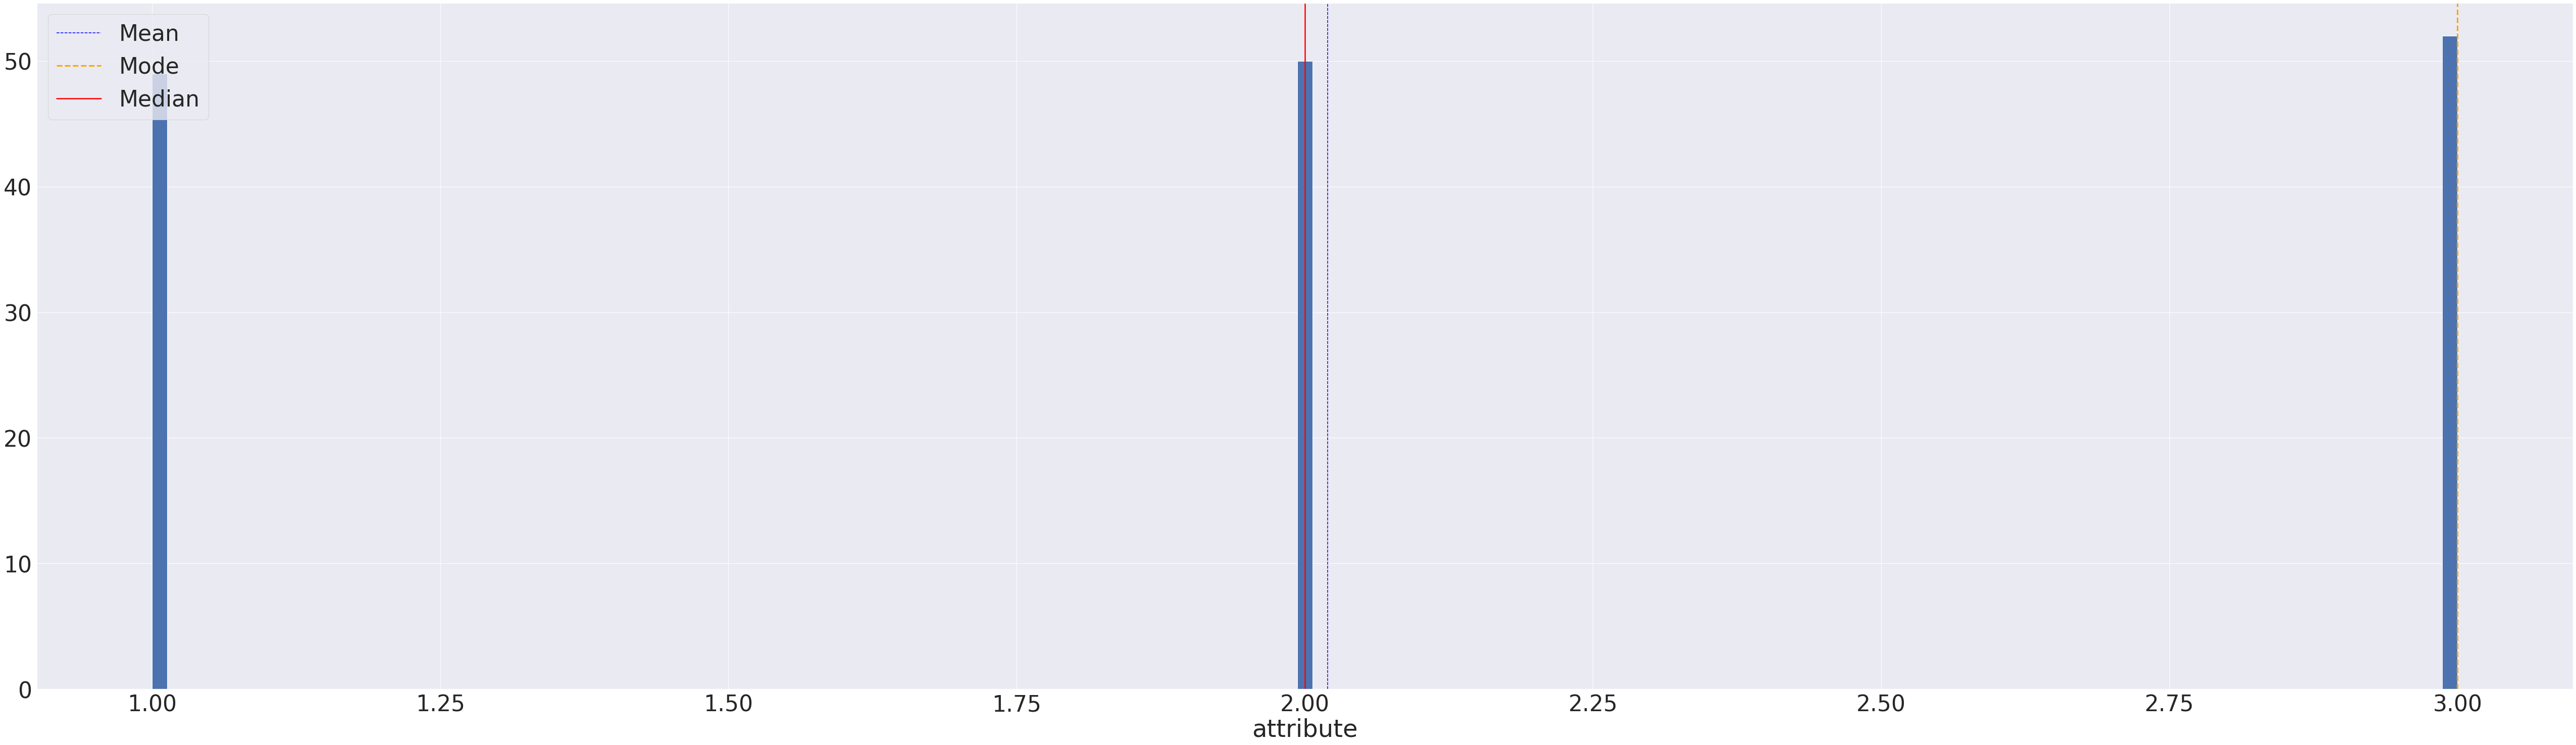

In [19]:
# matplot lib
for heads in data.columns:
  data[heads].hist(bins=151)
  plt.xlabel(heads)
  plt.axvline(x=data[heads].mean(),color='blue', ls='--',label="Mean")
  plt.axvline(x = stats.mode(data[heads])[0][0], color='orange' , linestyle='dashed', linewidth=3, label="Mode")
  plt.axvline(x=data[heads].median(), color='red', lw=2.5,label="Median")
  plt.legend(loc='best')
  plt.show()

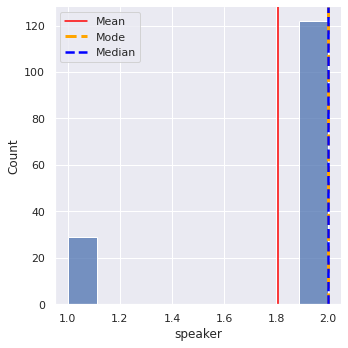

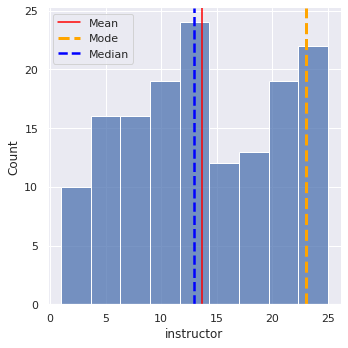

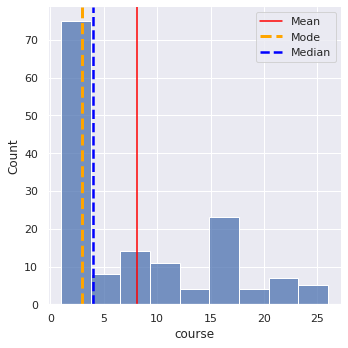

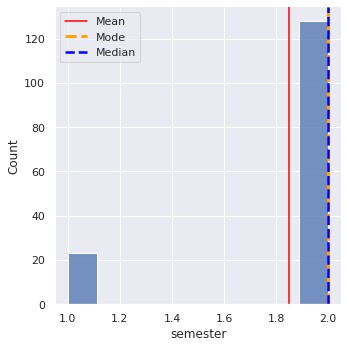

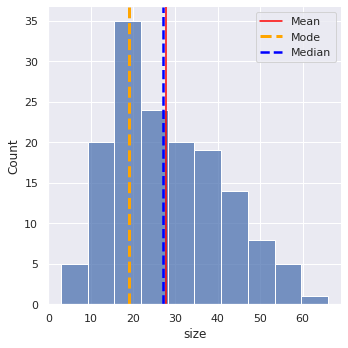

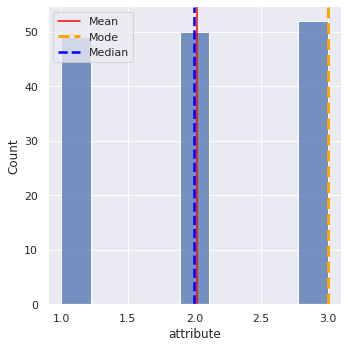

In [20]:
# seaborn plot
# distribution plot 

sns.set_theme(style="darkgrid")
for heads in data.columns:
  sns.displot(data[heads])
  plt.xlabel(heads)
  plt.axvline(x=data[heads].mean(),color='red',label="Mean")
  plt.axvline(x = stats.mode(data[heads])[0][0], color='orange' , linestyle='dashed', linewidth=3, label="Mode")
  plt.axvline(x=data[heads].median(), color='blue', ls='--', lw=2.5,label="Median")
  plt.legend(loc='best')
  plt.show()

### inference 
the distribution plots are good for continious data but much information cannot be gathered about the categorical or binary data, as we can see the above graph.



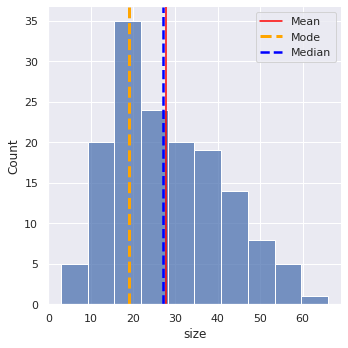

In [21]:
sns.displot(data['size'])
plt.xlabel('size')
plt.axvline(x=data['size'].mean(),color='red',label="Mean")
plt.axvline(x = stats.mode(data['size'])[0][0], color='orange' , linestyle='dashed', linewidth=3, label="Mode")
plt.axvline(x=data['size'].median(), color='blue', ls='--', lw=2.5,label="Median")
plt.legend(loc='best')
plt.show()

Since size attribute has continious data, we can have a better understanding the distribution of values and see the outliers. 
* <b>Centeral tendency</b> : we can see that the center of data lies near 30  and most of the data lies between 10 and 60 in the graph.
* <b>Variablity</b> : we can see the data slightly more towards the left side of the center than the right side, this can give the idea of which values are more common in the data set.
* can also help in determining the outliers also. 


## c) Bar plot

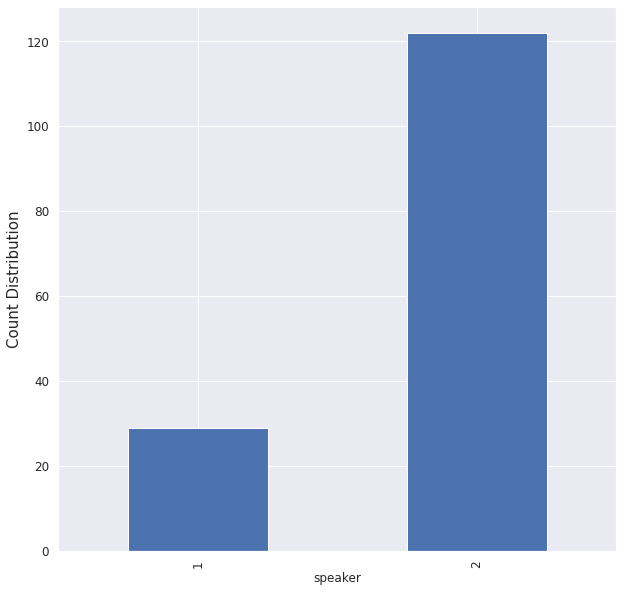

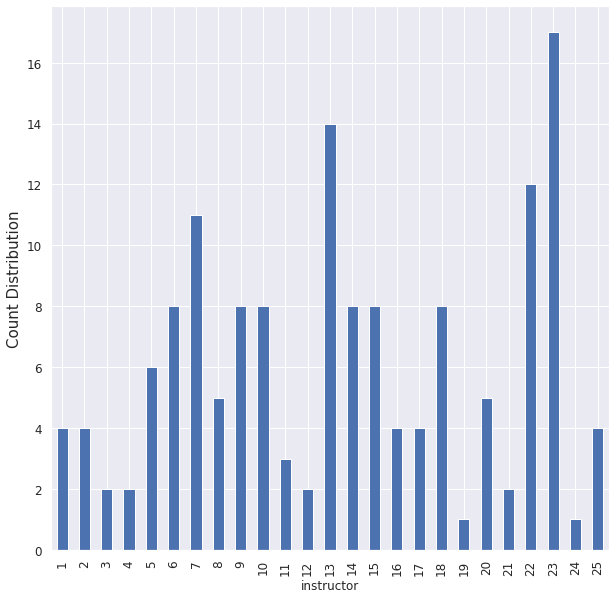

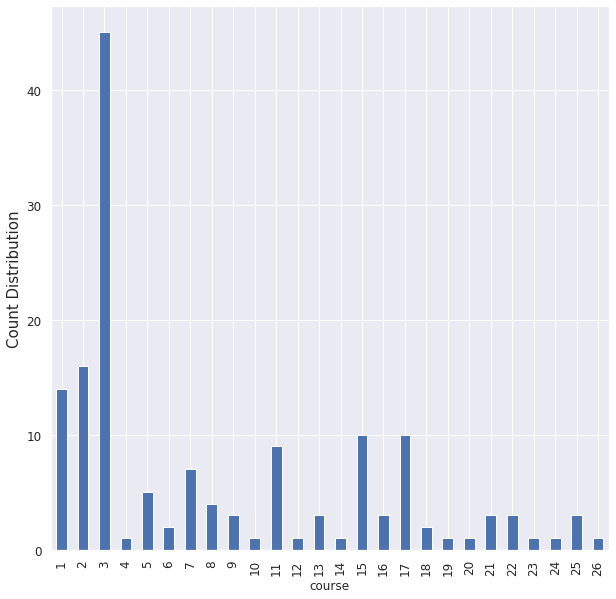

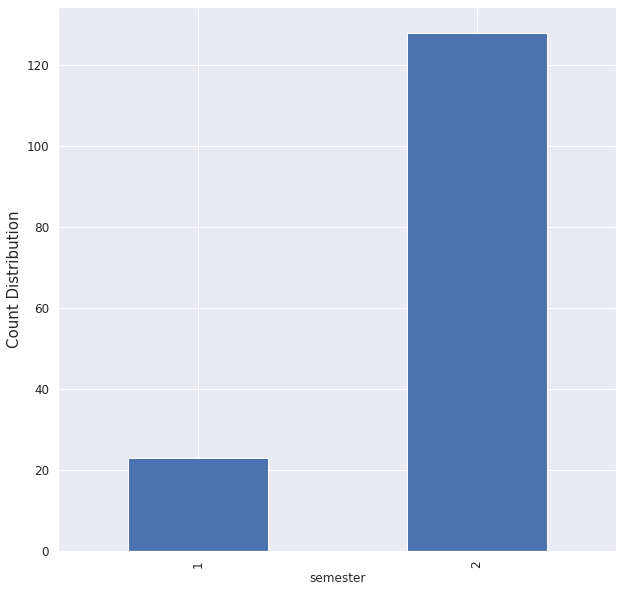

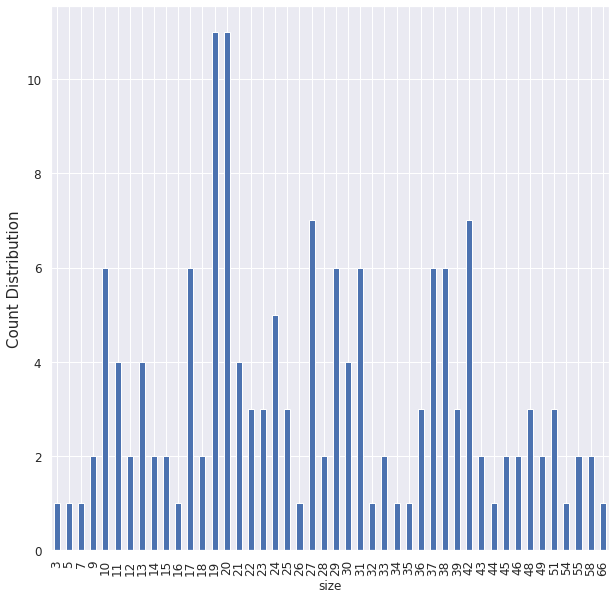

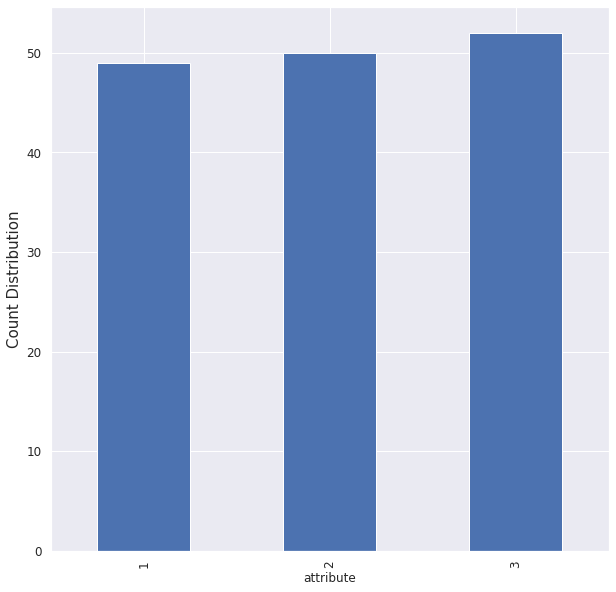

In [22]:
#matplotlib
# count distribution plots for all attributes
for cols in data.columns:
  ax = data.groupby(cols).size().plot.bar(figsize=(10, 10),fontsize=12)
  ax.set_ylabel('Count Distribution',fontsize=15)
  plt.show()




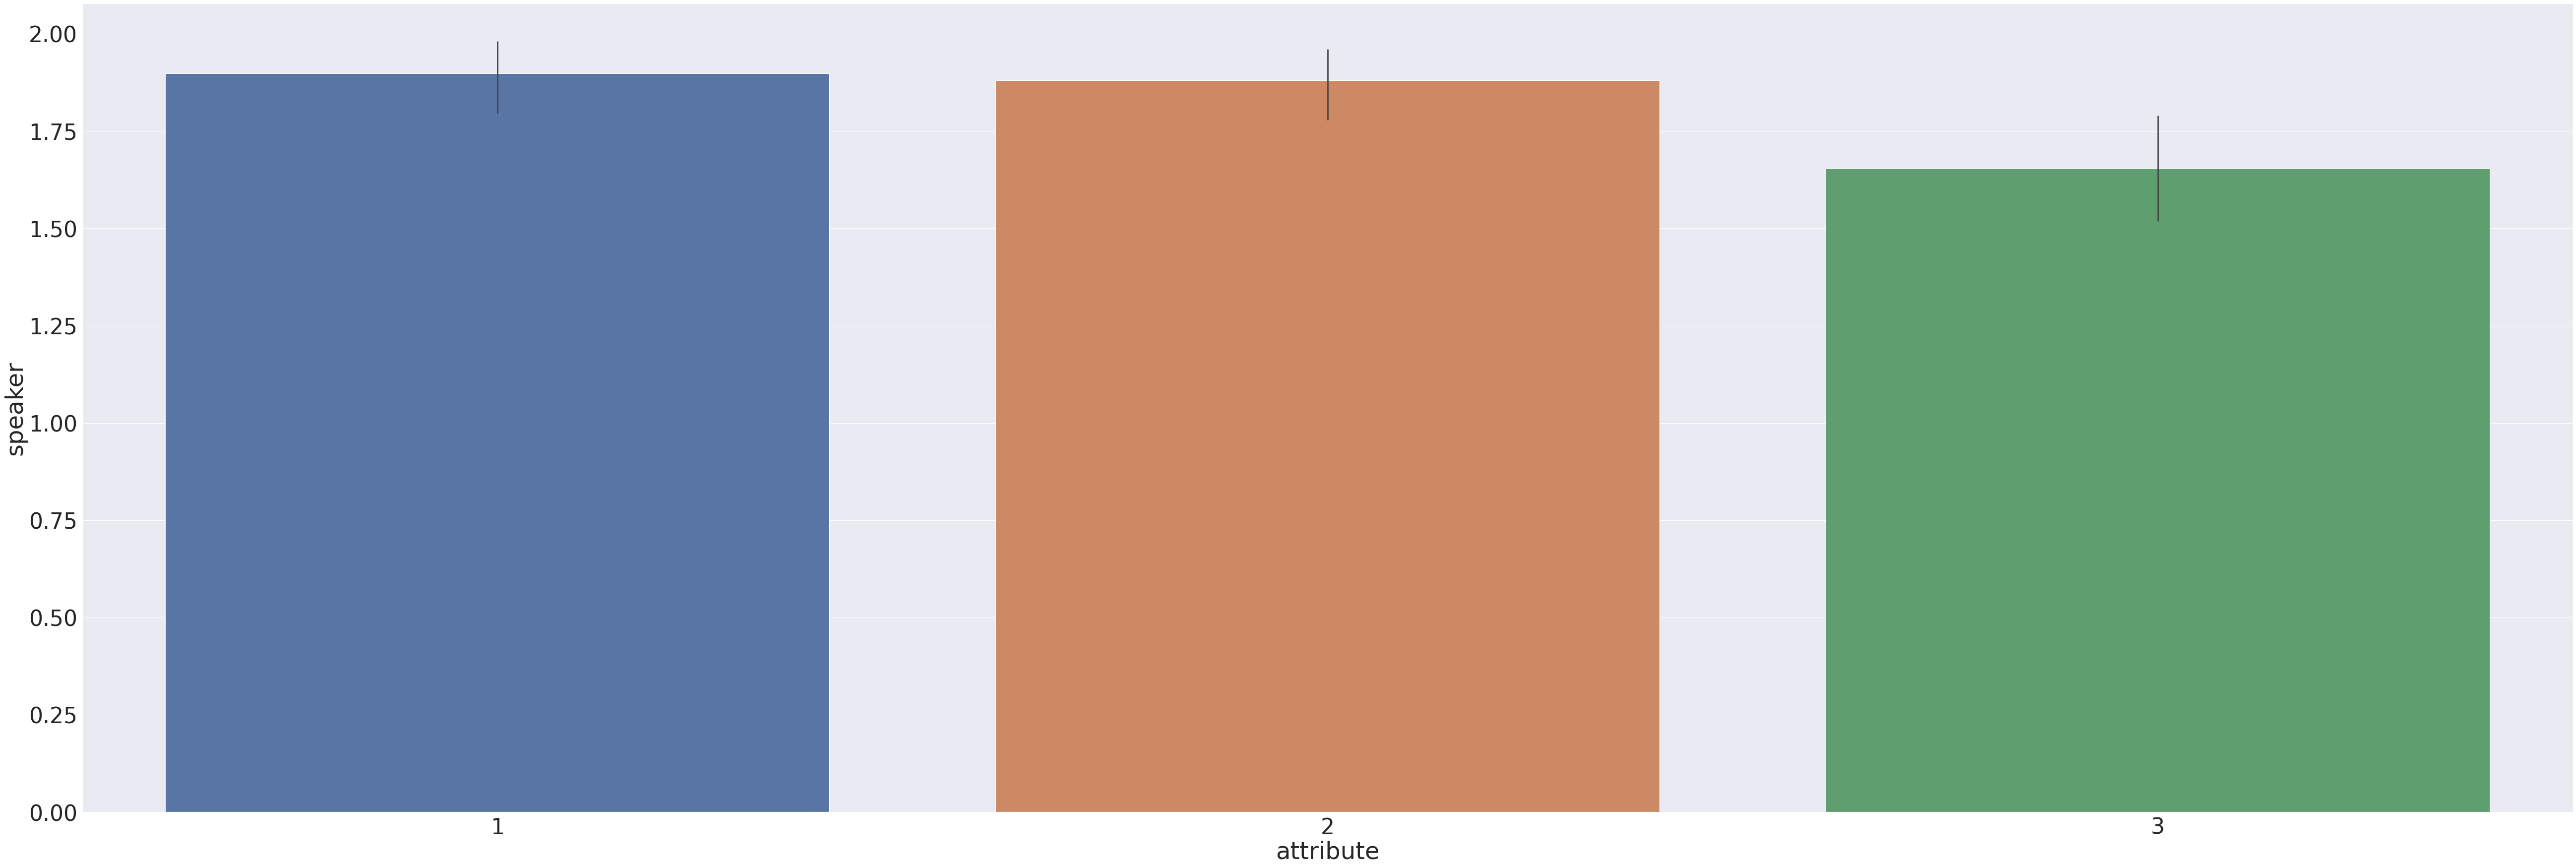

In [23]:
 # seaborn bar graph, to check distribution of categorical data wrt to attributes
sns.set(rc = {'figure.figsize':(90,30)},font_scale = 4)
sns.barplot(x='attribute',y='speaker',data = data)

* infrence attribute 1 has more speakers than attribute 2 and 3


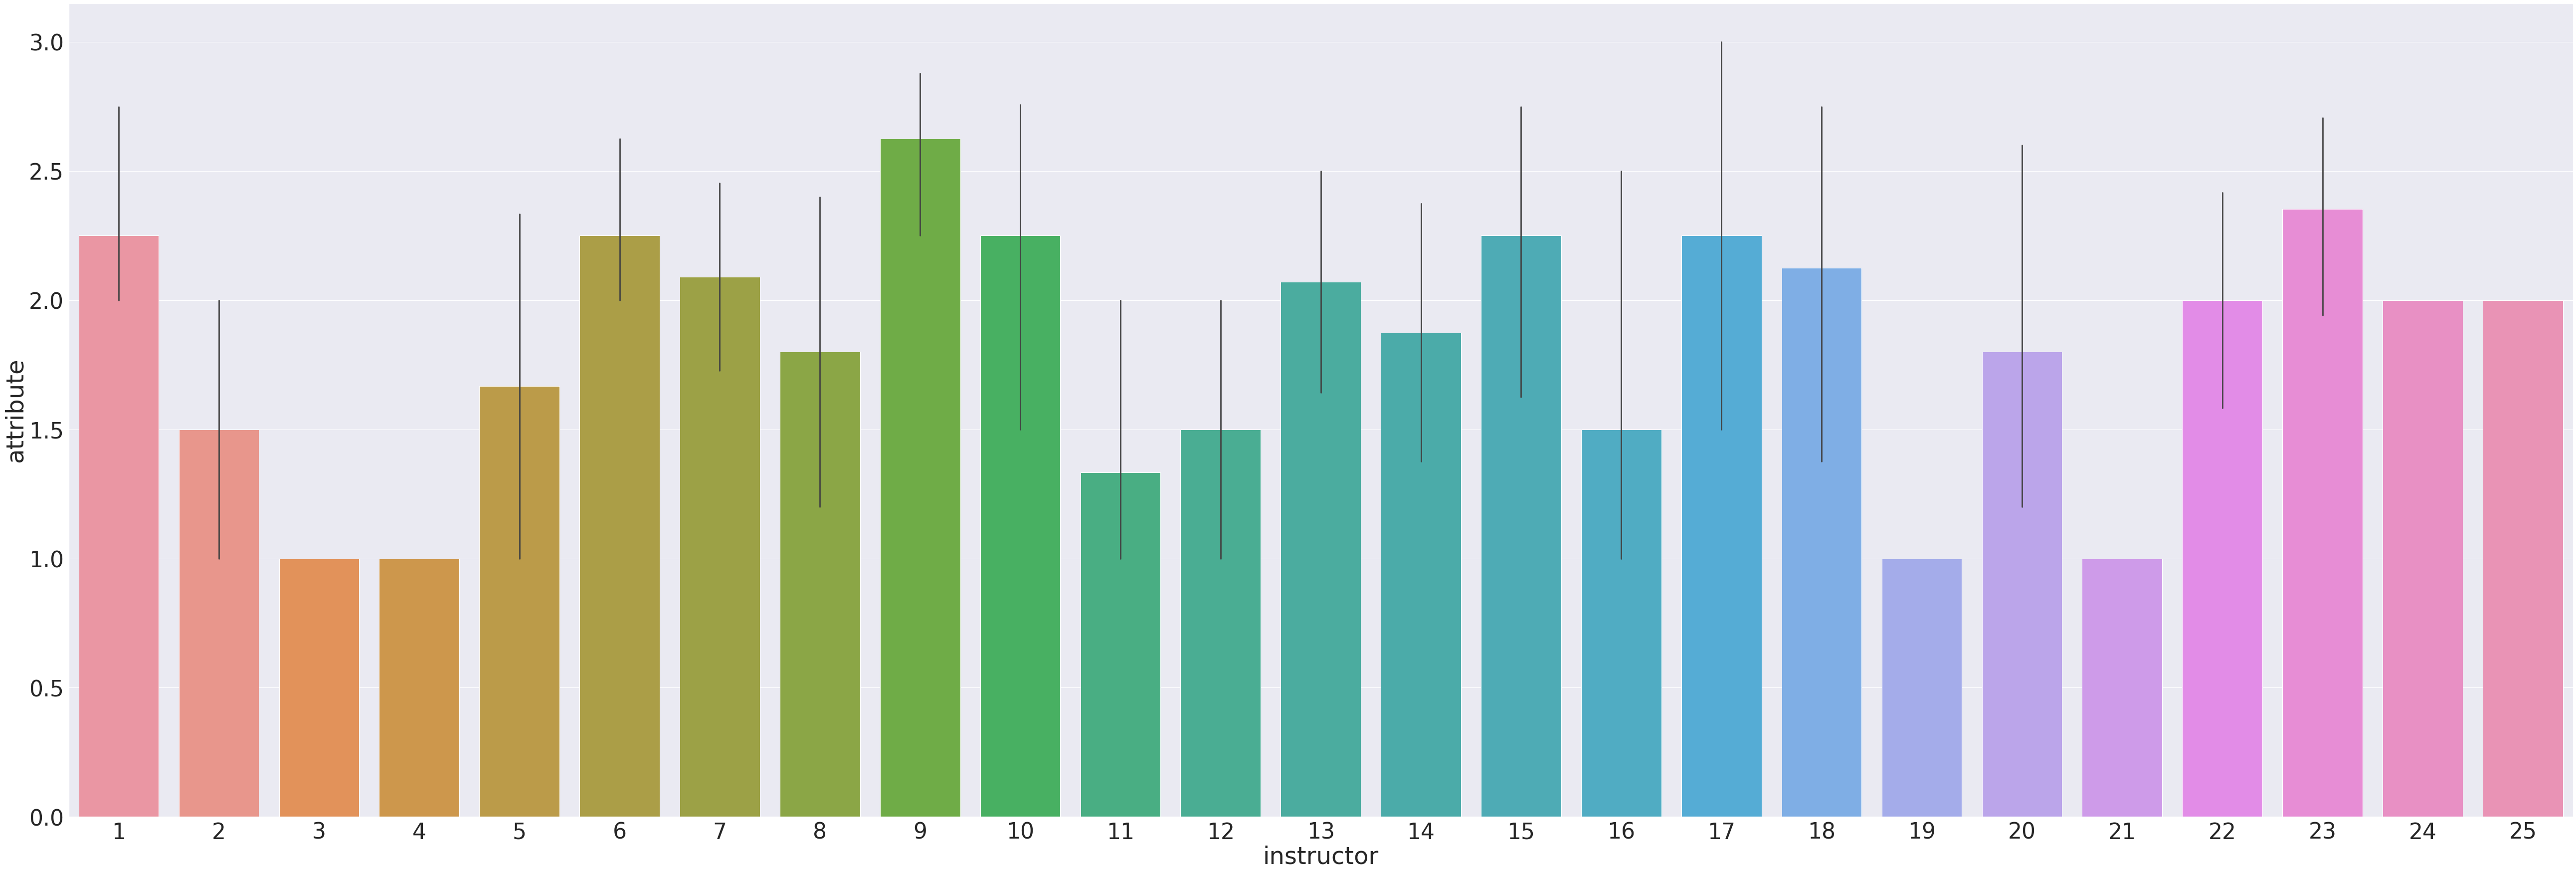

In [24]:
sns.barplot(x='instructor',y='attribute',data = data)

out of 25 categories category number 17 has the highest attribute value

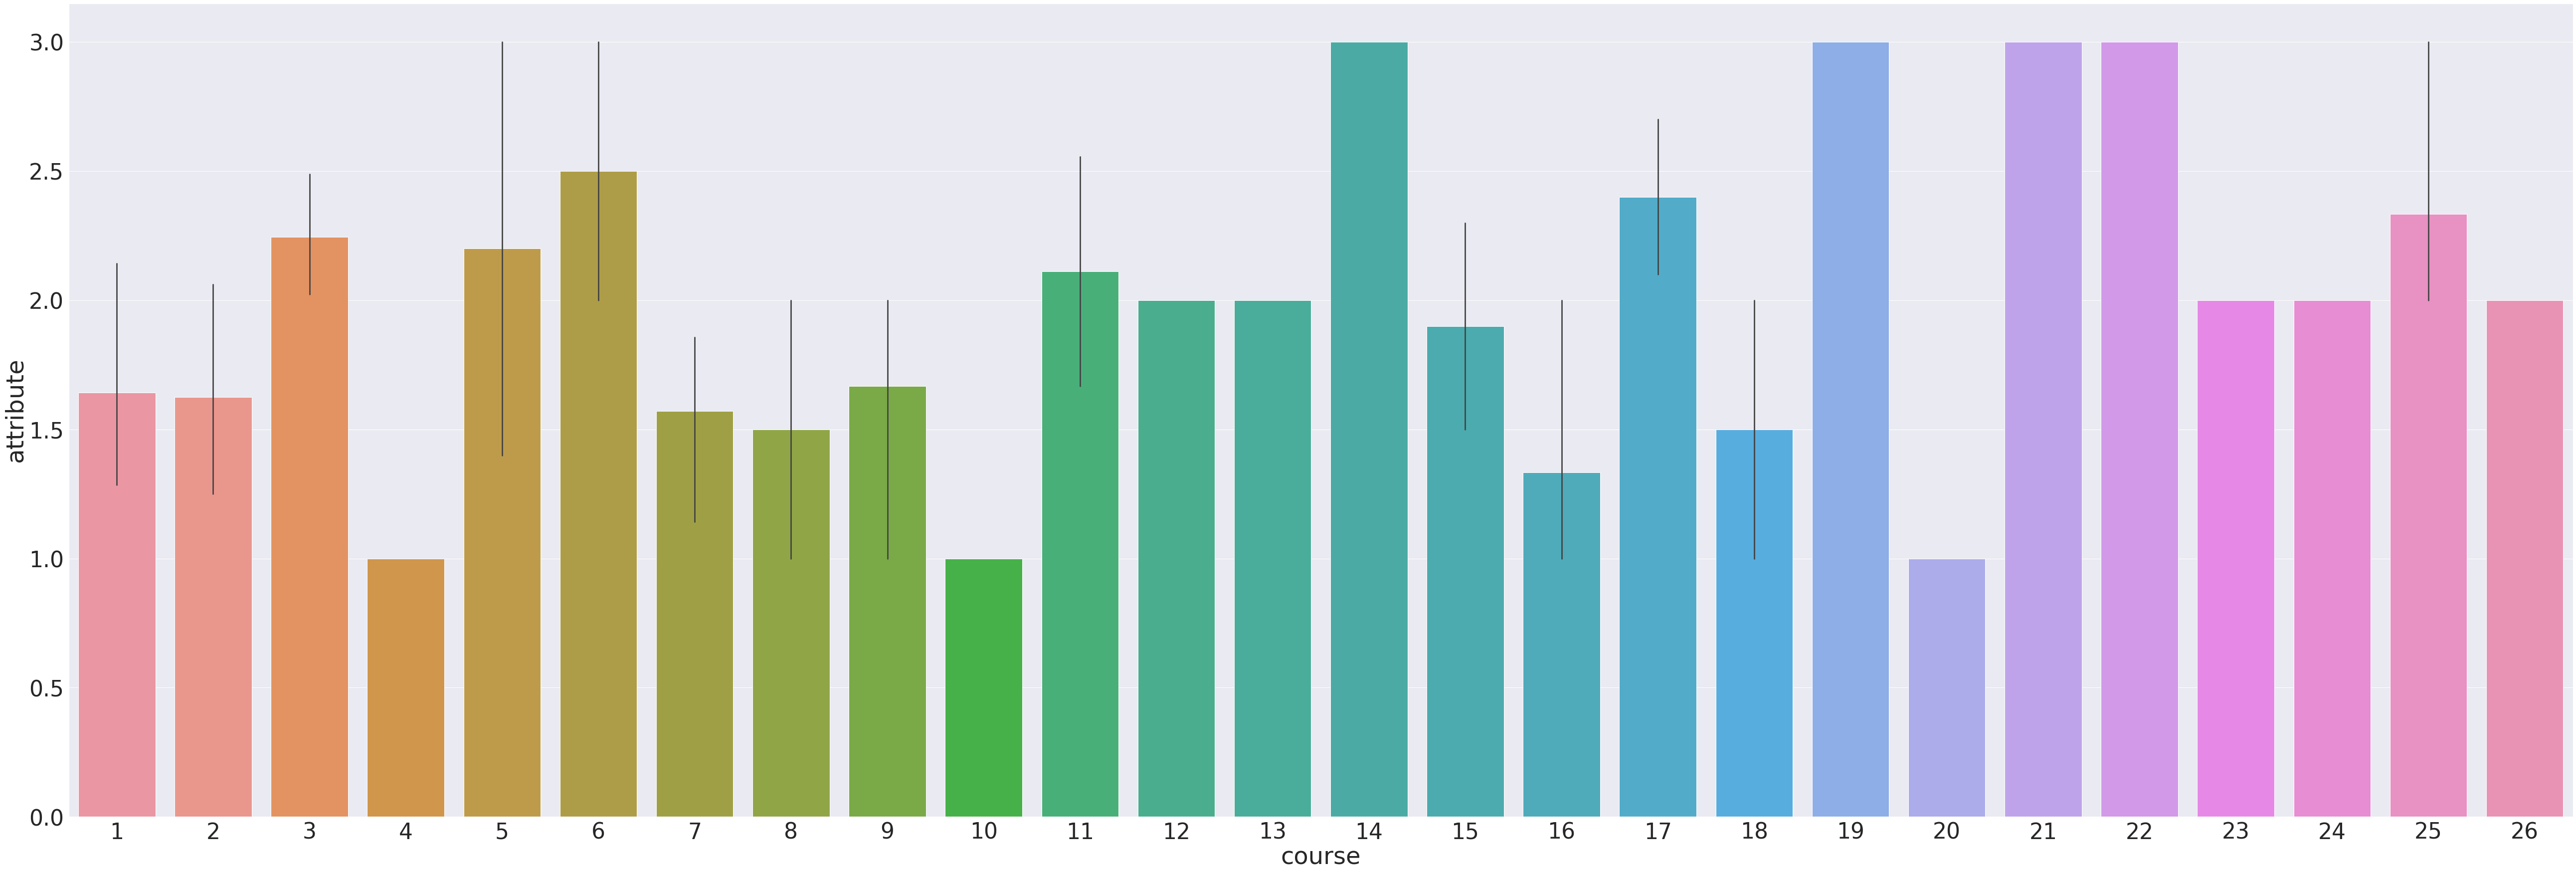

In [25]:
sns.barplot(x='course',y='attribute',data = data)

out of 26 courses course number 14,19,21 and 22 has the highest attribute value

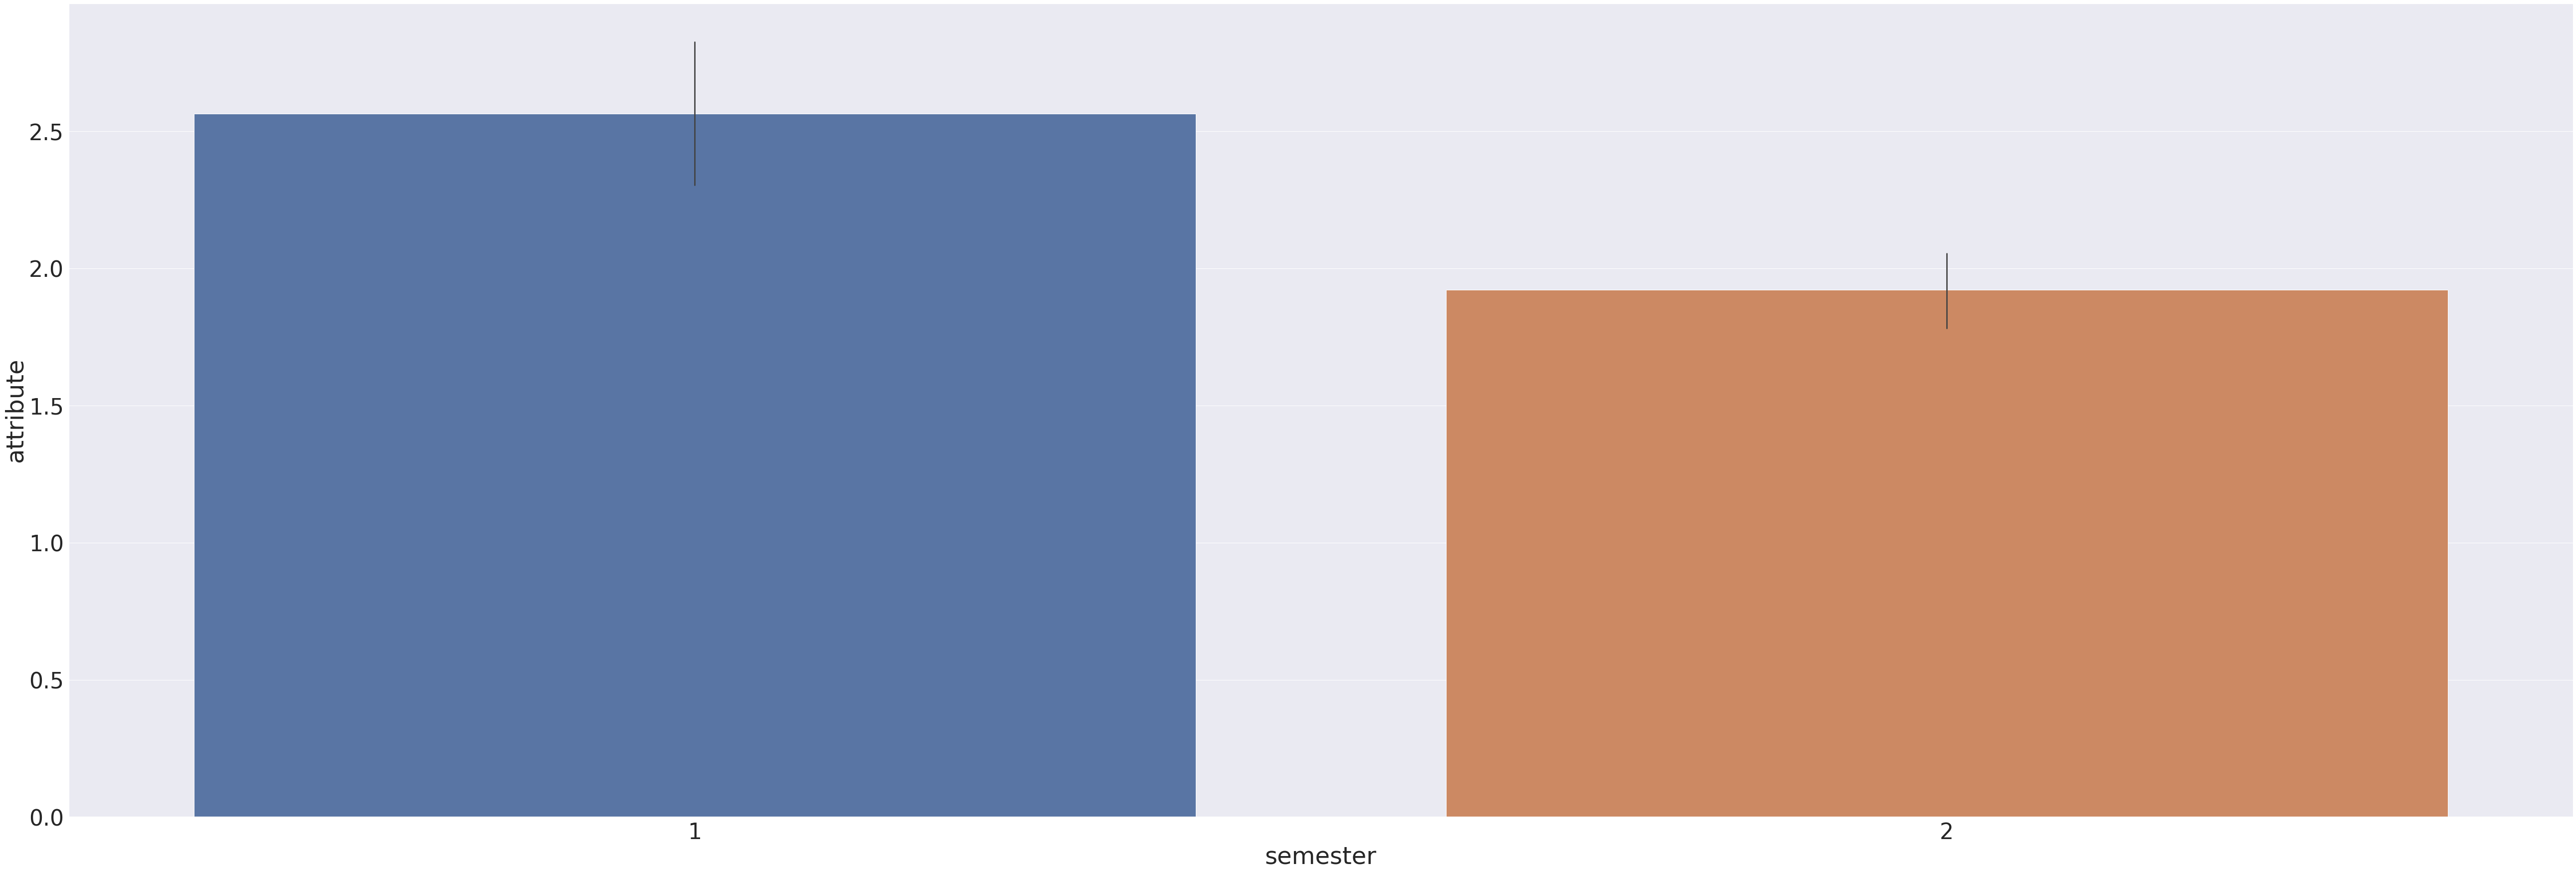

In [26]:
sns.barplot(x='semester',y='attribute',data = data)

1st semester has high class attribute than 2nd class

## d) violin plot

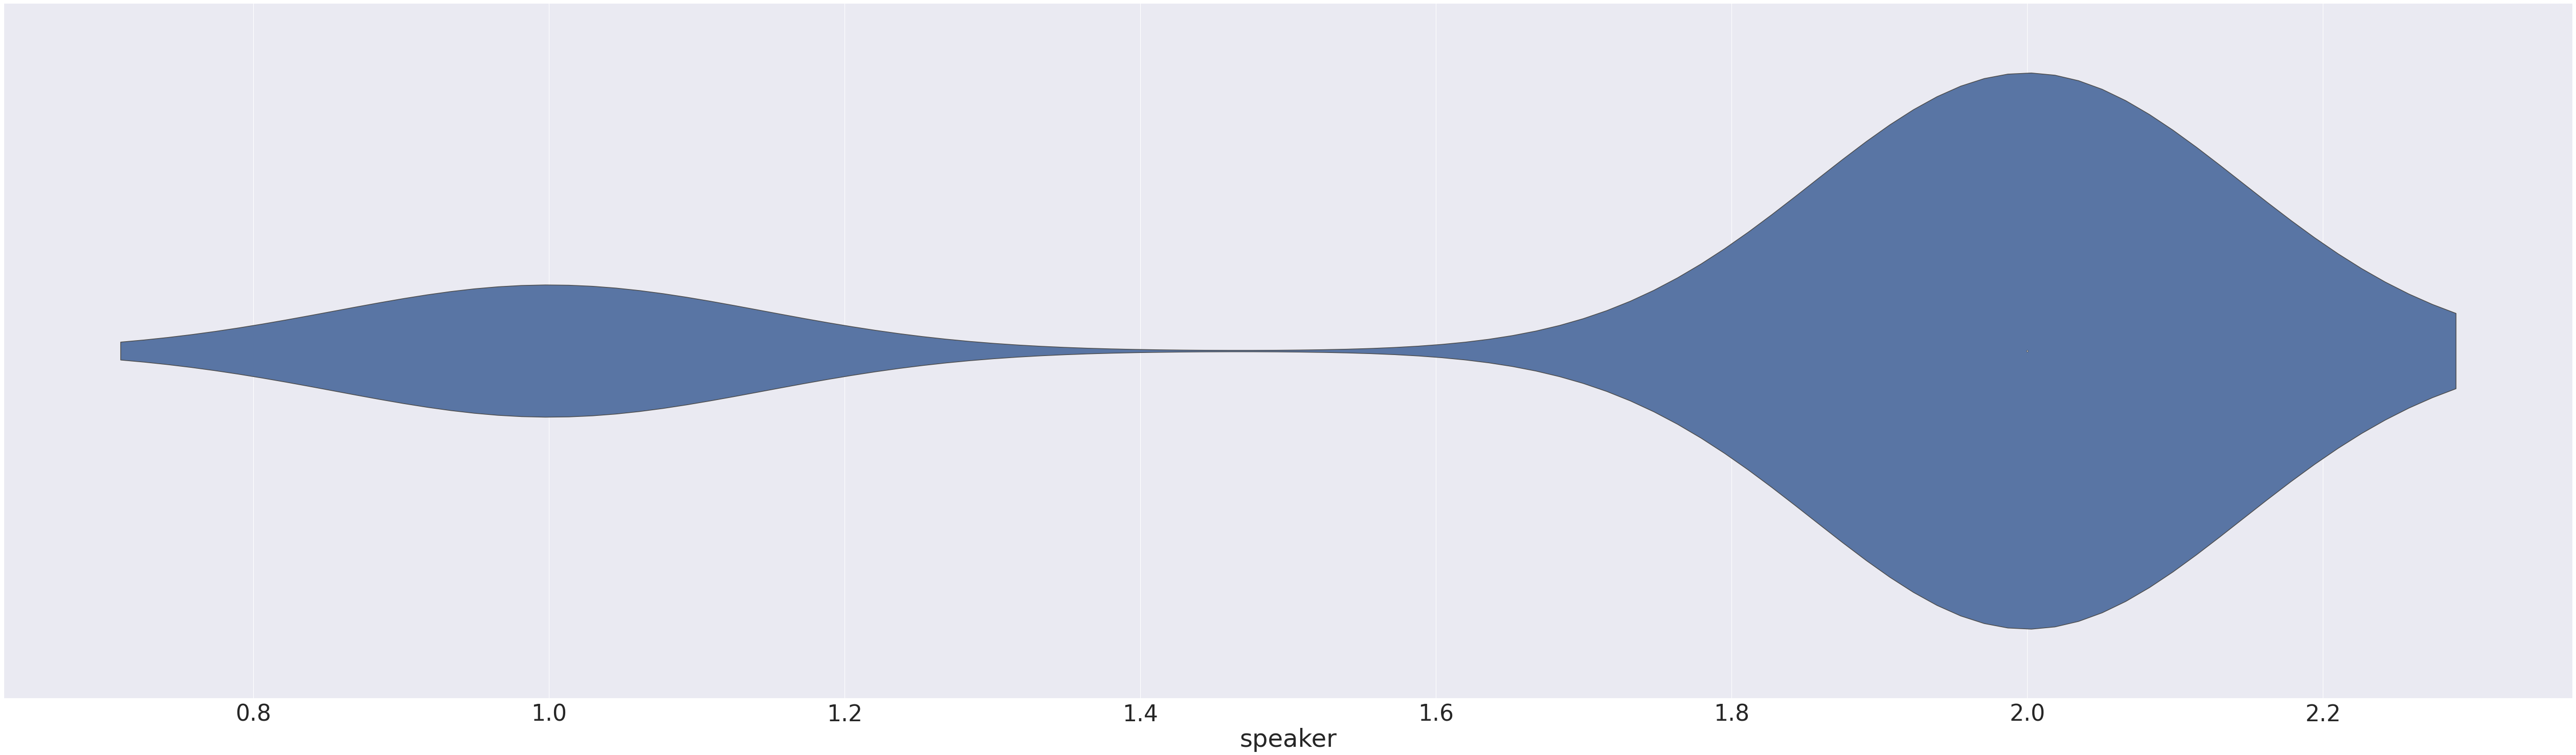

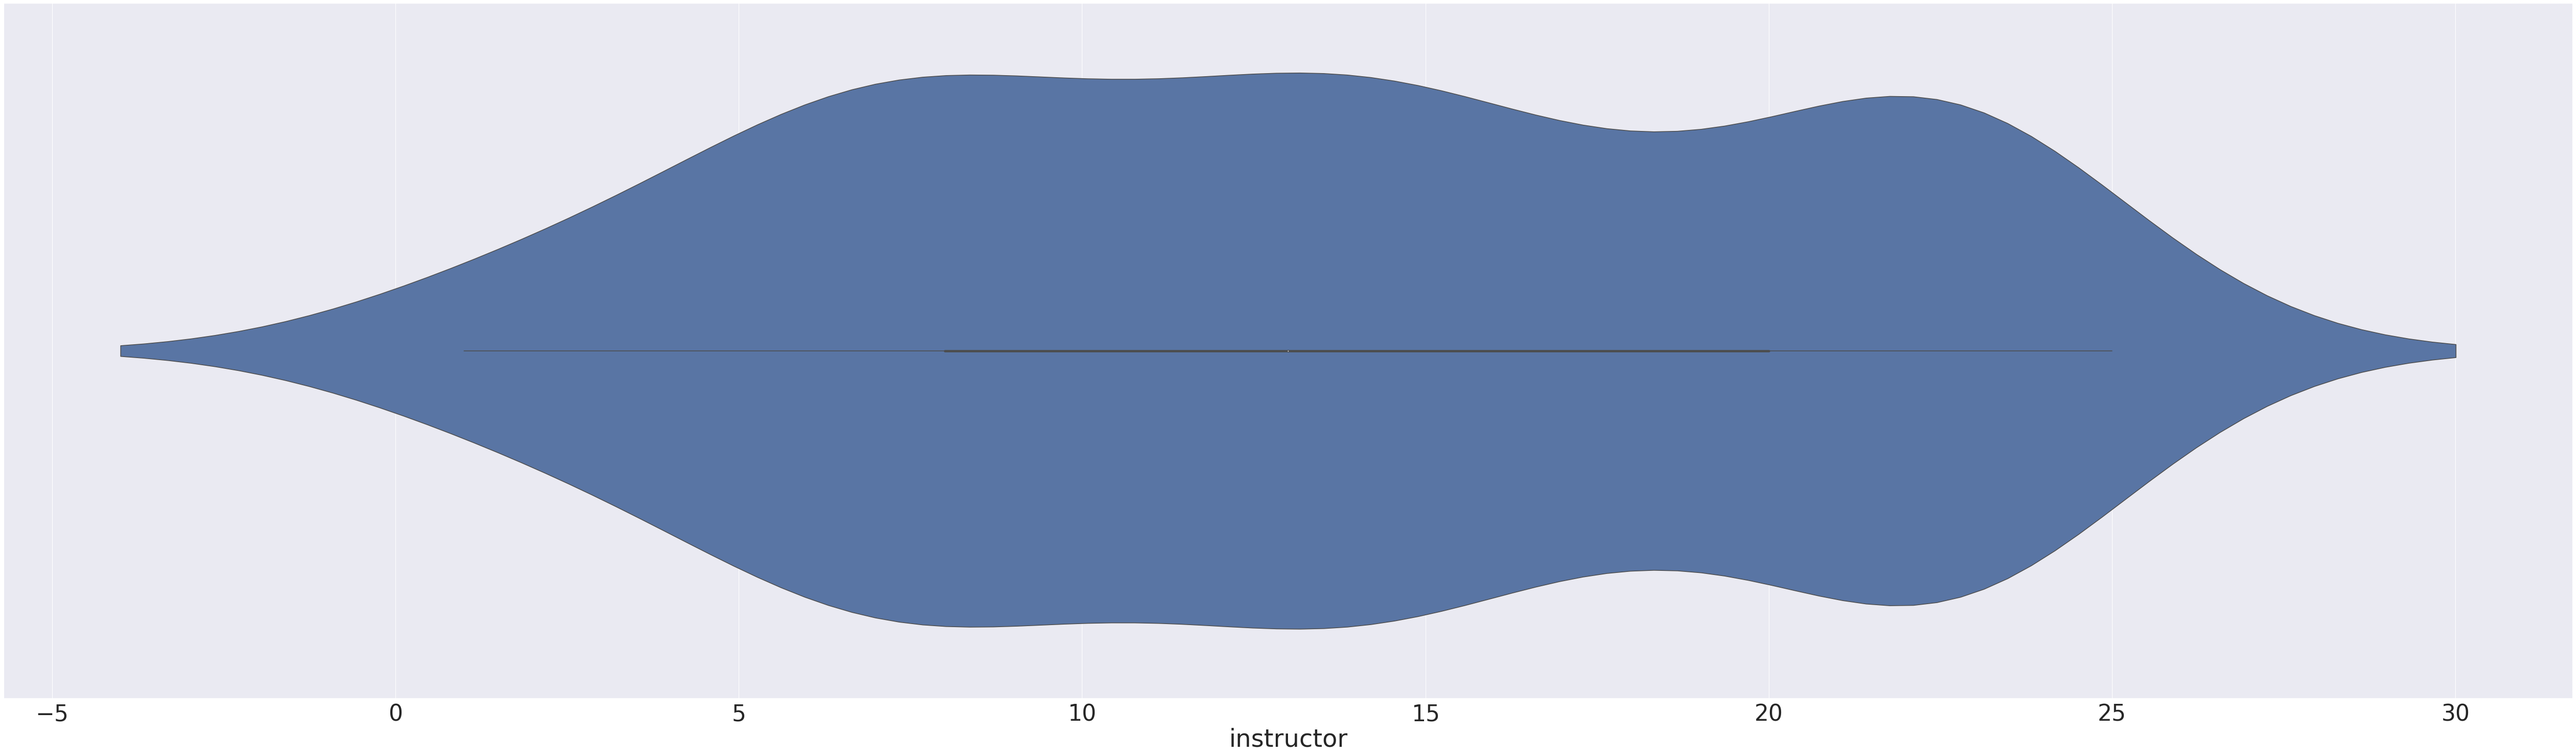

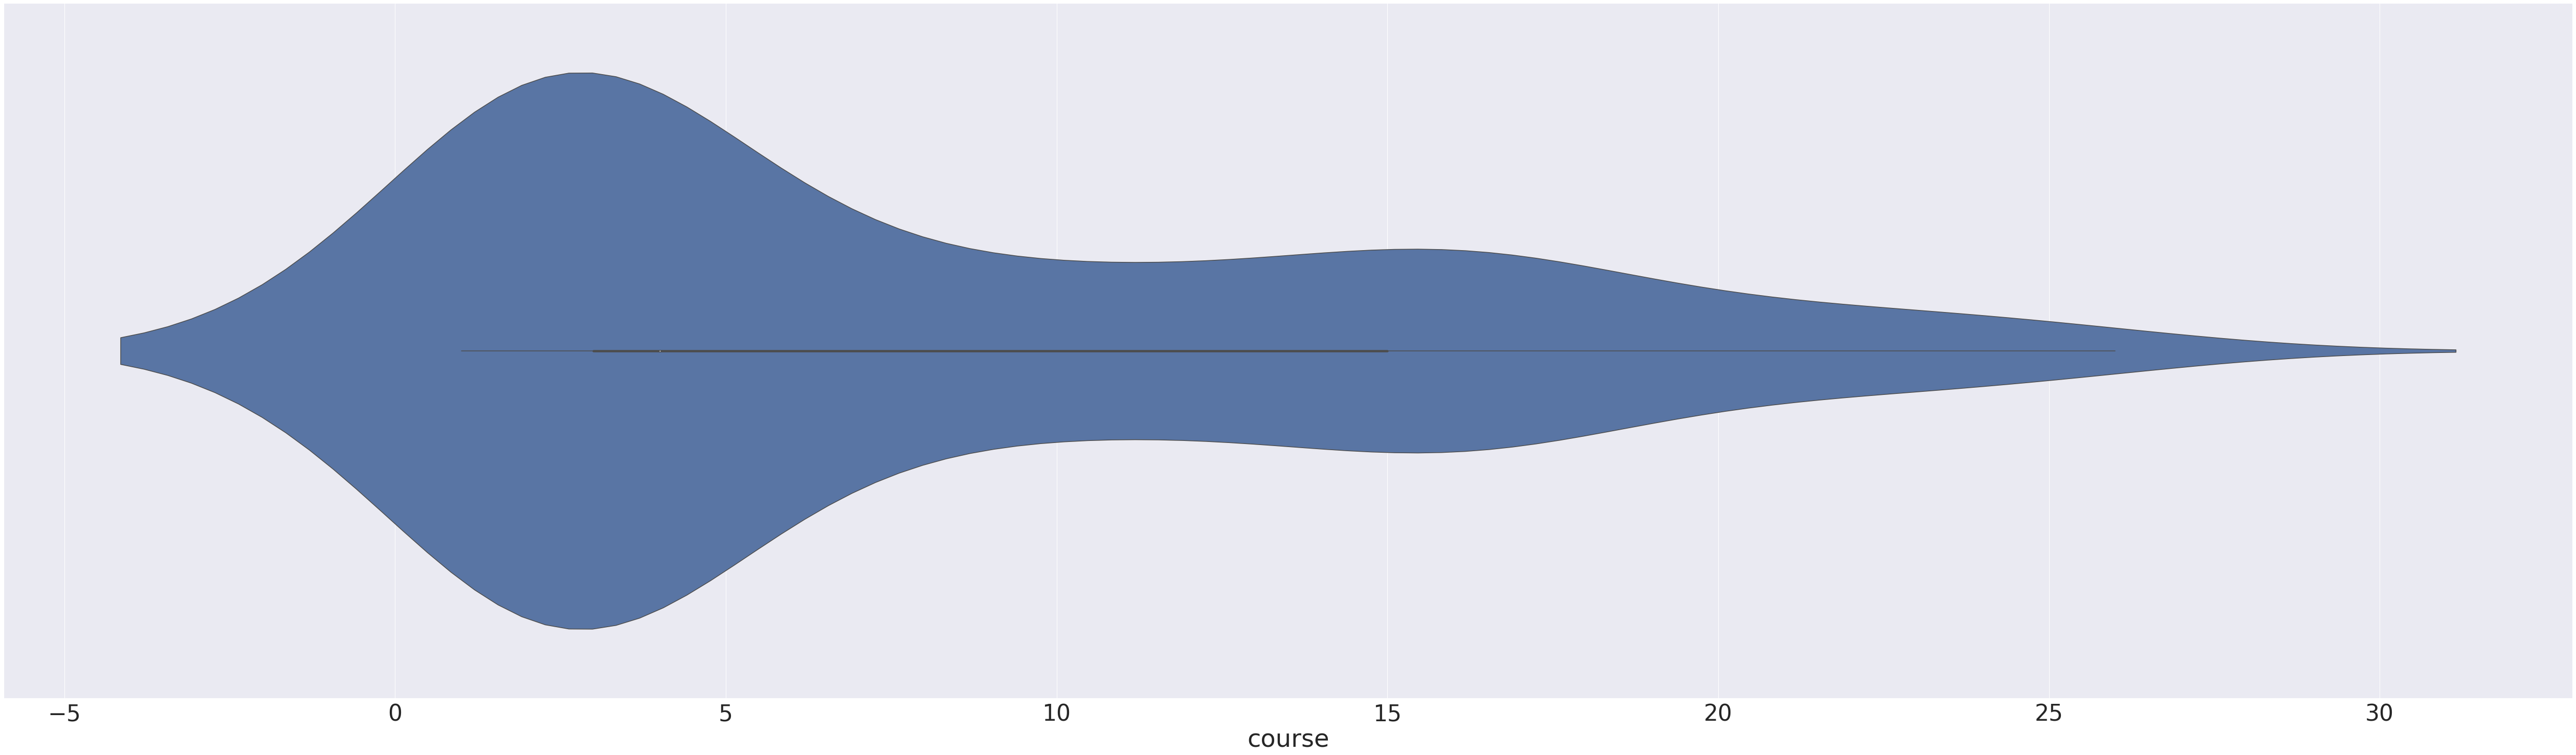

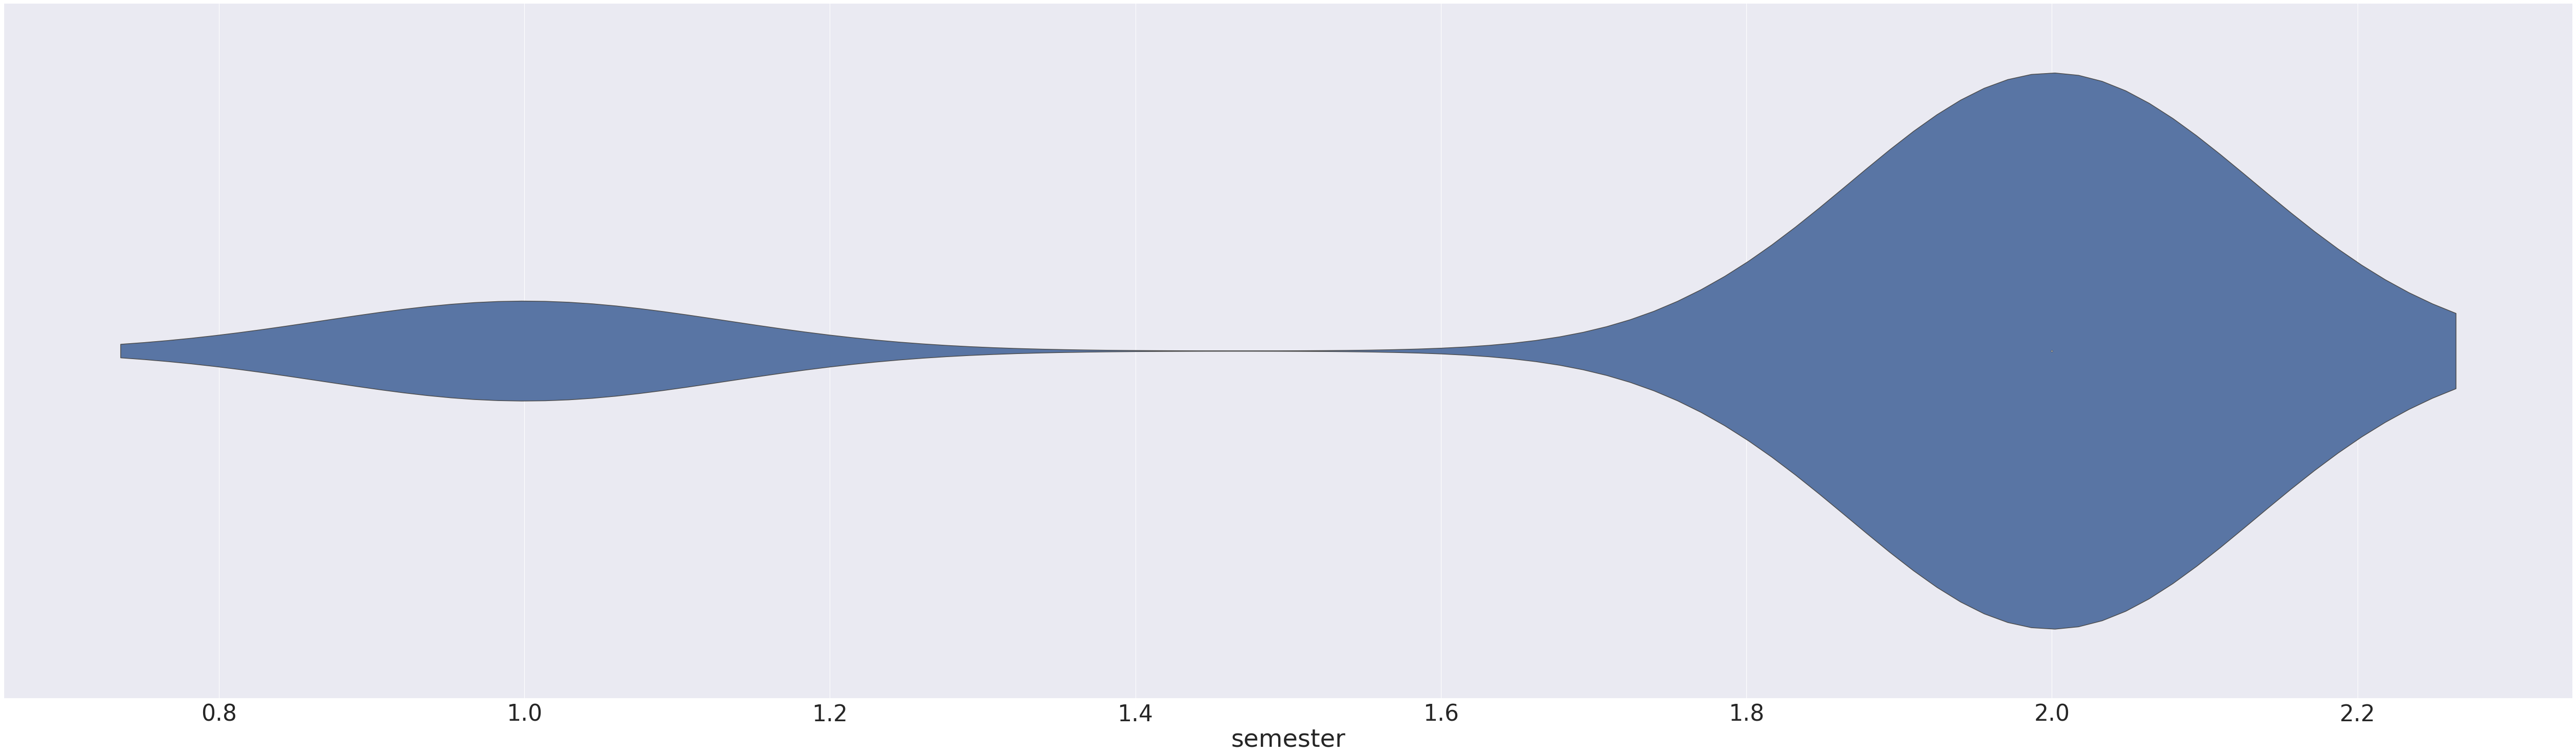

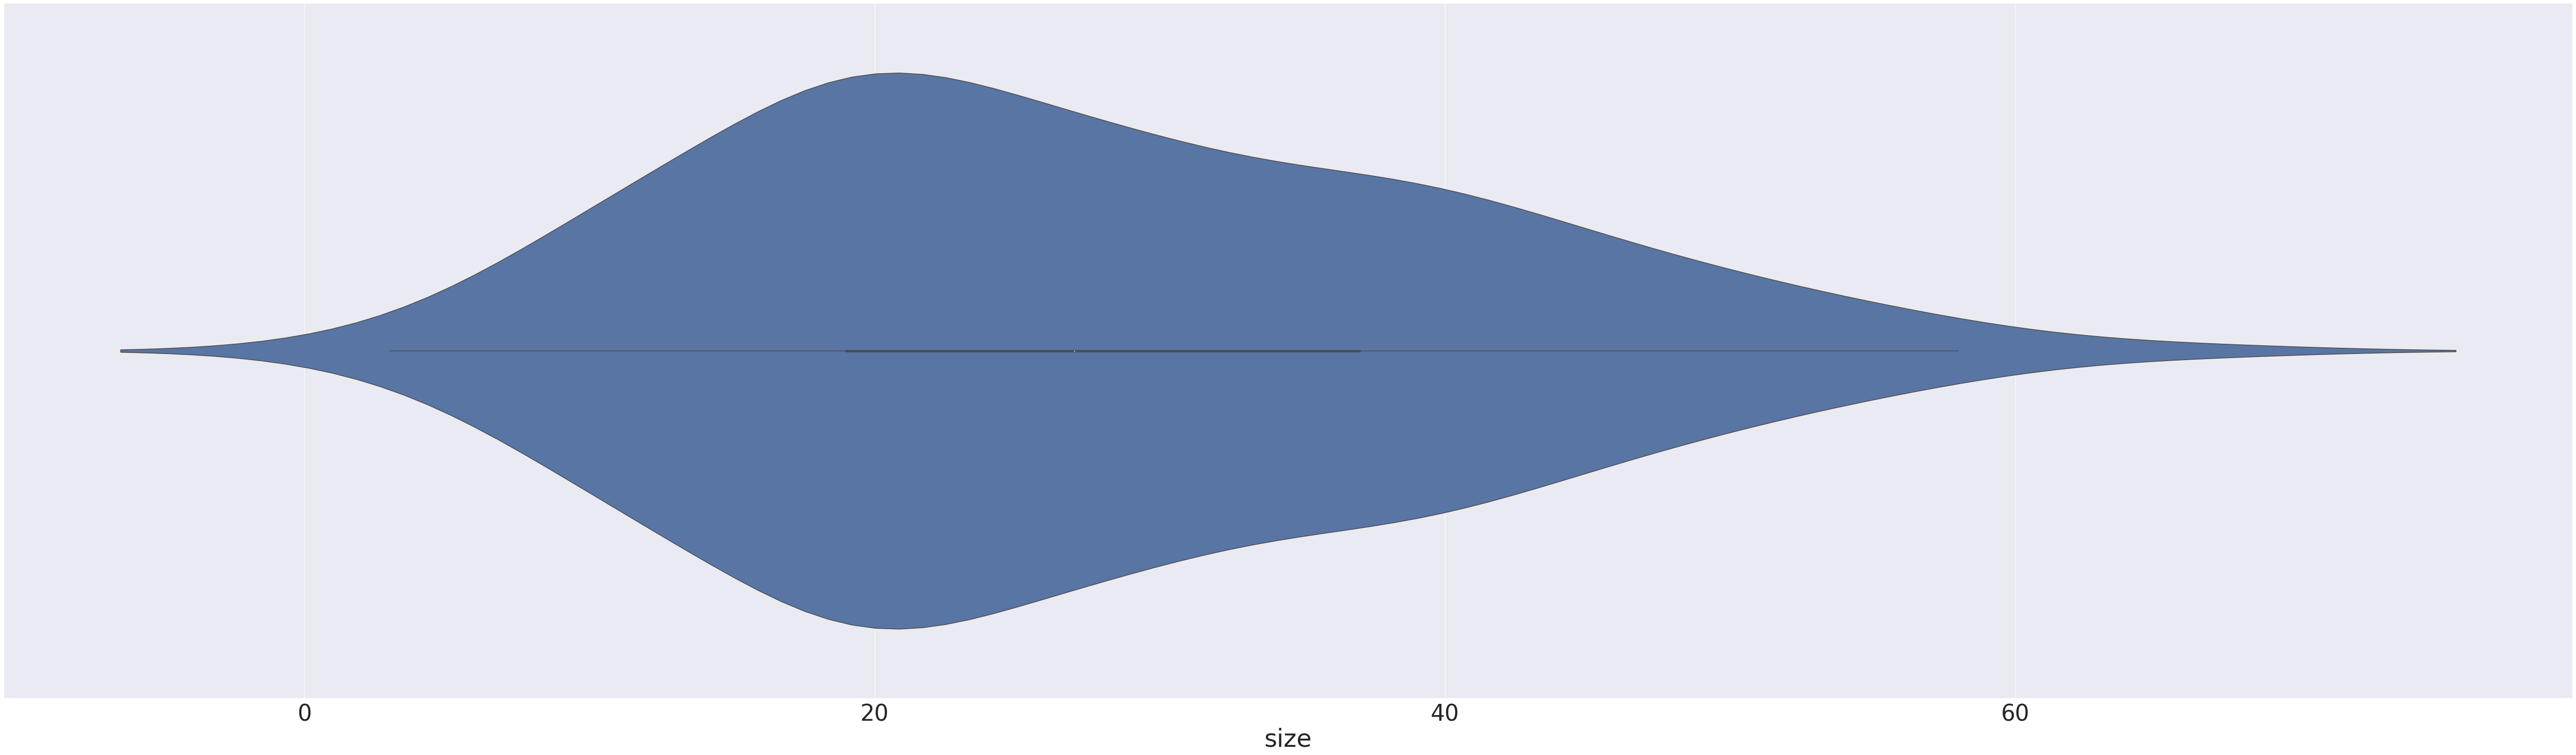

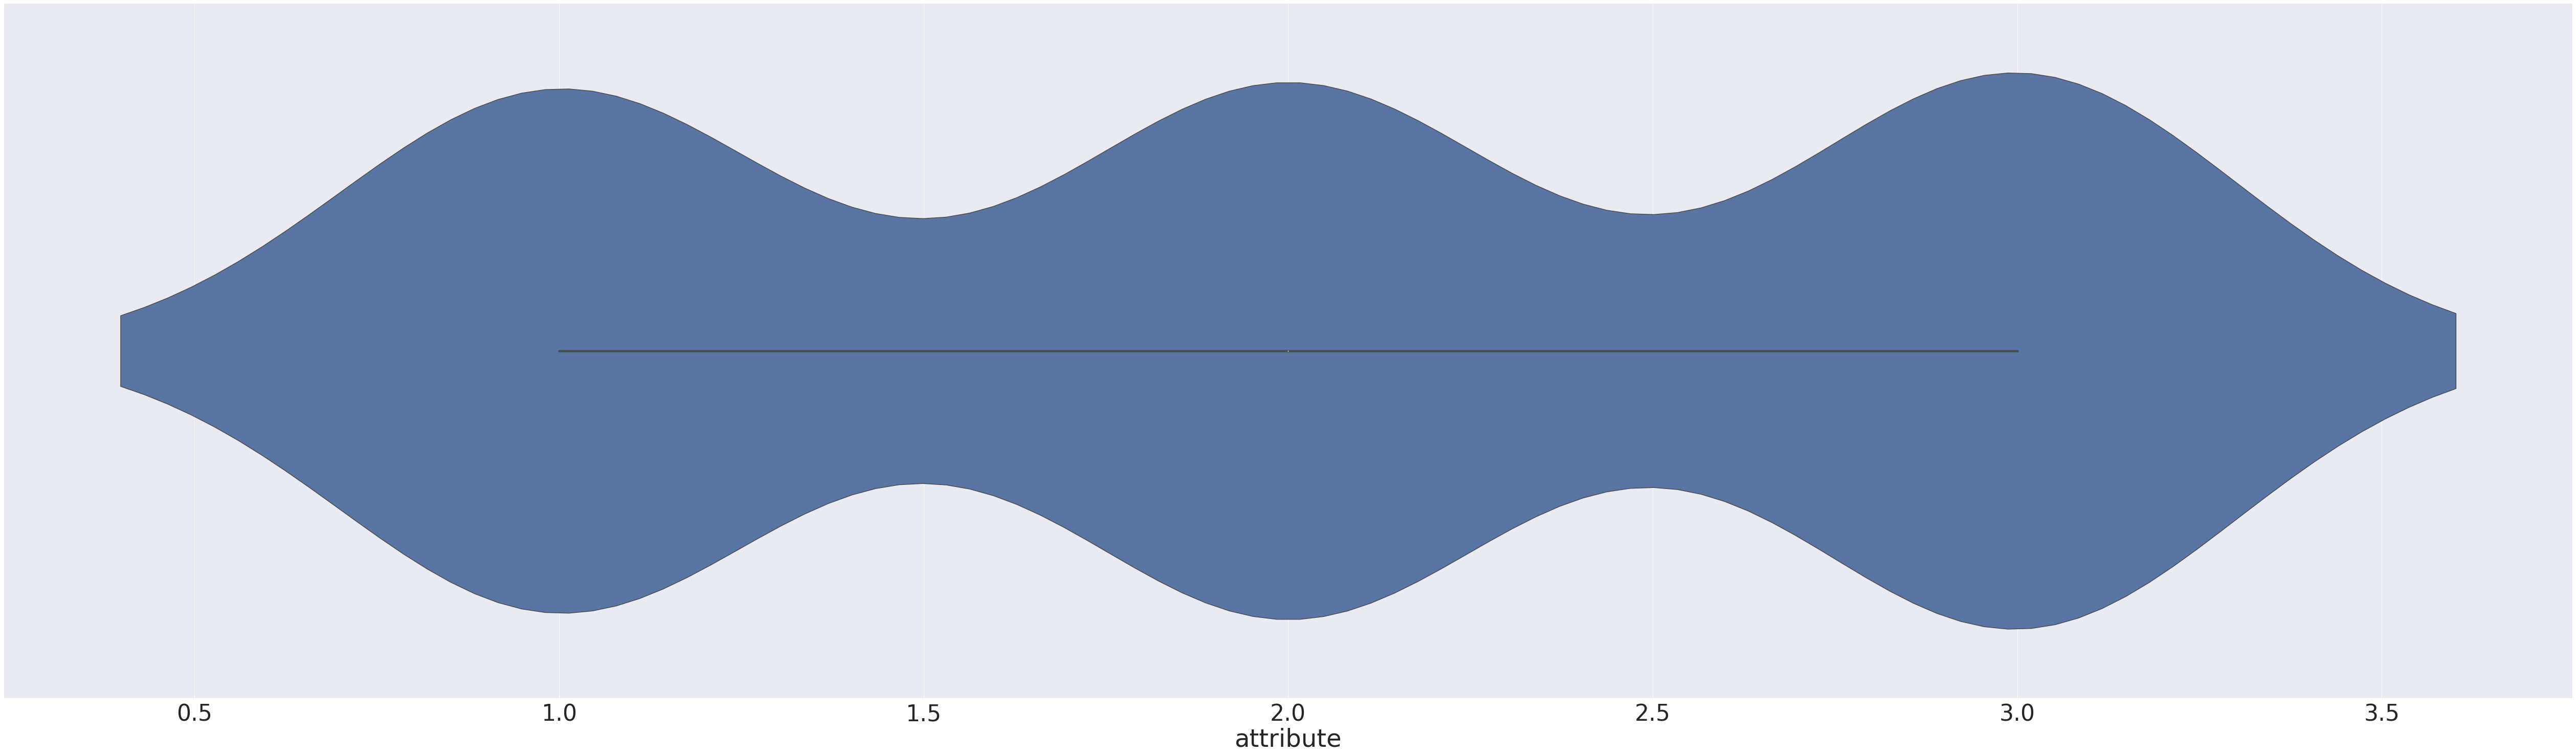

In [27]:
sns.set(rc = {'figure.figsize':(90,25)},font_scale = 4)
for cols in data.columns:
  sns.violinplot(data=data, x=cols, )
  plt.show()

* we can see the probablity occurence of count of diffrent values of the features in the above diagrams .

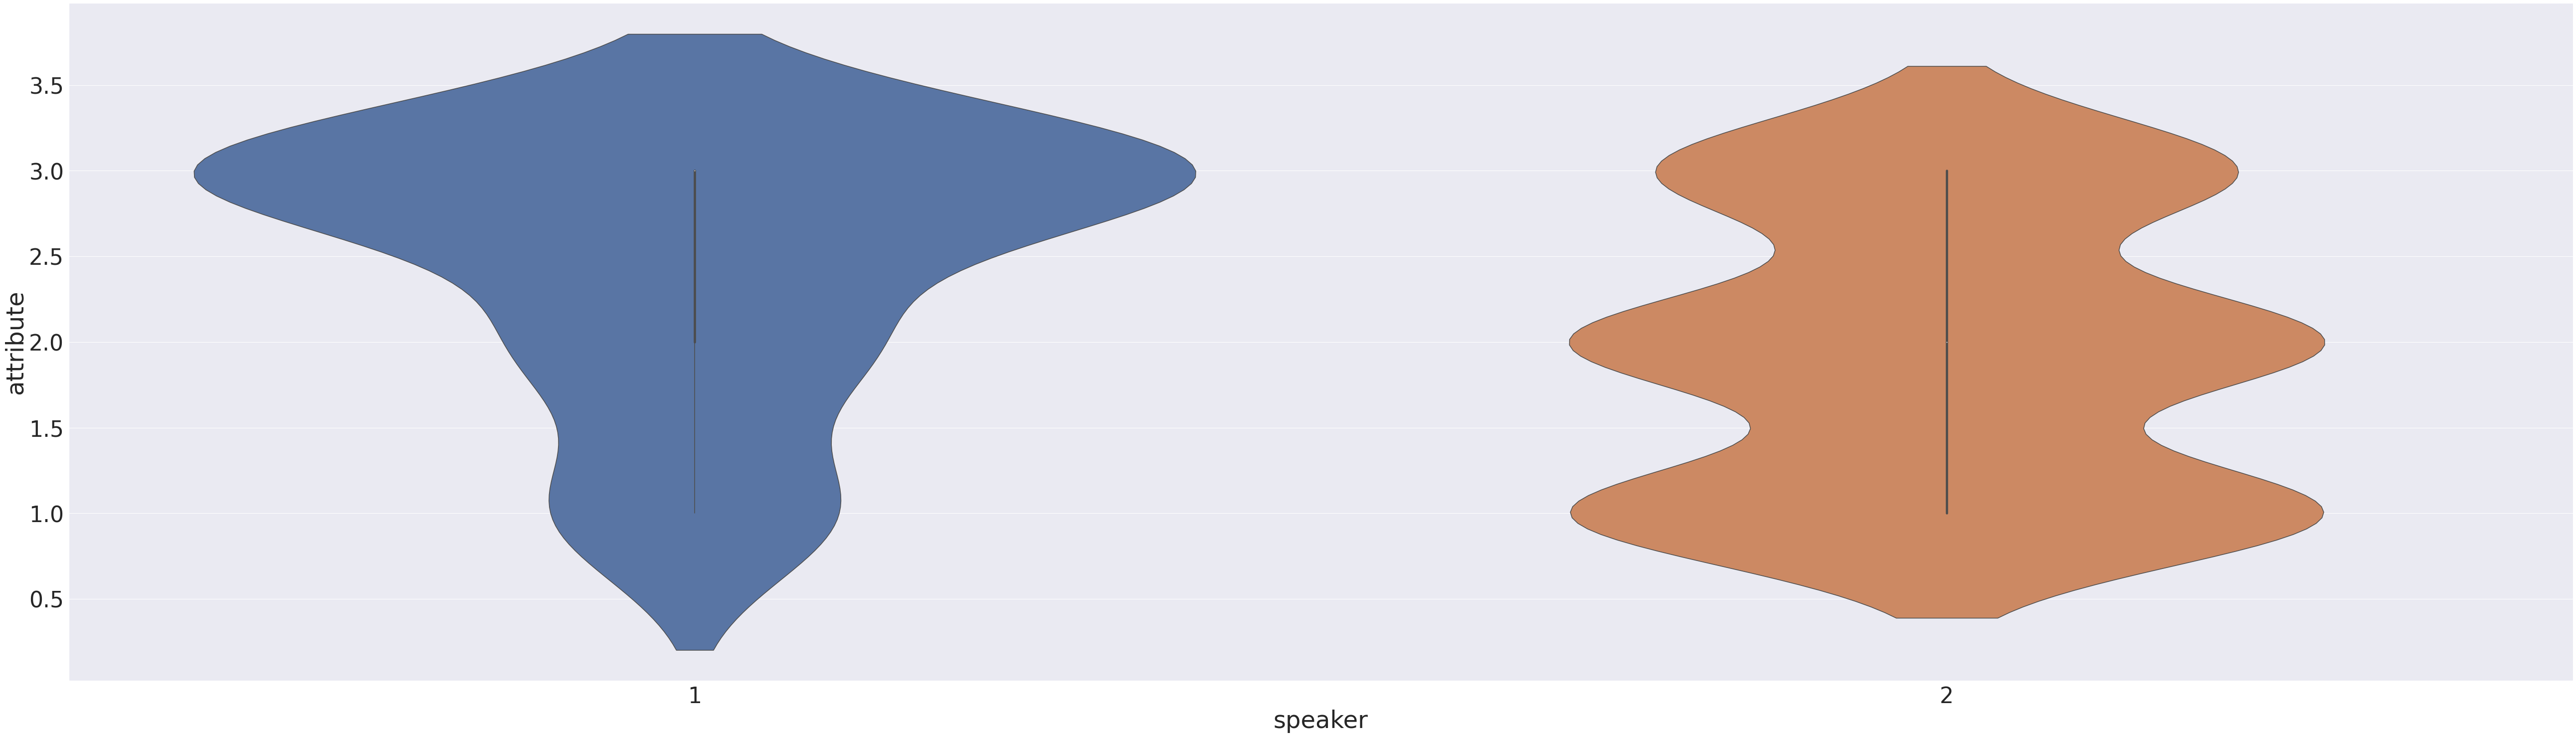

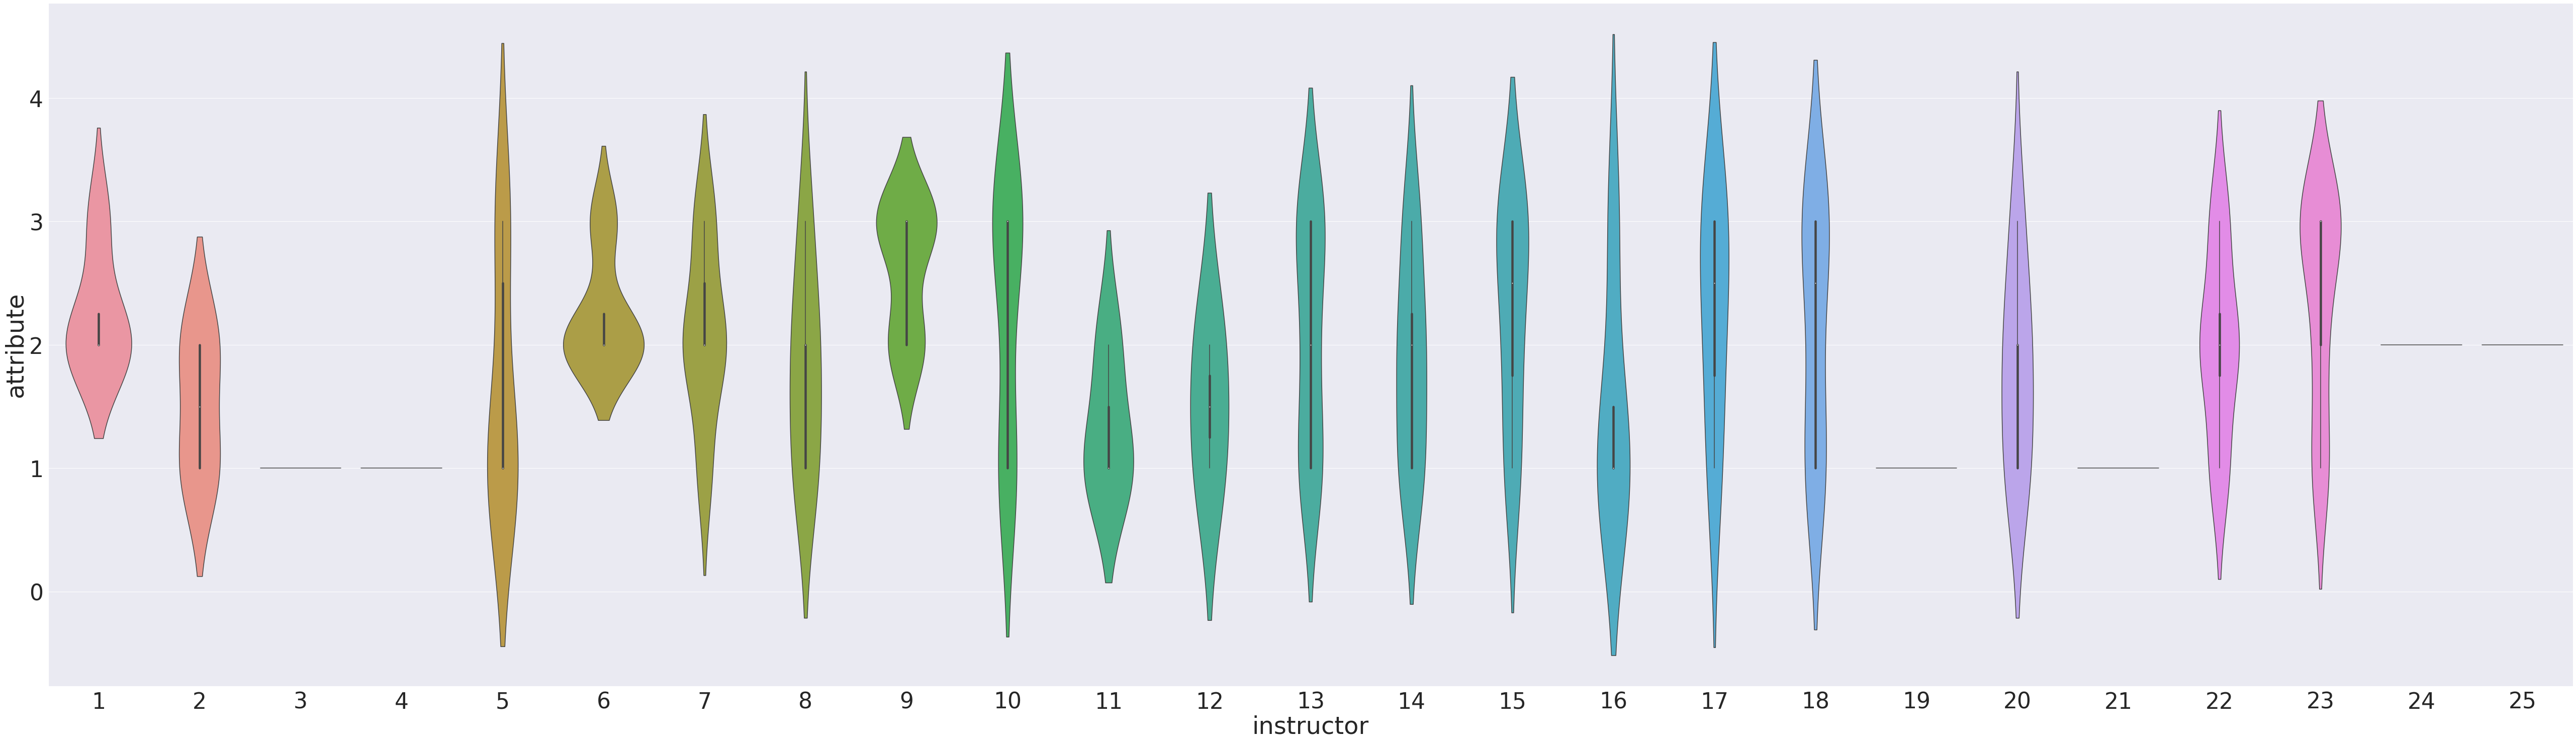

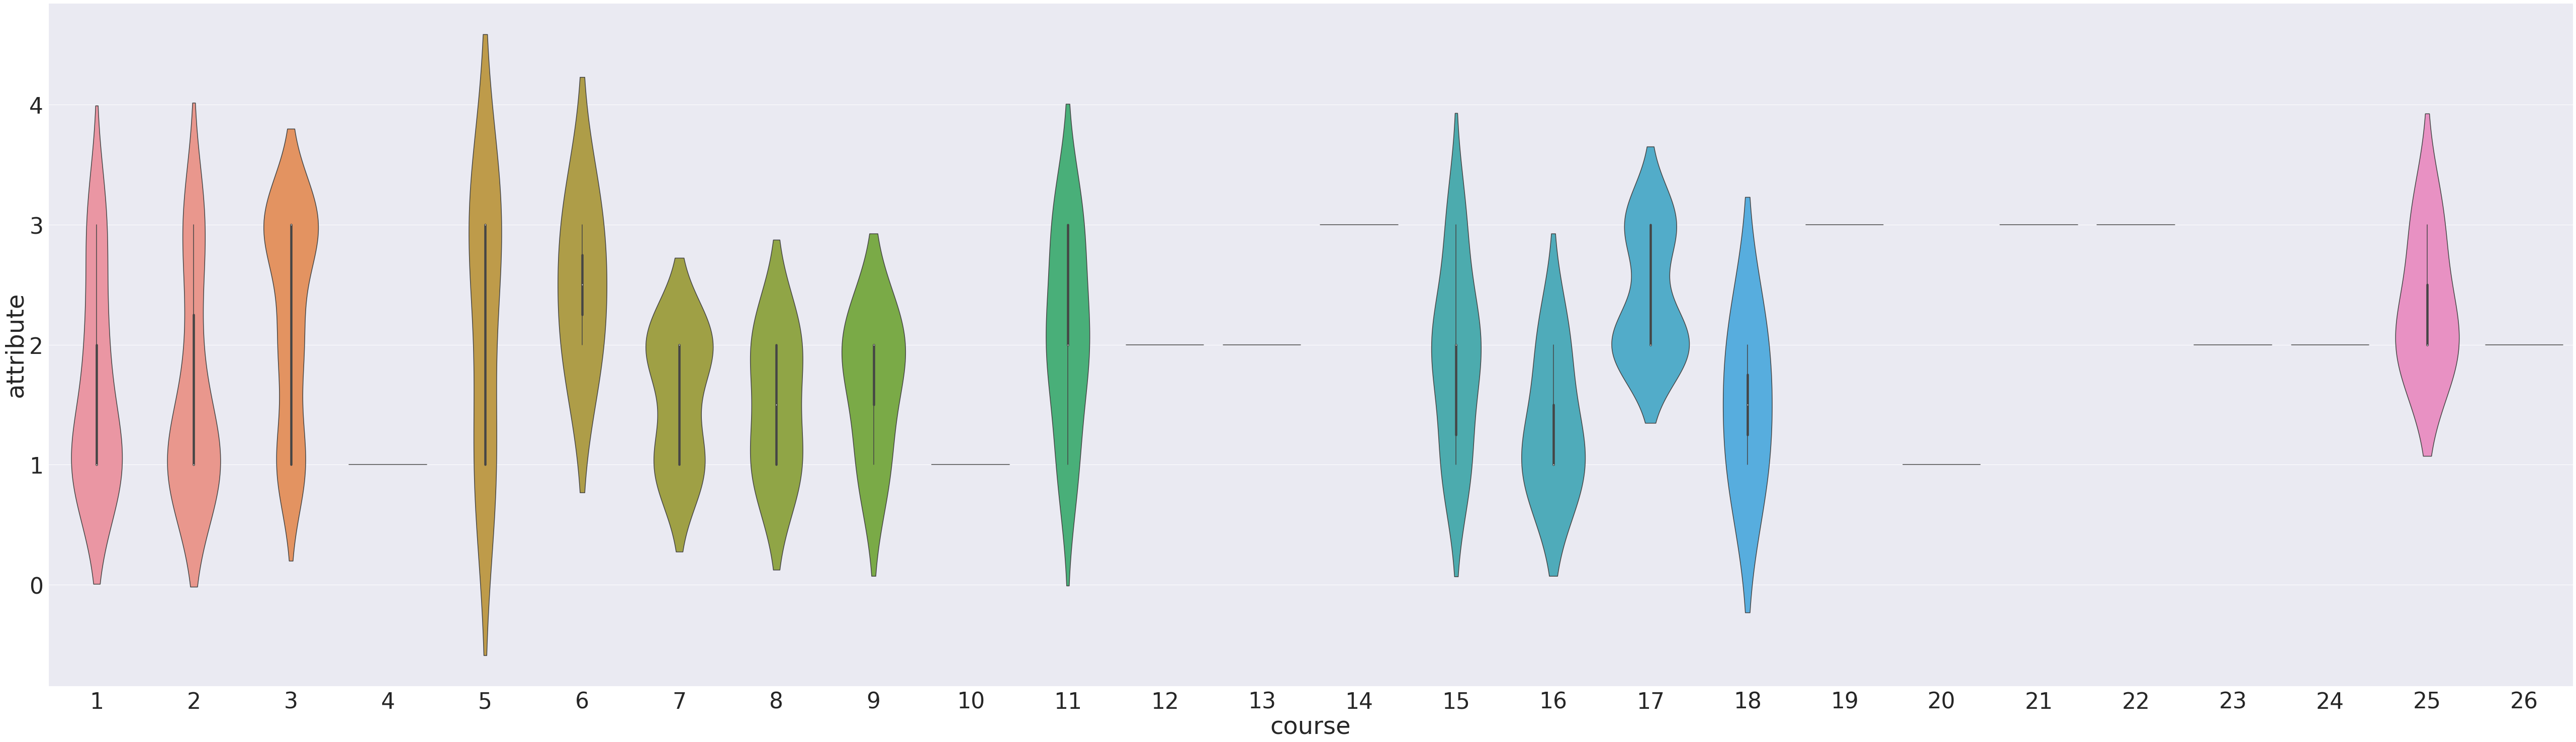

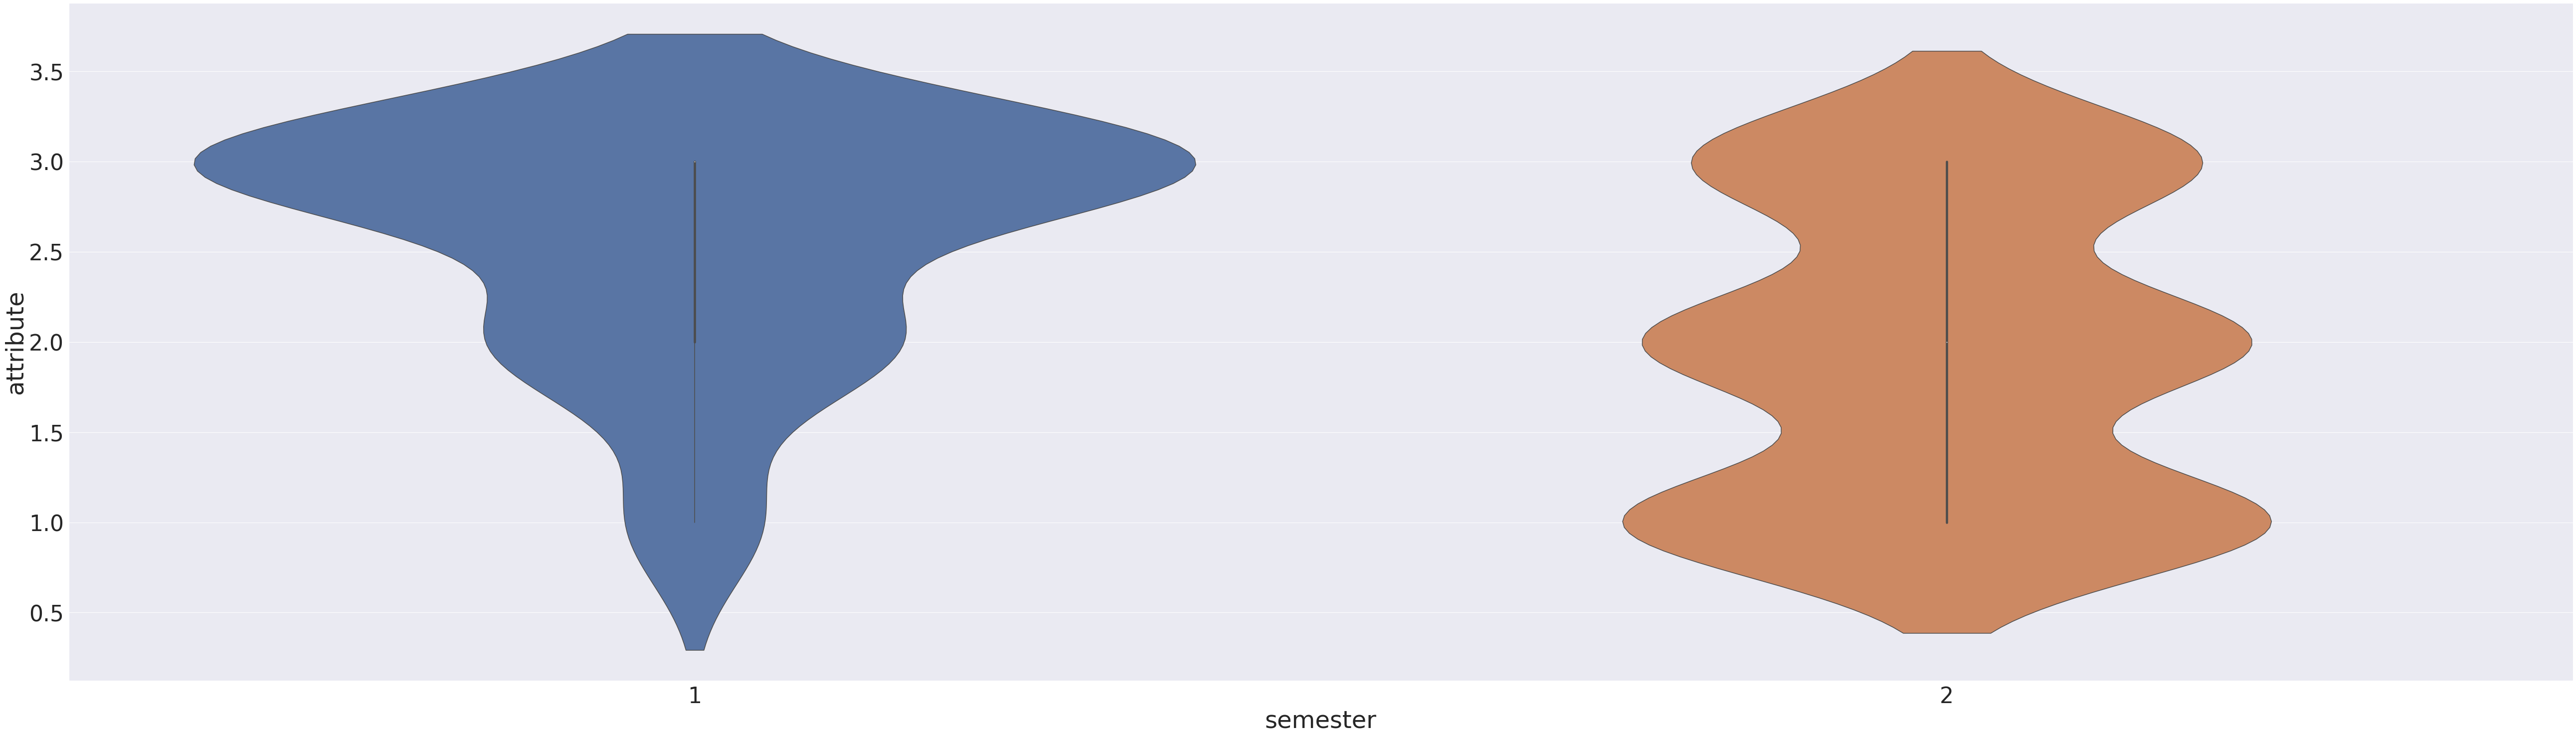

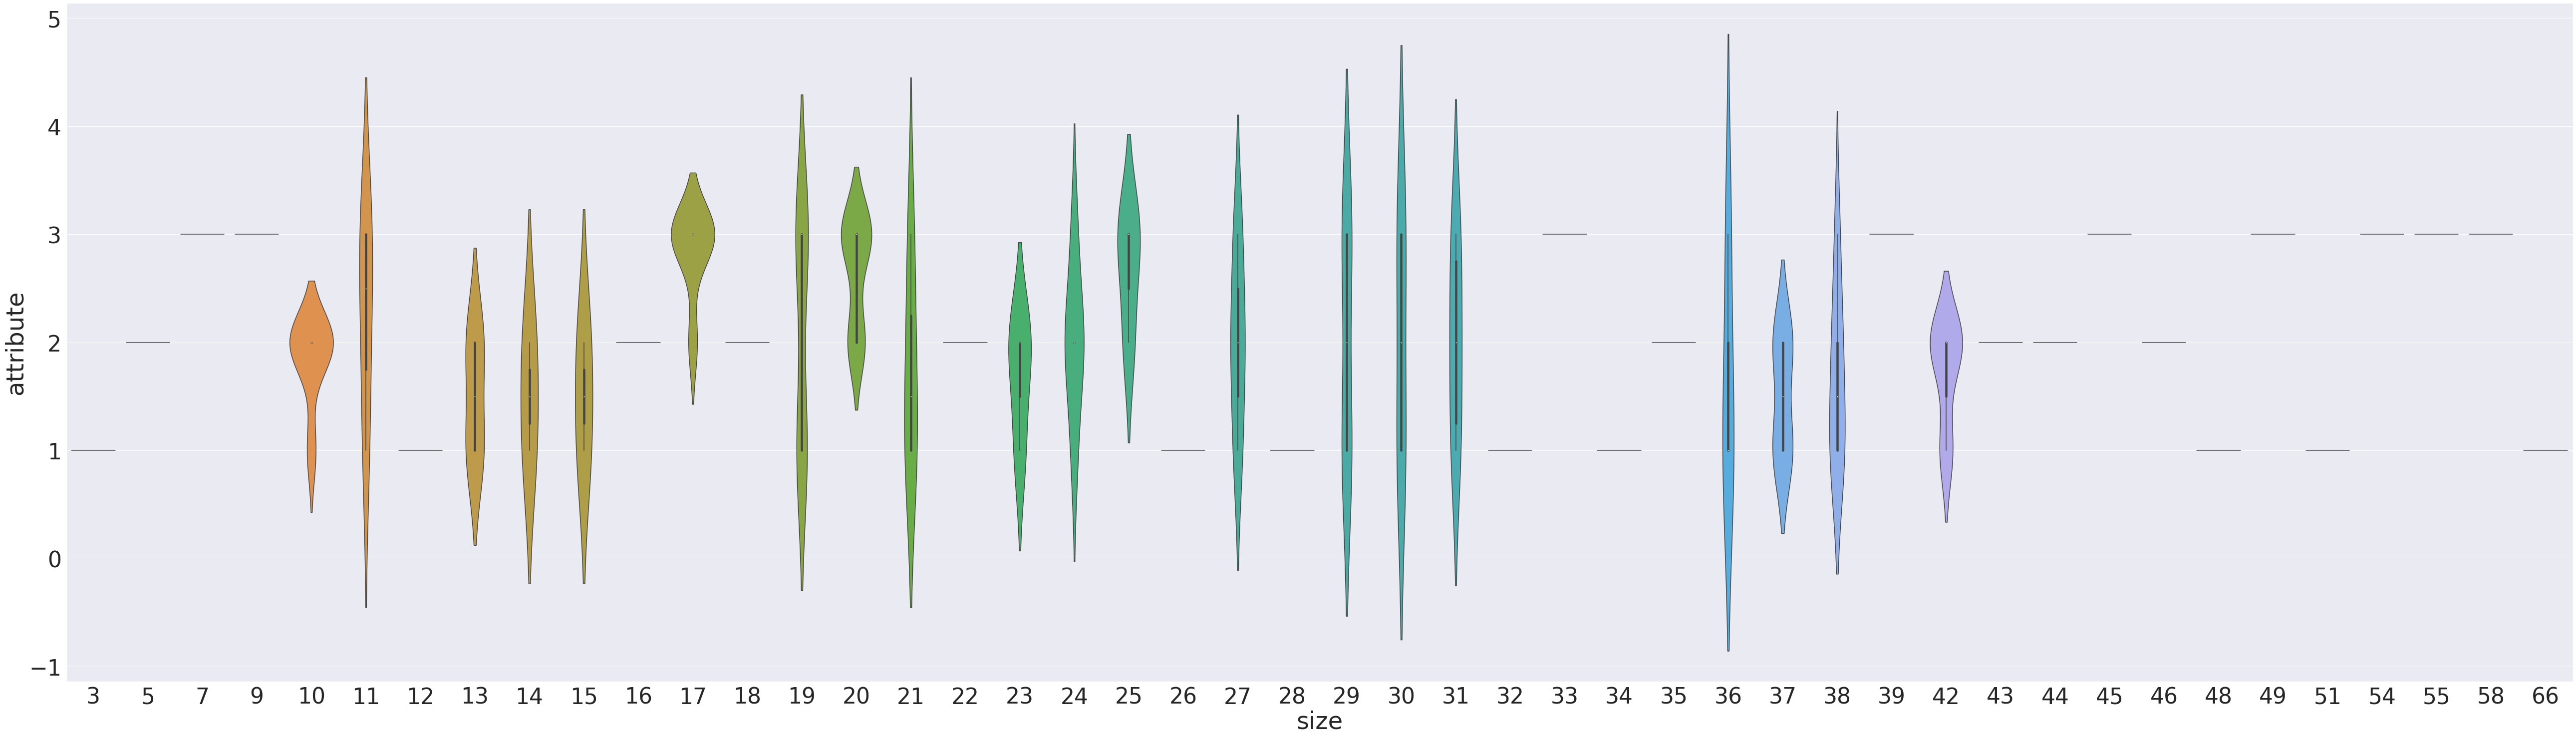

In [28]:
sns.set(rc = {'figure.figsize':(90,25)},font_scale = 4)
for cols in indep:
  sns.violinplot(data=data, x=cols, y="attribute")
  plt.show()

* The above graphs have been drawn wrt to attributes and gives the probablity of the class category occuring of that feature's value.

## e) Pie plot

Text(0, 0.5, 'Instructor')

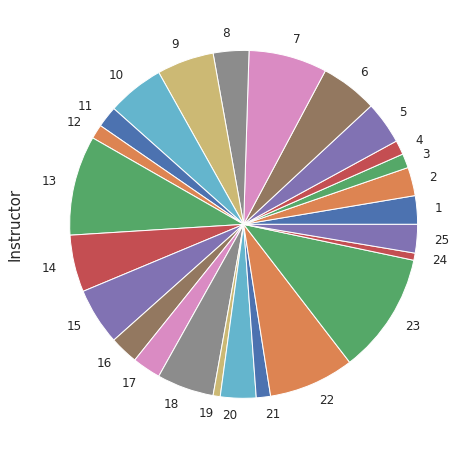

In [29]:
ax = data.groupby('instructor').size().plot.pie(y='Instructor',figsize=(8, 8),fontsize=12,pctdistance=0.5)
ax.set_ylabel('Instructor',fontsize=15)

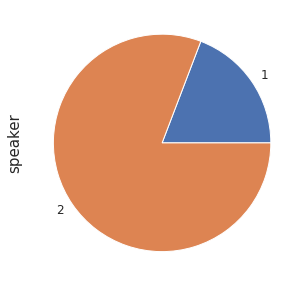

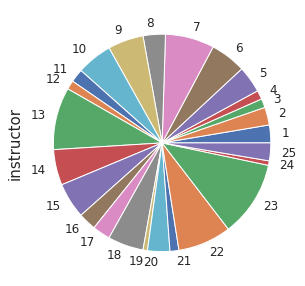

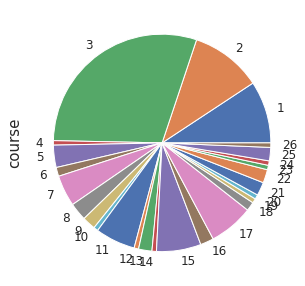

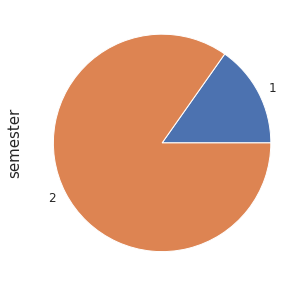

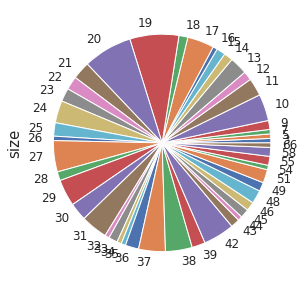

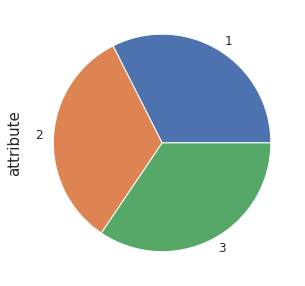

In [30]:
# plot 2
for cols in data.columns:
  ax = data.groupby(cols).size().plot.pie(y=cols,figsize=(5,5),fontsize=12,pctdistance=0.5)
  ax.set_ylabel(cols,fontsize=15)
  plt.show()



pie chart can be used to check the distribution of data and view the percentage of data present for the particular category of

## f) Scatter Plot

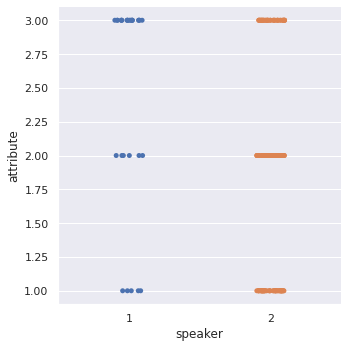

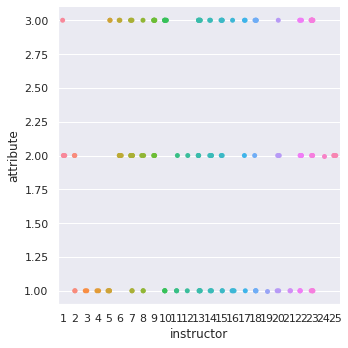

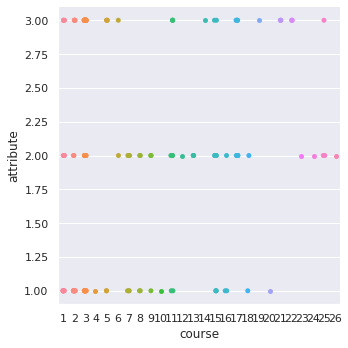

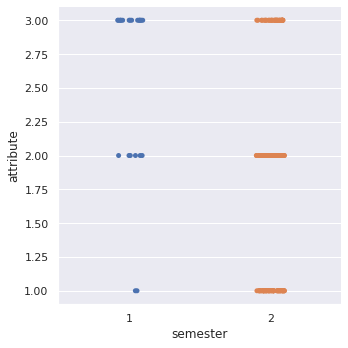

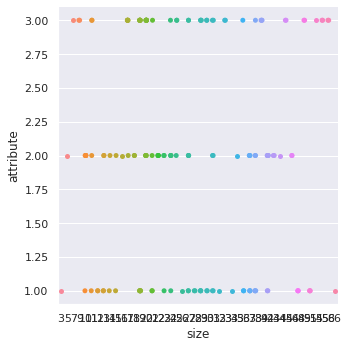

In [31]:
sns.set(rc = {'figure.figsize':(90,90)},font_scale = 1)
for cols in indep:
  sns.catplot(data=data,x=cols,y='attribute')
  plt.show()
  


Here we can see the relationship between the independent variables and the class attribute.
Since the data is categorical we can't gather much information about the trend.
we can see the individual plot values here.

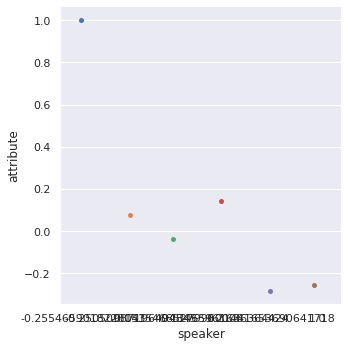

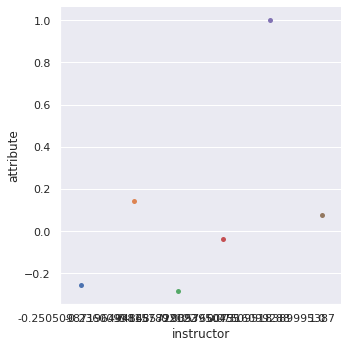

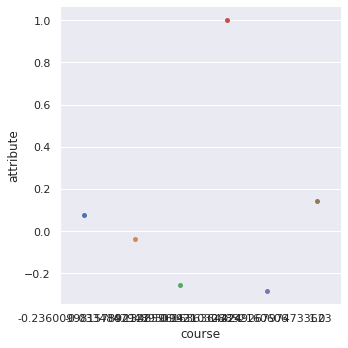

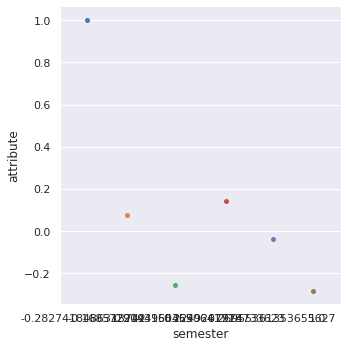

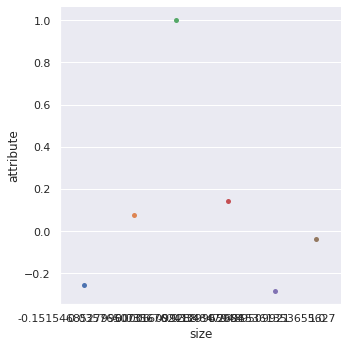

In [32]:
# correlation scatter plot
sns.set(rc = {'figure.figsize':(90,90)},font_scale = 1)
for cols in indep:
  sns.catplot(data=data.corr(),x=cols,y='attribute')
  plt.show()

we can see correlation points are very random and the data may not share a increasing or decreasing relationship with attributes

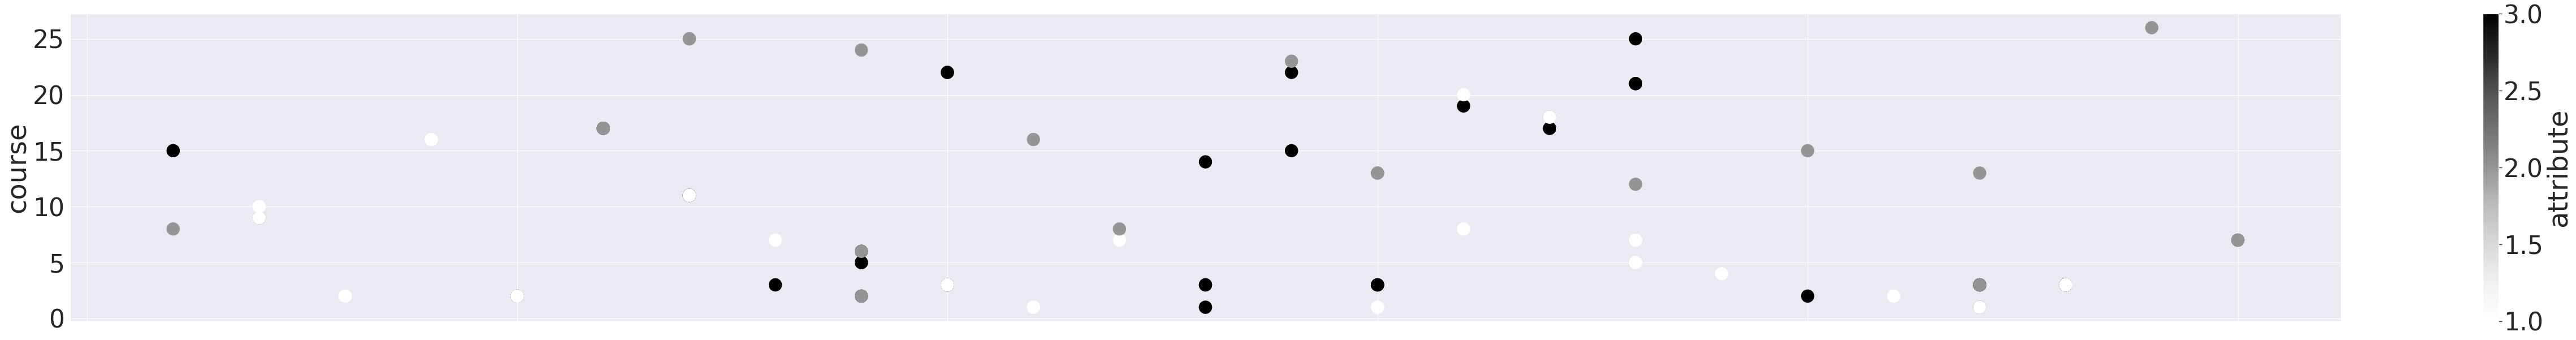

In [33]:
# matplotlib
sns.set(rc = {'figure.figsize':(90,10)},font_scale = 4)
data.plot.scatter(x="instructor",y="course",c="attribute",s=500)

## g)  Line plot

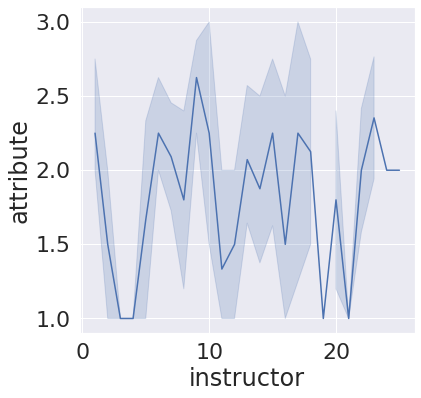

In [34]:
sns.set(rc = {'figure.figsize':(6,6)},font_scale = 2)
sns.lineplot(data=data,x='instructor',y='attribute')

from the figure we can see how values of class attribute is for diffterent categories of instructors.

## h) Joint Plots

A Jointplot comprises three plots. Out of the three, one plot displays a bivariate graph which shows how the dependent variable(Y) varies with the independent variable(X).


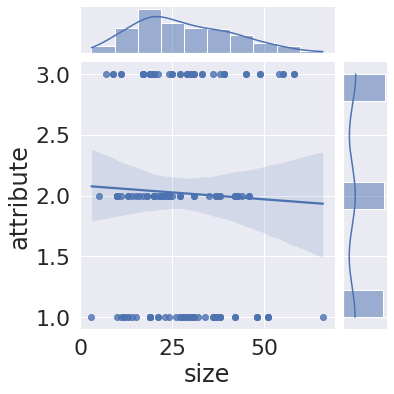

In [35]:
sns.jointplot(data=data, x="size", y="attribute", kind="reg")

The kind "reg" greph gives a regression line with minimized error, since the data is distributed on 3 values only we can see a regression line in the middle of two.

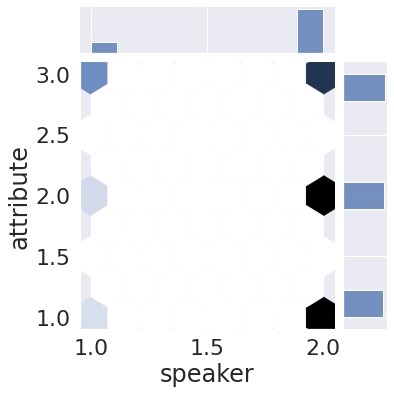

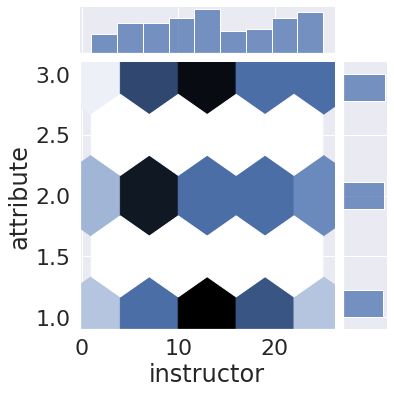

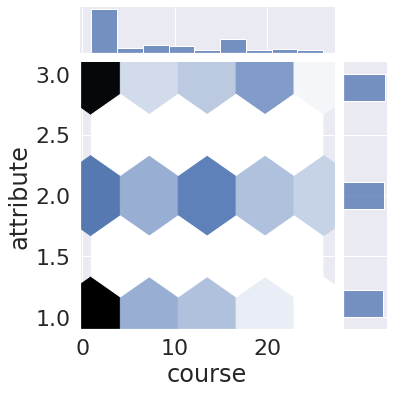

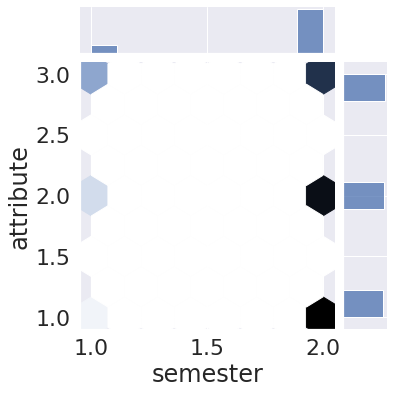

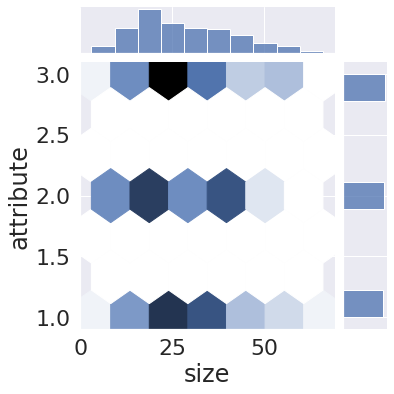

In [36]:
sns.set(rc = {'figure.figsize':(90,90)},font_scale = 2)
for cols in indep:
  sns.jointplot(data=data, x=cols, y="attribute",kind='hex')
  plt.show()




* darker bins more concentrated data
* light hex: no data 
The number of points falling into each bin are counted and the hexagons are colored based on a color gradient. Darker colors indicate that the data points are concentrated in that region, while white bins indicate that there is no data.

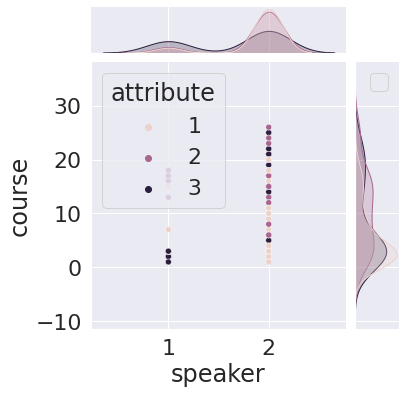

In [37]:
sns.jointplot(data=data, x="speaker", y="course", hue="attribute")
plt.legend(loc='best')

we can see the trends and how the diffrent values are affected by course and the speaker and are presented for different attribute values in diffrent colors also.

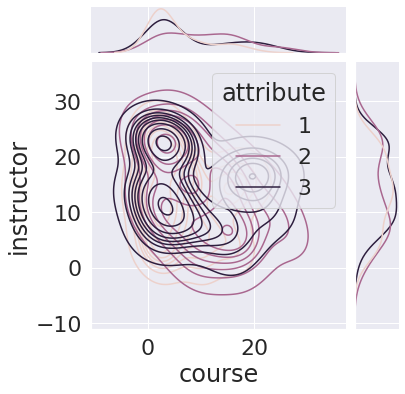

In [38]:
sns.jointplot(data=data, x="course", y="instructor", hue="attribute", kind="kde")


the jointplot displays a bivariate density curve on the main plot and univariate density curves on the margins. Also notice that the density curves for the two levels of the hue variable are plotted in different colors.

## i) Heat Map

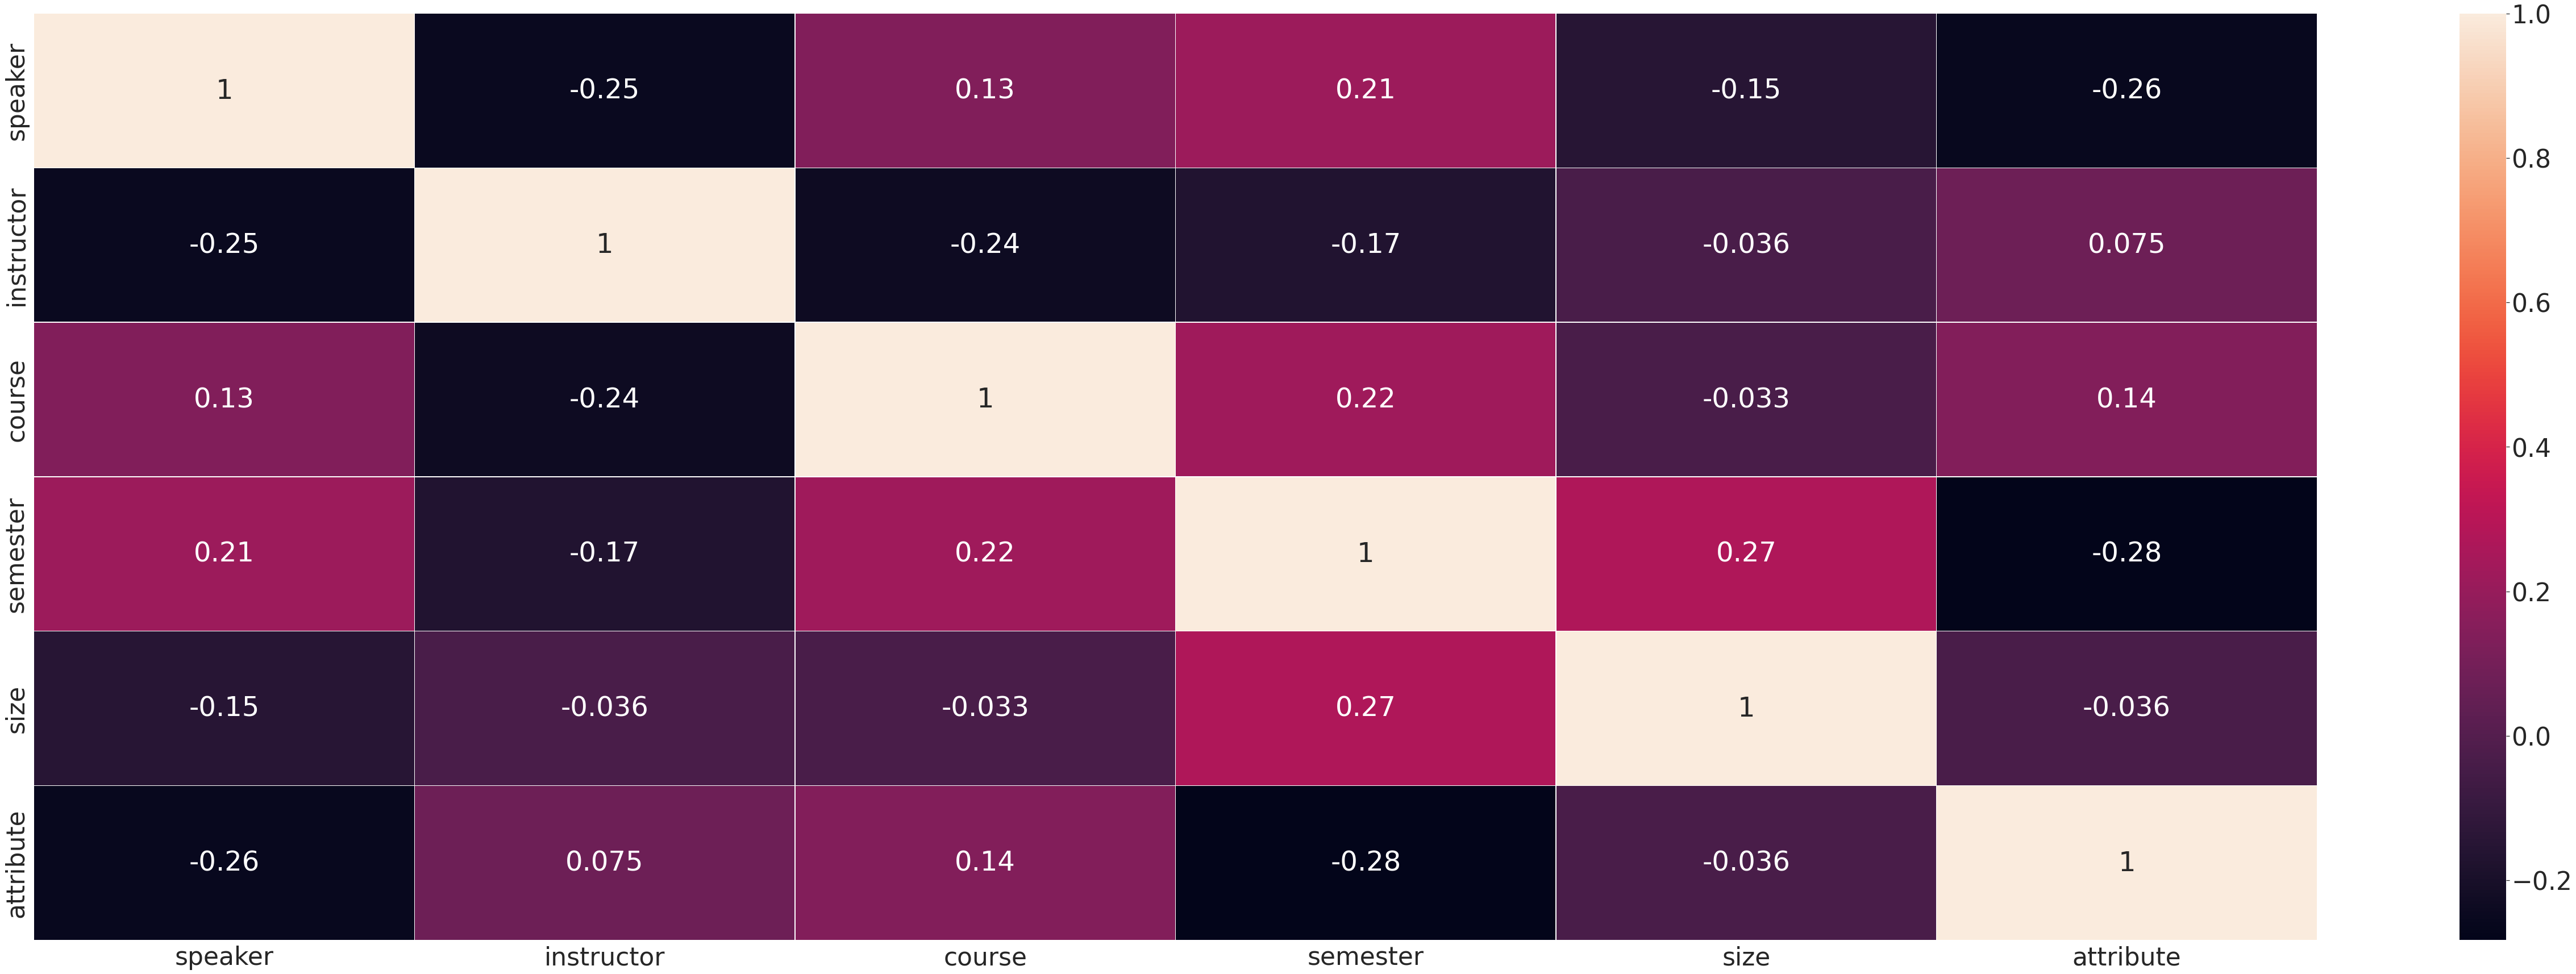

In [39]:
# heat map for correlation
sns.set(rc = {'figure.figsize':(90,30)},font_scale = 4)
ax = sns.heatmap(data.corr(),annot=True,linewidths=.5)


Two dimensional plot of the amount of correlation (measure of dependence) between variables represented by colors. The varying intensity of color represents the measure of correlation. 
* close to 1: linear relationship (we can see from lighter colors that we don't have much of linear relationship in the correlTION MATRIX.)
* close to 0 : no trend in between the values.
* close to -1 : inverse relationship between the values (darker values)


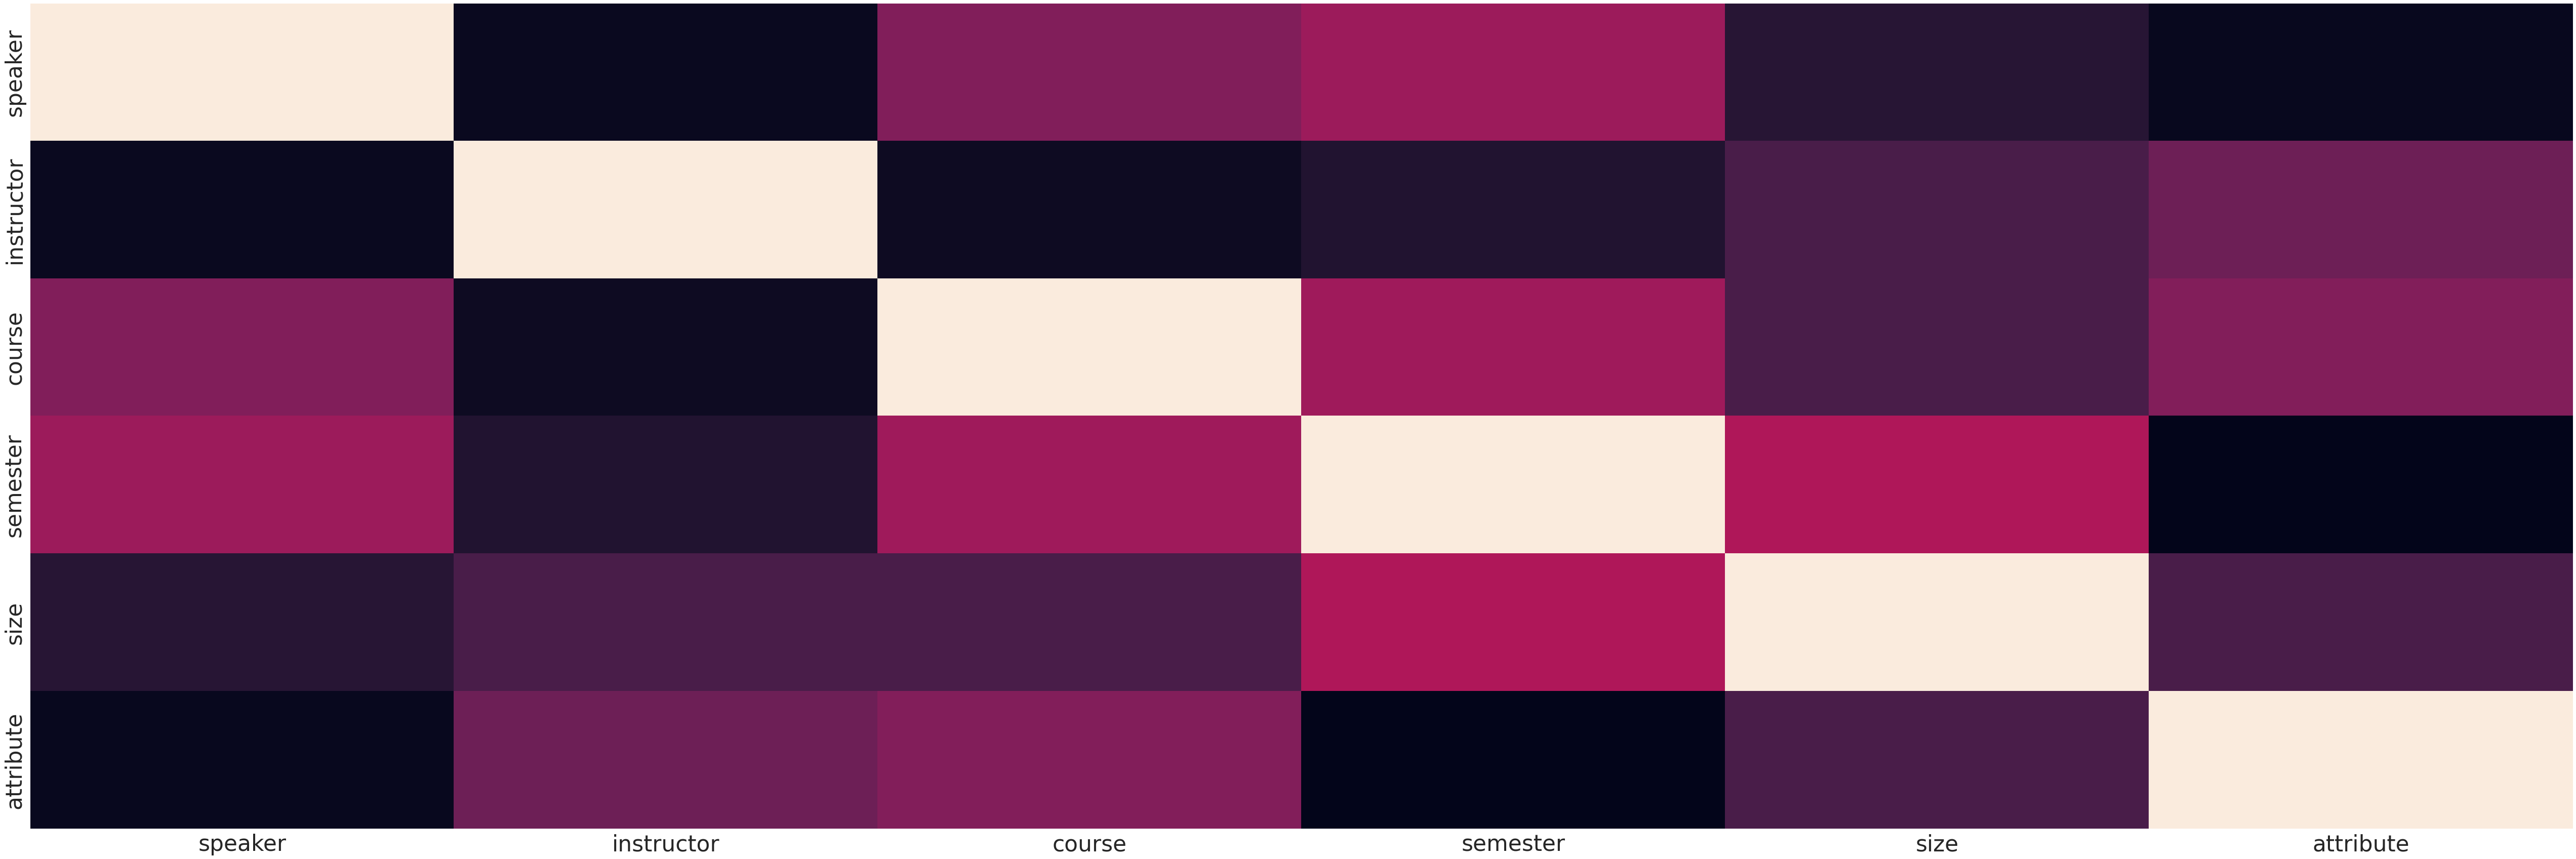

In [40]:
ax2 = sns.heatmap(data.corr(), cbar=False)

## j) Filled plot

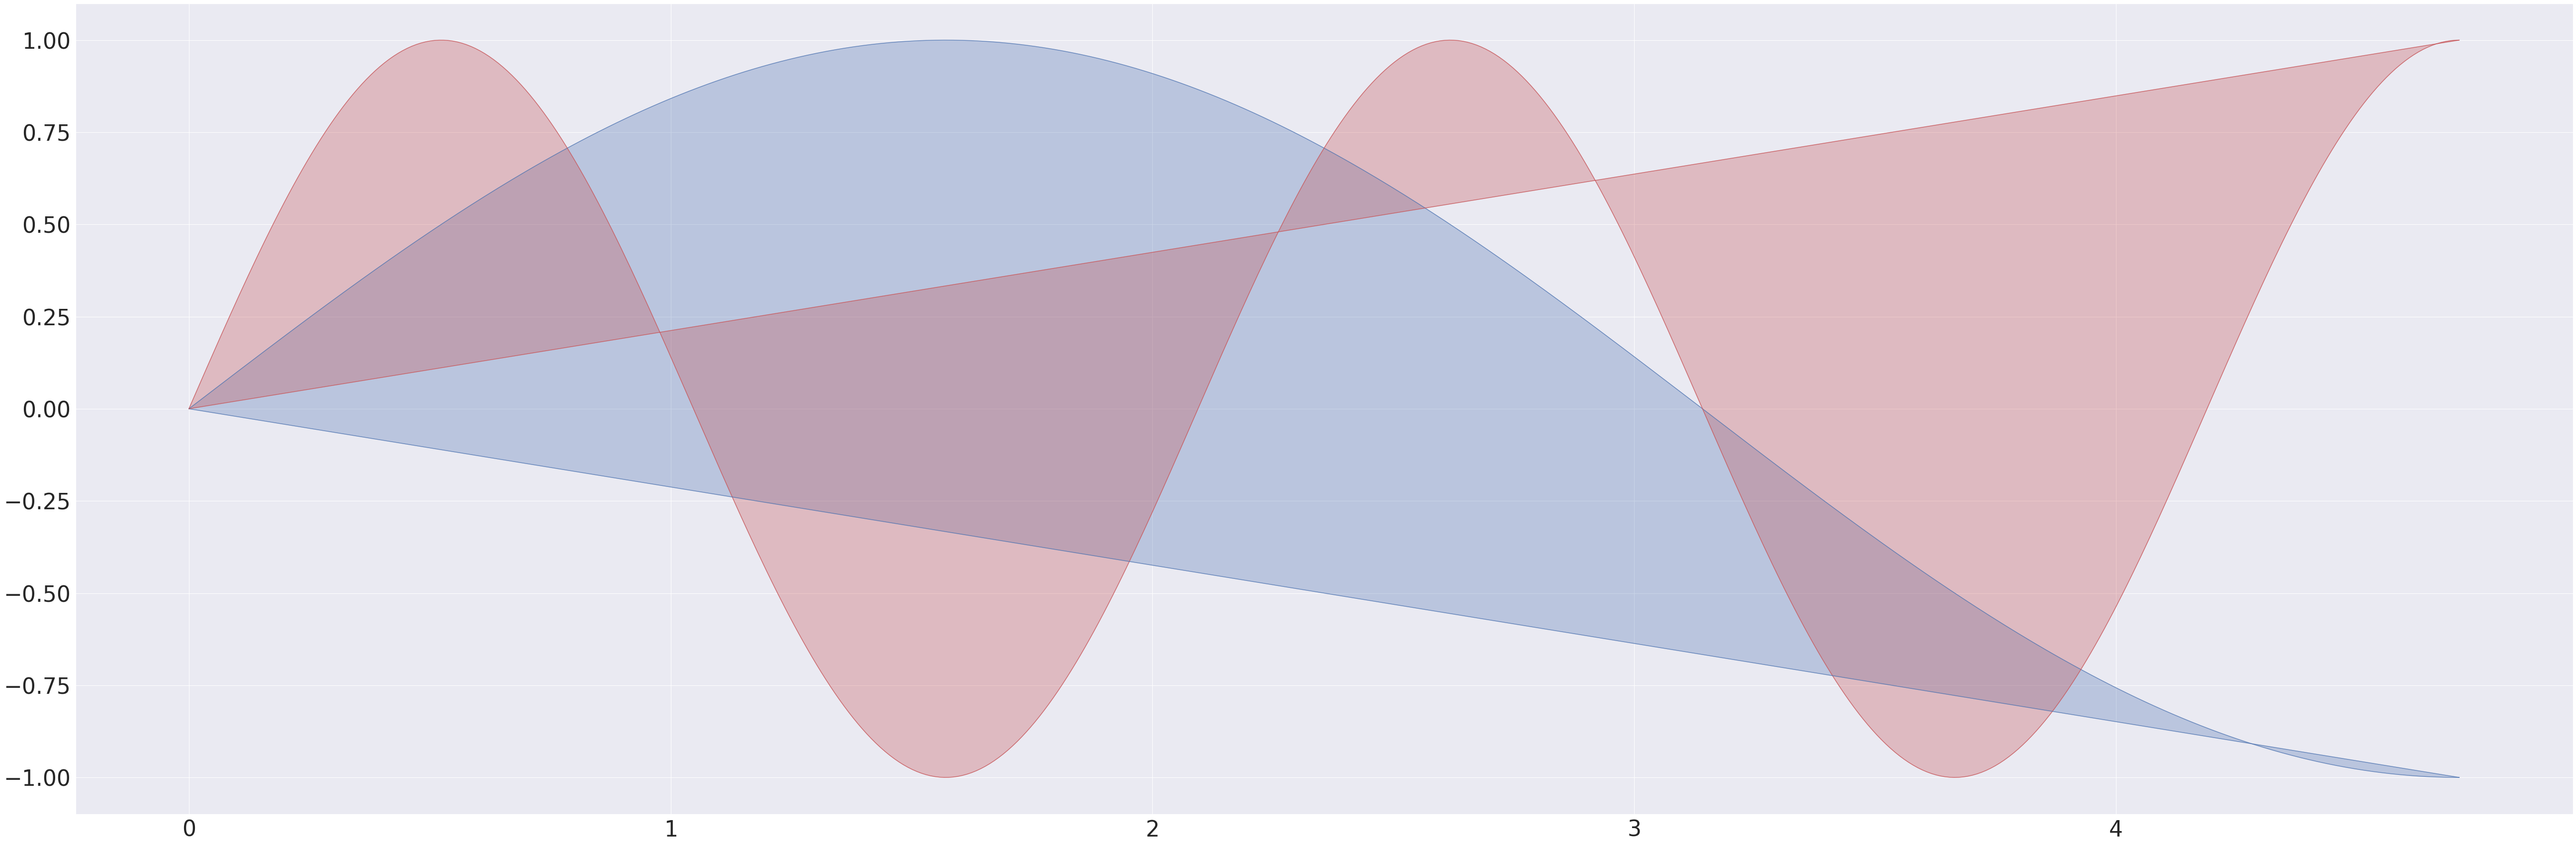

In [41]:
x = np.linspace(0, 1.5 * np.pi, 500)
y1 = np.sin(x)
y2 = np.sin(3 * x)

fig, ax = plt.subplots()

ax.fill(x, y1, 'b', x, y2, 'r', alpha=0.3)

# Outline of the region we've filled in
ax.plot(x, y1, c='b', alpha=0.8)
ax.plot(x, y2, c='r', alpha=0.8)
ax.plot([x[0], x[-1]], [y1[0], y1[-1]], c='b', alpha=0.8)
ax.plot([x[0], x[-1]], [y2[0], y2[-1]], c='r', alpha=0.8)

plt.show()


filled plot with different opacities and seprate graphs represented in different colors.

## k) Error Bar

<ErrorbarContainer object of 3 artists>

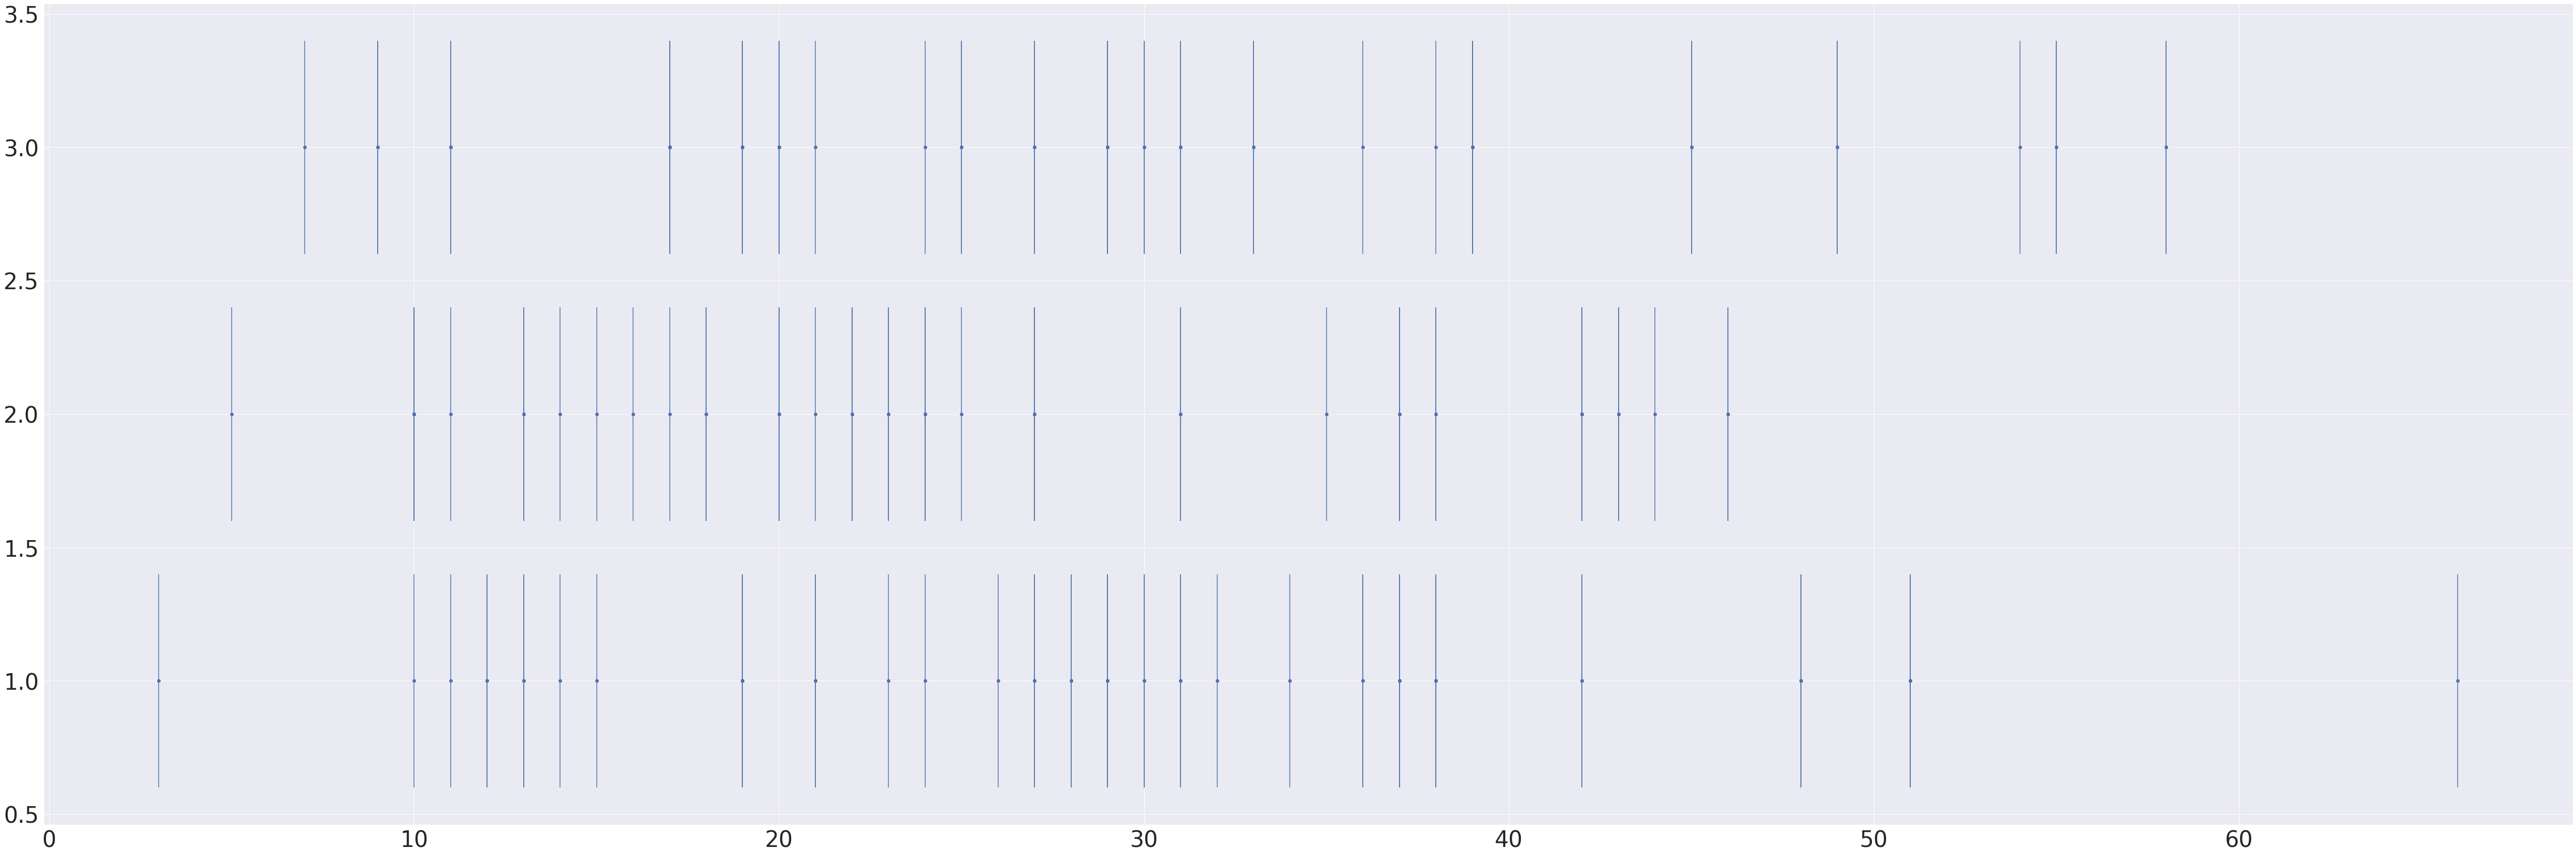

In [42]:
dy = 0.4
sns.set(rc = {'figure.figsize':(90,30)},font_scale = 4)
plt.errorbar(data['size'],data['attribute'],yerr=dy,fmt='o')

this represents the variablity of data and the range it can take a range of values to it. 
It can be represented by error bar that generates from the data points.
It allows to give the precision in the values of the graphs.

# 5) D3 js

## step 1 : import HTML in Python

In [1]:
from IPython.core.display import HTML
from string import Template

In [44]:
# render sample html code
HTML('''
    <h1>Hello HTML!</h1>
    <p style="color:blue">This is a test <b>data</b></p>
''')

## step 2 : Introduce D3js script to HTML block

In [3]:
HTML('''
  <h3 style="color:pink">Adding script for D3js</h3>
  <script src="https://d3js.org/d3.v7.min.js"></script>
  
  ''')